# Library import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
sns.set_style("whitegrid")   # Seaborn 스타일 설정
sns.set(font_scale = 1.0)   # seaborn 라이브러리 세팅 (plot의 모든 폰트 사이즈를 2.0로 지정)

import warnings 
warnings.filterwarnings('ignore')   # ignore warning

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

C:\Users\pc\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Data load

In [2]:
# 데이터의 정보가 생략되는 부분 없이 보이도록 설정
pd.set_option('display.max_colwidth', None)

## train
|컬럼명|내용|
|:-|:-|
|제품|제품 코드|
|대분류|제품의 대분류 코드|
|중분류|제품의 중분류 코드|
|소분류|제품의 소분류 코드|
|브랜드|제품의 브랜드 코드|
|2022-01-01 ~ 2023-04-04|실제 일별 판매량|

In [3]:
train = pd.read_csv('train.csv')
train

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,1,3,2,0,0,2,0
2,2,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,B002-00002-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,B002-00003-00001,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,15885,B002-03799-00002,B002-C001-0003,B002-C002-0008,B002-C003-0042,B002-03799,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15886,15886,B002-03799-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,0,3,0,2,4,1,1,3
15887,15887,B002-03799-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15888,15888,B002-03799-00005,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


## sales
|컬럼명|내용|
|:-|:-|
|ID |실제 판매되고 있는 고유 ID|
|제품|제품 코드|
|대분류 |제품의 대분류 코드|
|중분류 |제품의 중분류 코드|
|소분류 |제품의 소분류 코드|
|브랜드 |제품의 브랜드 코드|
|2022-01-01 ~ 2023-04-04 |실제 총 판매금액|

In [4]:
sales = pd.read_csv('sales.csv')
sales

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,22400,67200,44800,0,0,44800,0
2,2,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,B002-00002-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,B002-00003-00001,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,15885,B002-03799-00002,B002-C001-0003,B002-C002-0008,B002-C003-0042,B002-03799,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15886,15886,B002-03799-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,0,60690,0,40460,80920,20230,20230,60690
15887,15887,B002-03799-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15888,15888,B002-03799-00005,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,0,0,0,0,0,0,0,27300


## brand_keyword_cnt
|컬럼명|내용|
|:-|:-|
|브랜드 |브랜드 코드|
|2022-01-01 ~ 2023-04-04 |브랜드의 연관키워드 언급량을 정규화한 일별 데이터|

In [5]:
brand = pd.read_csv('brand_keyword_cnt.csv')
brand

,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,B002-00001,0.84131,0.91383,1.450530,2.422390,1.871190,1.581080,1.232950,1.174930,1.145920,...,0.319110,0.391640,0.377130,0.49318,0.072520,0.29010,0.31911,0.232080,0.333620,0.44966
1,B002-00002,12.64868,20.27850,15.332170,12.750210,13.562510,13.707570,11.937910,15.564250,14.084710,...,10.269790,11.966920,10.646930,10.41485,10.487380,9.48651,9.28343,10.429350,11.154620,11.38671
2,B002-00003,0.33362,0.43516,0.362630,0.174060,0.217580,0.464170,0.420650,0.290100,0.377130,...,0.536690,0.696250,0.449660,0.39164,1.029880,0.49318,0.91383,0.797790,1.015370,0.88482
3,B002-00005,1.07339,1.71163,2.016240,1.914700,1.987230,2.146790,1.682620,1.378000,1.421520,...,2.219320,2.509420,2.872060,2.37888,2.030750,1.53756,1.34899,1.261960,2.320850,2.30635
4,B002-00006,0.00000,0.00000,0.188558,0.246574,0.246574,0.246574,0.377139,0.087012,0.261084,...,0.072526,0.290103,0.087012,0.00000,0.130542,0.00000,0.00000,0.072526,0.217577,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,B002-03794,2.32085,2.98810,3.611830,4.061500,3.669850,3.771390,3.031620,2.988100,3.133150,...,2.422390,2.422390,2.756010,2.32085,2.088770,1.98723,1.07339,1.929210,2.509420,1.78416
3166,B002-03795,0.14505,0.00000,0.087030,0.072520,0.087030,0.101530,0.072520,0.130540,0.116040,...,0.000000,0.072520,0.000000,0.10153,0.101530,0.00000,0.00000,0.000000,0.000000,0.00000
3167,B002-03796,0.00000,0.00000,0.000000,0.000000,0.000000,0.101530,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.072520,0.07252
3168,B002-03798,0.14505,0.00000,0.116040,0.072520,0.116040,0.275600,0.217580,0.116040,0.101530,...,0.101530,0.087030,0.145050,0.17406,0.188560,0.11604,0.11604,0.087030,0.174060,0.10153


## product_info
|컬럼명|내용|
|:-|:-|
|제품|제품 코드|
|제품특성|제품 특성 데이터(Text)|

In [6]:
product_info = pd.read_csv('product_info.csv')
product_info

,제품,제품특성
0,B002-03509-00001,제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상:성인남녀 제품타입:분말 제품용량:3개월분 섭취횟수:하루 한 번 1일 총 섭취량:1포 섭취방법:바로 음용 :1개 2g x 30포
1,B002-02376-00001,700mg x 28정
2,B002-03735-00001,"제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭취량:4정 제품용량:14일분 주요 기능성(식약처인증):체지방 감소 영양소 원료명(식약처고시):비타민A 영양소 원료명(식약처고시):비타민D 영양소 원료명(식약처고시):비타민E 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):비타민B2 영양소 원료명(식약처고시):비타민B6 영양소 원료명(식약처고시):비타민B12 영양소 원료명(식약처고시):비타민C 영양소 원료명(식약처고시):나이아신 영양소 원료명(식약처고시):판토텐산 영양소 원료명(식약처고시):아연 영양소 원료명(식약처고시):셀레늄(셀렌) 카테킨:400mg :1개, 제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 주요 기능성(식약처인증):체지방 감소 :1개, 제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭취량:1포 제품용량:14일분 주요 기능성(식약처인증):체지방 감소 영양소 원료명(식약처고시):셀레늄(셀렌) 카테킨:300mg :1개, 제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 제품유형_A:건강기능식품 14in1 700mg x 56정"
3,B002-03735-00003,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:1정 제품용량:2개월분 :1개 510mg x 60정
4,B002-02769-00001,HCA:900mg 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):비타민B6 영양소 원료명(식약처고시):판토텐산 1일 총 섭취량:4정 제품용량:28일분 제품타입:정 섭취횟수:하루 두 번 섭취방법:물과 함께 섭취대상:성인남녀 주요 기능성(식약처인증):체지방 감소 :1개 700mg x 112정
...,...,...
12773,B002-01994-00001,형태:액상형 구성:리필 등급:1종 용도:식기 용도:과일 용도:야채 용도:조리기구 용량:300ml :3개 500ml
12774,B002-02600-00002,헤어타입:모든 모발용 주요제품특징:머릿결개선 세부제품특징:촉촉함(수분공급) 세부제품특징:윤기부여 용량:400ml(g) :1개 400ml
12775,B002-02372-00095,사용대상:여성용 타입:일자형 흡수량:20ml :1팩 32개
12776,B002-01318-00002,"피부타입:모든피부용 향계열:무향 주요제품특징:촉촉함(수분공급) 주요제품특징:풍부한 거품 세부제품특징:각질케어 세부제품특징:쿨링감 용량:236ml(g) :1개, 용기형태:뚜껑형 용량:236.6ml(g) :1개, 주요제품특징:촉촉함(수분공급) 용기형태:뚜껑형 용량:236.6ml(g) :1개, 피부타입:모든피부용 주요제품특징:세정력 용량:236ml(g) :1개, 피부타입:모든피부용 주요제품특징:세정력 용량:236ml(g) :1개 236ml"


In [112]:
train['제품'].nunique(), sales['제품'].nunique(), product_info['제품'].nunique()

(15840, 15840, 12778)

## 데이터 통합
여러 정보를 갖는 데이터가 분산되어 있으므로, 하나의 데이터로 통합하는 작업을 거쳐야 한다.
1. train, sales, product의 제품 코드를 기준으로 데이터를 결합
2. sales train, brand는 브랜드 코드 정보를 가지고 있으므로, 브랜드 코드를 기준으로 1에 brand 데이터를 결합

In [7]:
train.shape, sales.shape, product_info.shape

((15890, 465), (15890, 465), (12778, 2))

In [8]:
# sales와 product_info 데이터를 제품 코드 기준으로 결합
sales_product_info_merged = pd.merge(sales, product_info, on = '제품', how = 'left')
sales_product_info_merged

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04,제품특성
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,헤어타입:모든 모발용 제품형태:스프레이형 주요제품특징:머릿결개선 주요제품특징:흡수력 세부제품특징:촉촉함(수분공급) 세부제품특징:윤기부여 세부제품특징:부드러운 발림 세부제품특징:영양공급 용량:30ml(g) :1개 50ml
1,1,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,22400,67200,44800,0,0,44800,0,NaN
2,2,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,3,B002-00002-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,4,B002-00003-00001,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,15885,B002-03799-00002,B002-C001-0003,B002-C002-0008,B002-C003-0042,B002-03799,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
15886,15886,B002-03799-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,60690,0,40460,80920,20230,20230,60690,NaN
15887,15887,B002-03799-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,0,0,0,0,0,0,0,종류:이유식보관용기 특징:전자레인지사용 재질:실리콘 3개세트 LLG508S3
15888,15888,B002-03799-00005,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,0,0,0,0,0,0,27300,종류:이유식보관용기 특징:전자레인지사용 재질:실리콘 3개세트 LLG509S3


In [9]:
# train 데이터와 sales, product_info 결합 데이터를 제품 코드 기준으로 결합
# 이 때, train 데이터(일별 판매량)와 sales 데이터(일별 총 판매금액)의 일자별 데이터가 가지고 있는 정보가 다르므로, suffix를 사용해 구분
train_sales_product_info_merged = pd.merge(sales_product_info_merged, train, on = '제품', how = 'left', suffixes=('_sales', '_train'))
train_sales_product_info_merged

,ID_sales,제품,대분류_sales,중분류_sales,소분류_sales,브랜드_sales,2022-01-01_sales,2022-01-02_sales,2022-01-03_sales,2022-01-04_sales,...,2023-03-26_train,2023-03-27_train,2023-03-28_train,2023-03-29_train,2023-03-30_train,2023-03-31_train,2023-04-01_train,2023-04-02_train,2023-04-03_train,2023-04-04_train
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,1,3,2,0,0,2,0
2,2,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,B002-00002-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,B002-00003-00001,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15985,15885,B002-03799-00002,B002-C001-0003,B002-C002-0008,B002-C003-0042,B002-03799,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15986,15886,B002-03799-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,0,3,0,2,4,1,1,3
15987,15887,B002-03799-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15988,15888,B002-03799-00005,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


행의 개수가 15890에서 15990으로 늘어난 것으로 보아 중복값이 있는 것 같다.

In [10]:
# brand 데이터와 train, sales, product_info 결합 데이터를 브랜드 코드 기준으로 결합
full_merge = pd.merge(train_sales_product_info_merged, brand, left_on = '브랜드_sales', right_on = '브랜드', how = 'left')
full_merge

,ID_sales,제품,대분류_sales,중분류_sales,소분류_sales,브랜드_sales,2022-01-01_sales,2022-01-02_sales,2022-01-03_sales,2022-01-04_sales,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,...,0.31911,0.39164,0.37713,0.49318,0.07252,0.29010,0.31911,0.23208,0.33362,0.44966
1,1,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,10.26979,11.96692,10.64693,10.41485,10.48738,9.48651,9.28343,10.42935,11.15462,11.38671
2,2,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,10.26979,11.96692,10.64693,10.41485,10.48738,9.48651,9.28343,10.42935,11.15462,11.38671
3,3,B002-00002-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,10.26979,11.96692,10.64693,10.41485,10.48738,9.48651,9.28343,10.42935,11.15462,11.38671
4,4,B002-00003-00001,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,...,0.53669,0.69625,0.44966,0.39164,1.02988,0.49318,0.91383,0.79779,1.01537,0.88482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15985,15885,B002-03799-00002,B002-C001-0003,B002-C002-0008,B002-C003-0042,B002-03799,0,0,0,0,...,5.10588,6.67246,6.44038,5.90368,4.93182,5.51203,3.52480,4.03249,5.88917,5.07687
15986,15886,B002-03799-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,5.10588,6.67246,6.44038,5.90368,4.93182,5.51203,3.52480,4.03249,5.88917,5.07687
15987,15887,B002-03799-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,5.10588,6.67246,6.44038,5.90368,4.93182,5.51203,3.52480,4.03249,5.88917,5.07687
15988,15888,B002-03799-00005,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,5.10588,6.67246,6.44038,5.90368,4.93182,5.51203,3.52480,4.03249,5.88917,5.07687


In [11]:
full_merge.columns[:6]

Index(['ID_sales', '제품', '대분류_sales', '중분류_sales', '소분류_sales', '브랜드_sales'], dtype='object')

In [12]:
# 컬럼명 변경
for column in full_merge.columns[:6]:
    if column.endswith('_sales'):
        new_column = column.replace('_sales', '')
        full_merge.rename(columns = {column: new_column}, inplace = True)

full_merge

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01_sales,2022-01-02_sales,2022-01-03_sales,2022-01-04_sales,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,...,0.31911,0.39164,0.37713,0.49318,0.07252,0.29010,0.31911,0.23208,0.33362,0.44966
1,1,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,10.26979,11.96692,10.64693,10.41485,10.48738,9.48651,9.28343,10.42935,11.15462,11.38671
2,2,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,10.26979,11.96692,10.64693,10.41485,10.48738,9.48651,9.28343,10.42935,11.15462,11.38671
3,3,B002-00002-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,10.26979,11.96692,10.64693,10.41485,10.48738,9.48651,9.28343,10.42935,11.15462,11.38671
4,4,B002-00003-00001,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,...,0.53669,0.69625,0.44966,0.39164,1.02988,0.49318,0.91383,0.79779,1.01537,0.88482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15985,15885,B002-03799-00002,B002-C001-0003,B002-C002-0008,B002-C003-0042,B002-03799,0,0,0,0,...,5.10588,6.67246,6.44038,5.90368,4.93182,5.51203,3.52480,4.03249,5.88917,5.07687
15986,15886,B002-03799-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,5.10588,6.67246,6.44038,5.90368,4.93182,5.51203,3.52480,4.03249,5.88917,5.07687
15987,15887,B002-03799-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,5.10588,6.67246,6.44038,5.90368,4.93182,5.51203,3.52480,4.03249,5.88917,5.07687
15988,15888,B002-03799-00005,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,5.10588,6.67246,6.44038,5.90368,4.93182,5.51203,3.52480,4.03249,5.88917,5.07687


In [13]:
# 중복되는 컬럼 제거
full_merge = full_merge.drop(['대분류_train', '중분류_train', '소분류_train', '브랜드_train', 'ID_train'], axis = 1)

# 데이터 준비
df = full_merge
df_base = df.copy()   # 베이스라인용 데이터

In [14]:
df

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01_sales,2022-01-02_sales,2022-01-03_sales,2022-01-04_sales,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,...,0.31911,0.39164,0.37713,0.49318,0.07252,0.29010,0.31911,0.23208,0.33362,0.44966
1,1,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,10.26979,11.96692,10.64693,10.41485,10.48738,9.48651,9.28343,10.42935,11.15462,11.38671
2,2,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,10.26979,11.96692,10.64693,10.41485,10.48738,9.48651,9.28343,10.42935,11.15462,11.38671
3,3,B002-00002-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,10.26979,11.96692,10.64693,10.41485,10.48738,9.48651,9.28343,10.42935,11.15462,11.38671
4,4,B002-00003-00001,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,...,0.53669,0.69625,0.44966,0.39164,1.02988,0.49318,0.91383,0.79779,1.01537,0.88482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15985,15885,B002-03799-00002,B002-C001-0003,B002-C002-0008,B002-C003-0042,B002-03799,0,0,0,0,...,5.10588,6.67246,6.44038,5.90368,4.93182,5.51203,3.52480,4.03249,5.88917,5.07687
15986,15886,B002-03799-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,5.10588,6.67246,6.44038,5.90368,4.93182,5.51203,3.52480,4.03249,5.88917,5.07687
15987,15887,B002-03799-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,5.10588,6.67246,6.44038,5.90368,4.93182,5.51203,3.52480,4.03249,5.88917,5.07687
15988,15888,B002-03799-00005,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,5.10588,6.67246,6.44038,5.90368,4.93182,5.51203,3.52480,4.03249,5.88917,5.07687


4개의 컬럼이 제거되었다.

# 데이터 확인

In [15]:
df.dtypes

ID              int64
제품             object
대분류            object
중분류            object
소분류            object
               ...   
2023-03-31    float64
2023-04-01    float64
2023-04-02    float64
2023-04-03    float64
2023-04-04    float64
Length: 1385, dtype: object

In [16]:
print(df.dtypes[df.dtypes == 'object'].count())
df.dtypes[df.dtypes == 'object']

7


제품      object
대분류     object
중분류     object
소분류     object
브랜드     object
제품특성    object
브랜드     object
dtype: object

총 7개의 object 데이터가 있다.

In [17]:
df.describe(include = 'O')

,제품,대분류,중분류,소분류,브랜드,제품특성,브랜드
count,15990,15990,15990,15990,15990,10559,15990
unique,15840,5,11,53,3170,10045,3170
top,B002-00070-00009,B002-C001-0002,B002-C002-0001,B002-C003-0003,B002-00266,칫솔종류칫솔모타입:일반 칫솔,B002-00266
freq,4,10970,3690,1440,153,25,153


In [18]:
print(df.dtypes[df.dtypes == 'int64'].count())
df.dtypes[df.dtypes == 'int64']

919


ID                  int64
2022-01-01_sales    int64
2022-01-02_sales    int64
2022-01-03_sales    int64
2022-01-04_sales    int64
                    ...  
2023-03-31_train    int64
2023-04-01_train    int64
2023-04-02_train    int64
2023-04-03_train    int64
2023-04-04_train    int64
Length: 919, dtype: object

920개의 정수형 컬럼이 있다.

In [19]:
print(df.dtypes[df.dtypes == 'float64'].count())
df.dtypes[df.dtypes == 'float64']

459


2022-01-01    float64
2022-01-02    float64
2022-01-03    float64
2022-01-04    float64
2022-01-05    float64
               ...   
2023-03-31    float64
2023-04-01    float64
2023-04-02    float64
2023-04-03    float64
2023-04-04    float64
Length: 459, dtype: object

459개의 실수형 컬럼이 있다 (brand data).

In [20]:
df.describe(exclude = 'O')

,ID,2022-01-01_sales,2022-01-02_sales,2022-01-03_sales,2022-01-04_sales,2022-01-05_sales,2022-01-06_sales,2022-01-07_sales,2022-01-08_sales,2022-01-09_sales,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
count,15990.000000,1.599000e+04,1.599000e+04,1.599000e+04,1.599000e+04,1.599000e+04,1.599000e+04,1.599000e+04,1.599000e+04,1.599000e+04,...,15782.000000,15782.000000,15782.000000,15782.000000,15782.000000,15782.000000,15782.000000,15782.000000,15782.000000,15782.000000
mean,7945.842589,9.734384e+04,8.522966e+04,8.042549e+04,8.464781e+04,1.014285e+05,1.090145e+05,1.064214e+05,9.676765e+04,9.907848e+04,...,4.960775,5.683347,5.607252,5.284020,5.128807,4.796609,4.143675,4.363877,5.448809,5.602044
std,4580.911025,8.986037e+05,8.792076e+05,7.647590e+05,7.645201e+05,7.813043e+05,7.868791e+05,7.554060e+05,7.818259e+05,9.136470e+05,...,24.784105,23.631093,22.956050,22.375636,21.746435,21.405257,20.629971,21.414780,22.098365,23.206939
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3989.250000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.087030,0.101530,0.101530,0.087030,0.072494,0.000000,0.072520,0.087030,0.087030
50%,7946.500000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.362630,0.580210,0.551200,0.507677,0.522190,0.478660,0.319110,0.348120,0.550840,0.551200
75%,11905.750000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.800000e+03,1.190000e+04,1.194750e+04,7.920000e+03,7.997500e+03,...,1.972720,2.494941,2.538430,2.480410,2.393380,2.161290,1.755561,1.871190,2.465910,2.451400
max,15889.000000,4.941671e+07,5.232127e+07,4.319500e+07,3.878956e+07,3.869682e+07,3.928356e+07,3.339454e+07,4.648930e+07,5.375229e+07,...,717.733546,572.042813,552.009156,547.410481,548.585374,556.433662,662.840267,669.571415,593.019443,564.919958


# 데이터 처리

## 중복값 처리

In [21]:
df[df.duplicated()]

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01_sales,2022-01-02_sales,2022-01-03_sales,2022-01-04_sales,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
9618,9541,B002-02232-00027,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00669,0,0,0,0,...,7.484762,8.093987,8.152033,8.021485,7.325228,6.527409,6.599985,5.903728,7.861951,8.253595
9620,9542,B002-02232-00027,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-02232,0,0,0,0,...,0.072520,0.464170,0.594720,0.406150,0.638230,0.522190,0.188560,0.261090,0.478670,0.362630


In [22]:
df = df.drop_duplicates()
df

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01_sales,2022-01-02_sales,2022-01-03_sales,2022-01-04_sales,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,...,0.31911,0.39164,0.37713,0.49318,0.07252,0.29010,0.31911,0.23208,0.33362,0.44966
1,1,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,10.26979,11.96692,10.64693,10.41485,10.48738,9.48651,9.28343,10.42935,11.15462,11.38671
2,2,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,10.26979,11.96692,10.64693,10.41485,10.48738,9.48651,9.28343,10.42935,11.15462,11.38671
3,3,B002-00002-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,10.26979,11.96692,10.64693,10.41485,10.48738,9.48651,9.28343,10.42935,11.15462,11.38671
4,4,B002-00003-00001,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,...,0.53669,0.69625,0.44966,0.39164,1.02988,0.49318,0.91383,0.79779,1.01537,0.88482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15985,15885,B002-03799-00002,B002-C001-0003,B002-C002-0008,B002-C003-0042,B002-03799,0,0,0,0,...,5.10588,6.67246,6.44038,5.90368,4.93182,5.51203,3.52480,4.03249,5.88917,5.07687
15986,15886,B002-03799-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,5.10588,6.67246,6.44038,5.90368,4.93182,5.51203,3.52480,4.03249,5.88917,5.07687
15987,15887,B002-03799-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,5.10588,6.67246,6.44038,5.90368,4.93182,5.51203,3.52480,4.03249,5.88917,5.07687
15988,15888,B002-03799-00005,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,5.10588,6.67246,6.44038,5.90368,4.93182,5.51203,3.52480,4.03249,5.88917,5.07687


중복값이 제거되었다.

## 결측치 확인 및 처리

In [23]:
missing = df.isna().sum()
missing.value_counts()

0       925
208     459
5431      1
Name: count, dtype: int64

In [24]:
missing = missing[missing > 0]
missing

제품특성          5431
2022-01-01     208
2022-01-02     208
2022-01-03     208
2022-01-04     208
              ... 
2023-03-31     208
2023-04-01     208
2023-04-02     208
2023-04-03     208
2023-04-04     208
Length: 460, dtype: int64

In [25]:
# 총 컬럼수: 15990, 제품특성 결측치 수: 5431
round(5431/15990 * 100, 2)

33.96

In [26]:
# 총 컬럼수: 15990, 브랜드 일자데이터 결측치 수: 208
round(208/15990 * 100, 2)

1.3

제품특성에 약 34%, brand 일자데이터(실수형데이터)에 1.3%의 결측치가 있다.  
시계열 데이터를 다루고 있으므로, 선형보간법을 사용하여 brand 일자 데이터의 결측치를 채워보자.

__[선형보간법]__
- 결측치 앞뒤의 값들을 사용하여 결측치를 선형적으로 추정하여 채움.
- 시계열 데이터에 자주 사용되며, 데이터의 추세를 어느 정도 반영할 수 있음.

In [27]:
# brand의 날짜 데이터 컬럼만 선택
df.iloc[:, 926:]

,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,2022-01-10,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0.84131,0.91383,1.45053,2.42239,1.87119,1.58108,1.23295,1.17493,1.14592,1.23295,...,0.31911,0.39164,0.37713,0.49318,0.07252,0.29010,0.31911,0.23208,0.33362,0.44966
1,12.64868,20.27850,15.33217,12.75021,13.56251,13.70757,11.93791,15.56425,14.08471,16.23150,...,10.26979,11.96692,10.64693,10.41485,10.48738,9.48651,9.28343,10.42935,11.15462,11.38671
2,12.64868,20.27850,15.33217,12.75021,13.56251,13.70757,11.93791,15.56425,14.08471,16.23150,...,10.26979,11.96692,10.64693,10.41485,10.48738,9.48651,9.28343,10.42935,11.15462,11.38671
3,12.64868,20.27850,15.33217,12.75021,13.56251,13.70757,11.93791,15.56425,14.08471,16.23150,...,10.26979,11.96692,10.64693,10.41485,10.48738,9.48651,9.28343,10.42935,11.15462,11.38671
4,0.33362,0.43516,0.36263,0.17406,0.21758,0.46417,0.42065,0.29010,0.37713,0.75427,...,0.53669,0.69625,0.44966,0.39164,1.02988,0.49318,0.91383,0.79779,1.01537,0.88482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15985,4.55468,5.54105,6.15027,6.39686,7.00609,6.65796,5.80214,5.48302,6.03423,7.13664,...,5.10588,6.67246,6.44038,5.90368,4.93182,5.51203,3.52480,4.03249,5.88917,5.07687
15986,4.55468,5.54105,6.15027,6.39686,7.00609,6.65796,5.80214,5.48302,6.03423,7.13664,...,5.10588,6.67246,6.44038,5.90368,4.93182,5.51203,3.52480,4.03249,5.88917,5.07687
15987,4.55468,5.54105,6.15027,6.39686,7.00609,6.65796,5.80214,5.48302,6.03423,7.13664,...,5.10588,6.67246,6.44038,5.90368,4.93182,5.51203,3.52480,4.03249,5.88917,5.07687
15988,4.55468,5.54105,6.15027,6.39686,7.00609,6.65796,5.80214,5.48302,6.03423,7.13664,...,5.10588,6.67246,6.44038,5.90368,4.93182,5.51203,3.52480,4.03249,5.88917,5.07687


In [28]:
# brand 일자 데이터 결측치 처리

# 선형 보간 적용
df.iloc[:, 926:] = df.iloc[:, 926:].interpolate(method = 'linear', axis = 0)

In [29]:
missing = df.isna().sum()
missing.value_counts()

0       1384
5431       1
Name: count, dtype: int64

brand 일자 데이터의 결측치가 처리되었다.

🎯 __제품특성 처리는 우선 생략함__

# EDA and Feature Engineering
## Numerical data
feature engineering을 통해 시간에 따른 변화(월별, 계절별, 요일별 판매량과 판매금액)를 분석할 것이다.
이를 위해서는 datetime 데이터 타입이 필요하므로 날짜 컬럼 뒤에 있는 값들을 제거한다.

### train

In [30]:
# 각 데이터 유형별로 구분
train_columns = [col for col in df.columns if '_train' in col]
sales_columns = [col for col in df.columns if '_sales' in col]
# brand의 날짜 컬럼 뒤에는 아무것도 붙어있지 않으므로 작업을 수행하지 않아도 됨

# 각기 다른 데이터프레임에 할당
df_train = df[train_columns]
df_sales = df[sales_columns]
df_brand = df.iloc[:, 926:]

In [31]:
df_train

,2022-01-01_train,2022-01-02_train,2022-01-03_train,2022-01-04_train,2022-01-05_train,2022-01-06_train,2022-01-07_train,2022-01-08_train,2022-01-09_train,2022-01-10_train,...,2023-03-26_train,2023-03-27_train,2023-03-28_train,2023-03-29_train,2023-03-30_train,2023-03-31_train,2023-04-01_train,2023-04-02_train,2023-04-03_train,2023-04-04_train
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,3,2,0,0,2,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,2,4,1,1,3
15987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [32]:
df_sales

,2022-01-01_sales,2022-01-02_sales,2022-01-03_sales,2022-01-04_sales,2022-01-05_sales,2022-01-06_sales,2022-01-07_sales,2022-01-08_sales,2022-01-09_sales,2022-01-10_sales,...,2023-03-26_sales,2023-03-27_sales,2023-03-28_sales,2023-03-29_sales,2023-03-30_sales,2023-03-31_sales,2023-04-01_sales,2023-04-02_sales,2023-04-03_sales,2023-04-04_sales
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,22400,67200,44800,0,0,44800,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,60690,0,40460,80920,20230,20230,60690
15987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,27300


In [33]:
df_brand

,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,2022-01-10,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0.84131,0.91383,1.45053,2.42239,1.87119,1.58108,1.23295,1.17493,1.14592,1.23295,...,0.31911,0.39164,0.37713,0.49318,0.07252,0.29010,0.31911,0.23208,0.33362,0.44966
1,12.64868,20.27850,15.33217,12.75021,13.56251,13.70757,11.93791,15.56425,14.08471,16.23150,...,10.26979,11.96692,10.64693,10.41485,10.48738,9.48651,9.28343,10.42935,11.15462,11.38671
2,12.64868,20.27850,15.33217,12.75021,13.56251,13.70757,11.93791,15.56425,14.08471,16.23150,...,10.26979,11.96692,10.64693,10.41485,10.48738,9.48651,9.28343,10.42935,11.15462,11.38671
3,12.64868,20.27850,15.33217,12.75021,13.56251,13.70757,11.93791,15.56425,14.08471,16.23150,...,10.26979,11.96692,10.64693,10.41485,10.48738,9.48651,9.28343,10.42935,11.15462,11.38671
4,0.33362,0.43516,0.36263,0.17406,0.21758,0.46417,0.42065,0.29010,0.37713,0.75427,...,0.53669,0.69625,0.44966,0.39164,1.02988,0.49318,0.91383,0.79779,1.01537,0.88482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15985,4.55468,5.54105,6.15027,6.39686,7.00609,6.65796,5.80214,5.48302,6.03423,7.13664,...,5.10588,6.67246,6.44038,5.90368,4.93182,5.51203,3.52480,4.03249,5.88917,5.07687
15986,4.55468,5.54105,6.15027,6.39686,7.00609,6.65796,5.80214,5.48302,6.03423,7.13664,...,5.10588,6.67246,6.44038,5.90368,4.93182,5.51203,3.52480,4.03249,5.88917,5.07687
15987,4.55468,5.54105,6.15027,6.39686,7.00609,6.65796,5.80214,5.48302,6.03423,7.13664,...,5.10588,6.67246,6.44038,5.90368,4.93182,5.51203,3.52480,4.03249,5.88917,5.07687
15988,4.55468,5.54105,6.15027,6.39686,7.00609,6.65796,5.80214,5.48302,6.03423,7.13664,...,5.10588,6.67246,6.44038,5.90368,4.93182,5.51203,3.52480,4.03249,5.88917,5.07687


In [34]:
# df_train과 df_sales의 날짜 컬럼에서 _train, _sales를 삭제 (예: '2022-01-01_train' -> '2022-01-01')
df_train.columns = [col.replace('_train', '') for col in df_train.columns]
df_sales.columns = [col.replace('_sales', '') for col in df_sales.columns]

In [35]:
df_train

,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,2022-01-10,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,3,2,0,0,2,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,2,4,1,1,3
15987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [36]:
df_sales

,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,2022-01-10,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,22400,67200,44800,0,0,44800,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,60690,0,40460,80920,20230,20230,60690
15987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,27300


__판매데이터 분석__  
train 데이터 분석을 통해 매년, 매월, 매 계절, 매 요일별 판매 동향을 파악하여 시장 변화와 소비자 행동을 이해한다.  
특정 기간 내의 판매량 합산(sum)과 평균(mean)을 확인할 것이며, 두 지표는 각기 다른 인사이트를 제공함.
- sum: 특정 기간 동안의 총 판매량.
    - 특정 기간 내의 판매 트렌드 파악에 유용
    - 특정 시기의 판매 활동이 얼마나 활발했는지를 나타냄
    - ___시장의 전반적인 성장 추세 파악___  
- mean: 특정 기간 동안의 평균 판매량.
    - 특정 기간의 일관된 판매 성과를 평가하는 데 도움
    - 큰 판매량 변동이 있는 경우 보다 안정적인 추세를 파악하는 데 유용
    - ___기간별 판매 성과의 일관성 파악___

#### 연도별 데이터 확인

In [37]:
df_train.columns = pd.to_datetime(df_train.columns)
df_train_yearly_sum = df_train.resample('Y', axis = 1).sum().rename(columns=lambda x: x.strftime('%Y'))
df_train_yearly_mean = df_train.resample('Y', axis = 1).mean().rename(columns=lambda x: x.strftime('%Y'))

In [38]:
df_train_yearly_sum

,2022,2023
0,200,143
1,522,66
2,1018,19
3,1588,0
4,1082,143
...,...,...
15985,4797,1073
15986,1147,946
15987,1778,5
15988,1000,57


In [39]:
df_train_yearly_mean

,2022,2023
0,0.547945,1.521277
1,1.430137,0.702128
2,2.789041,0.202128
3,4.350685,0.000000
4,2.964384,1.521277
...,...,...
15985,13.142466,11.414894
15986,3.142466,10.063830
15987,4.871233,0.053191
15988,2.739726,0.606383


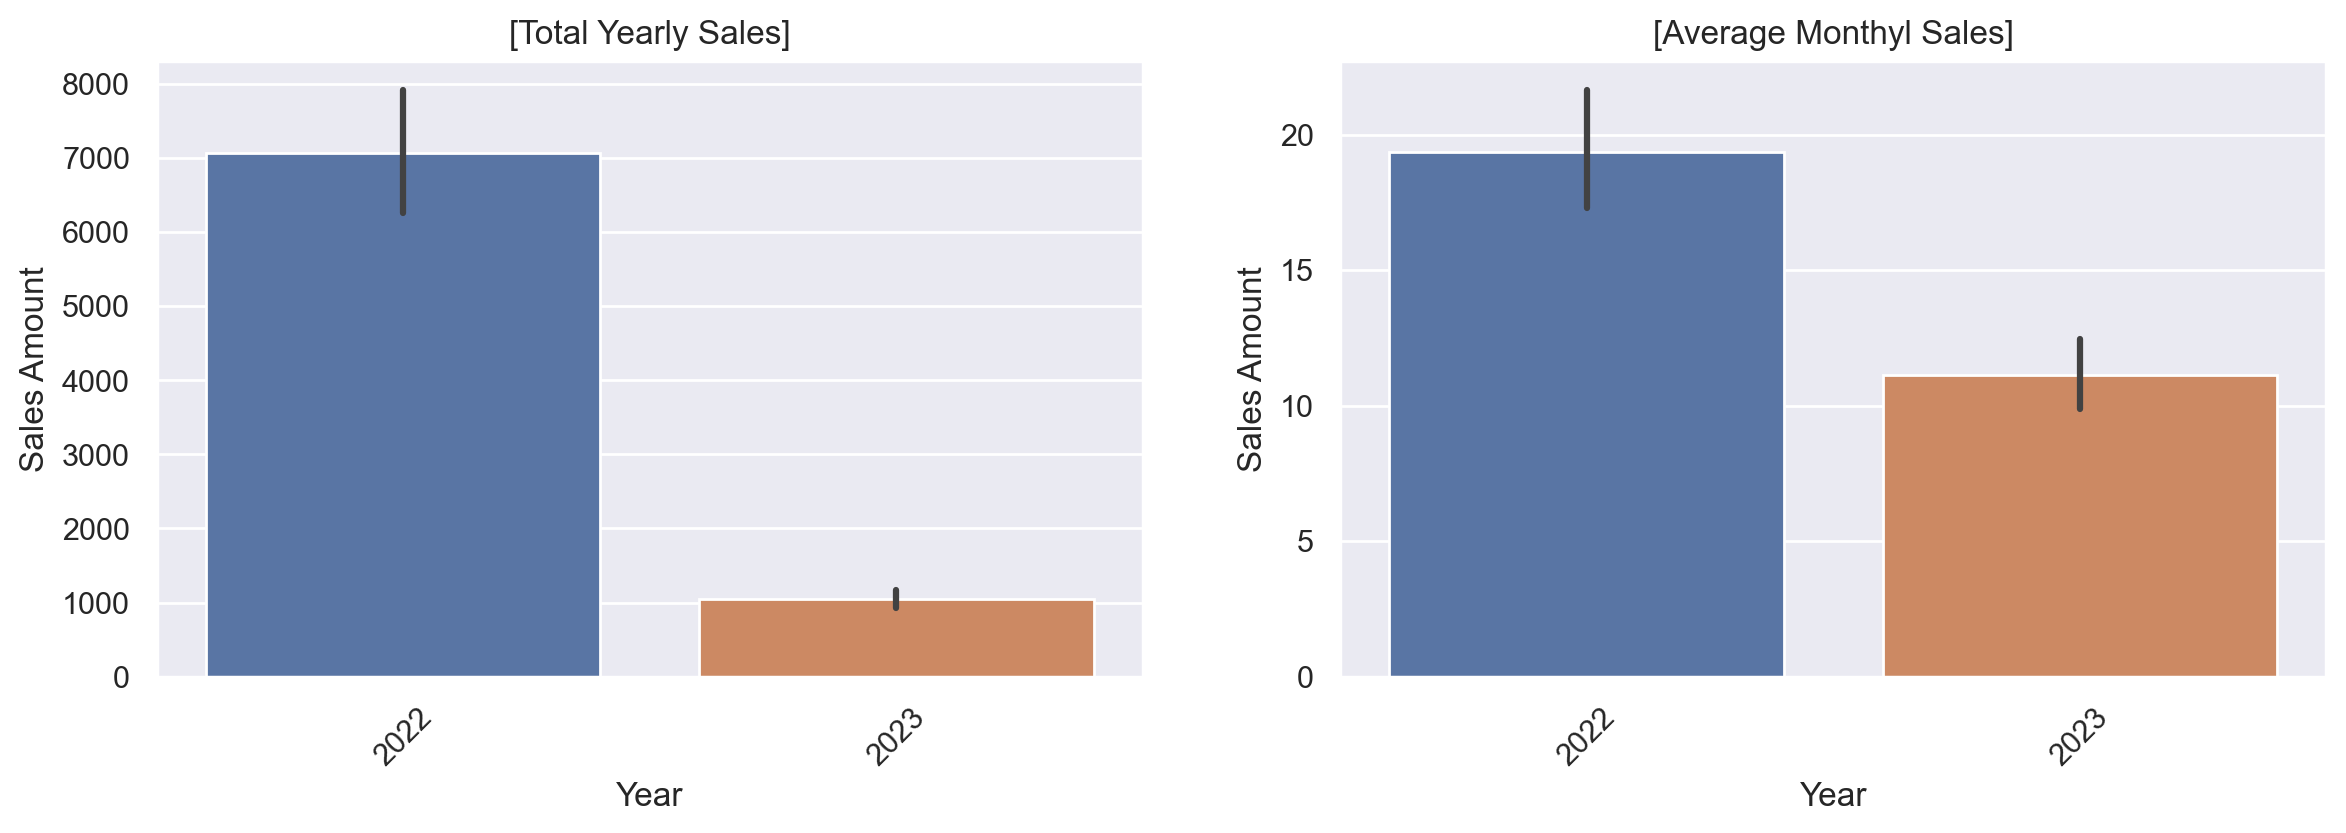

In [40]:
# 연도별 분포
f, ax = plt.subplots(1, 2, figsize = (14, 4))

sns.barplot(data = df_train_yearly_sum, ax = ax[0])
ax[0].set_title('[Total Yearly Sales]')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Sales Amount')
ax[0].tick_params(axis = 'x', rotation = 45)

sns.barplot(data = df_train_yearly_mean, ax = ax[1])
ax[1].set_title('[Average Monthyl Sales]')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Sales Amount')
ax[1].tick_params(axis = 'x', rotation = 45)

2022년은 1년치 데이터가 모두 있지만, 2023년에는 4월까지의 데이터밖에 없으므로 연도별 차이가 발생한다.  
2023년은 총 판매량에 비해 평균 판매량 값이 더 큰데, 이는 통계적으로 불가능하며 2023년의 판매 데이터의 분포가 균일하지 않음을 의미한다.

#### 월별 데이터 확인

In [41]:
df_train.columns = pd.to_datetime(df_train.columns)
df_train_monthly_sum = df_train.resample('M', axis = 1).sum().rename(columns=lambda x: x.strftime('%Y-%m'))
df_train_monthly_mean = df_train.resample('M', axis = 1).mean().rename(columns=lambda x: x.strftime('%Y-%m'))

In [42]:
df_train_monthly_sum

,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,0,9,3,23,32,0,0,0,1,39,32,61,93,50,0,0
1,3,0,69,139,73,95,69,38,18,17,1,0,38,20,6,2
2,0,12,96,211,120,160,156,113,33,51,29,37,19,0,0,0
3,4,245,140,414,156,212,175,98,39,70,32,3,0,0,0,0
4,6,25,169,214,2,0,0,0,0,82,382,202,70,73,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15985,0,0,786,275,457,123,157,73,634,684,928,680,572,501,0,0
15986,0,0,0,0,0,75,325,212,122,122,96,195,282,650,5,9
15987,22,51,410,394,257,301,161,63,53,22,30,14,2,3,0,0
15988,0,4,0,5,108,220,203,159,129,90,51,31,38,17,0,2


In [43]:
df_train_monthly_mean

,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,0.000000,0.321429,0.096774,0.766667,1.032258,0.000000,0.000000,0.000000,0.033333,1.258065,1.066667,1.967742,3.000000,1.785714,0.000000,0.00
1,0.096774,0.000000,2.225806,4.633333,2.354839,3.166667,2.225806,1.225806,0.600000,0.548387,0.033333,0.000000,1.225806,0.714286,0.193548,0.50
2,0.000000,0.428571,3.096774,7.033333,3.870968,5.333333,5.032258,3.645161,1.100000,1.645161,0.966667,1.193548,0.612903,0.000000,0.000000,0.00
3,0.129032,8.750000,4.516129,13.800000,5.032258,7.066667,5.645161,3.161290,1.300000,2.258065,1.066667,0.096774,0.000000,0.000000,0.000000,0.00
4,0.193548,0.892857,5.451613,7.133333,0.064516,0.000000,0.000000,0.000000,0.000000,2.645161,12.733333,6.516129,2.258065,2.607143,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15985,0.000000,0.000000,25.354839,9.166667,14.741935,4.100000,5.064516,2.354839,21.133333,22.064516,30.933333,21.935484,18.451613,17.892857,0.000000,0.00
15986,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000,10.483871,6.838710,4.066667,3.935484,3.200000,6.290323,9.096774,23.214286,0.161290,2.25
15987,0.709677,1.821429,13.225806,13.133333,8.290323,10.033333,5.193548,2.032258,1.766667,0.709677,1.000000,0.451613,0.064516,0.107143,0.000000,0.00
15988,0.000000,0.142857,0.000000,0.166667,3.483871,7.333333,6.548387,5.129032,4.300000,2.903226,1.700000,1.000000,1.225806,0.607143,0.000000,0.50


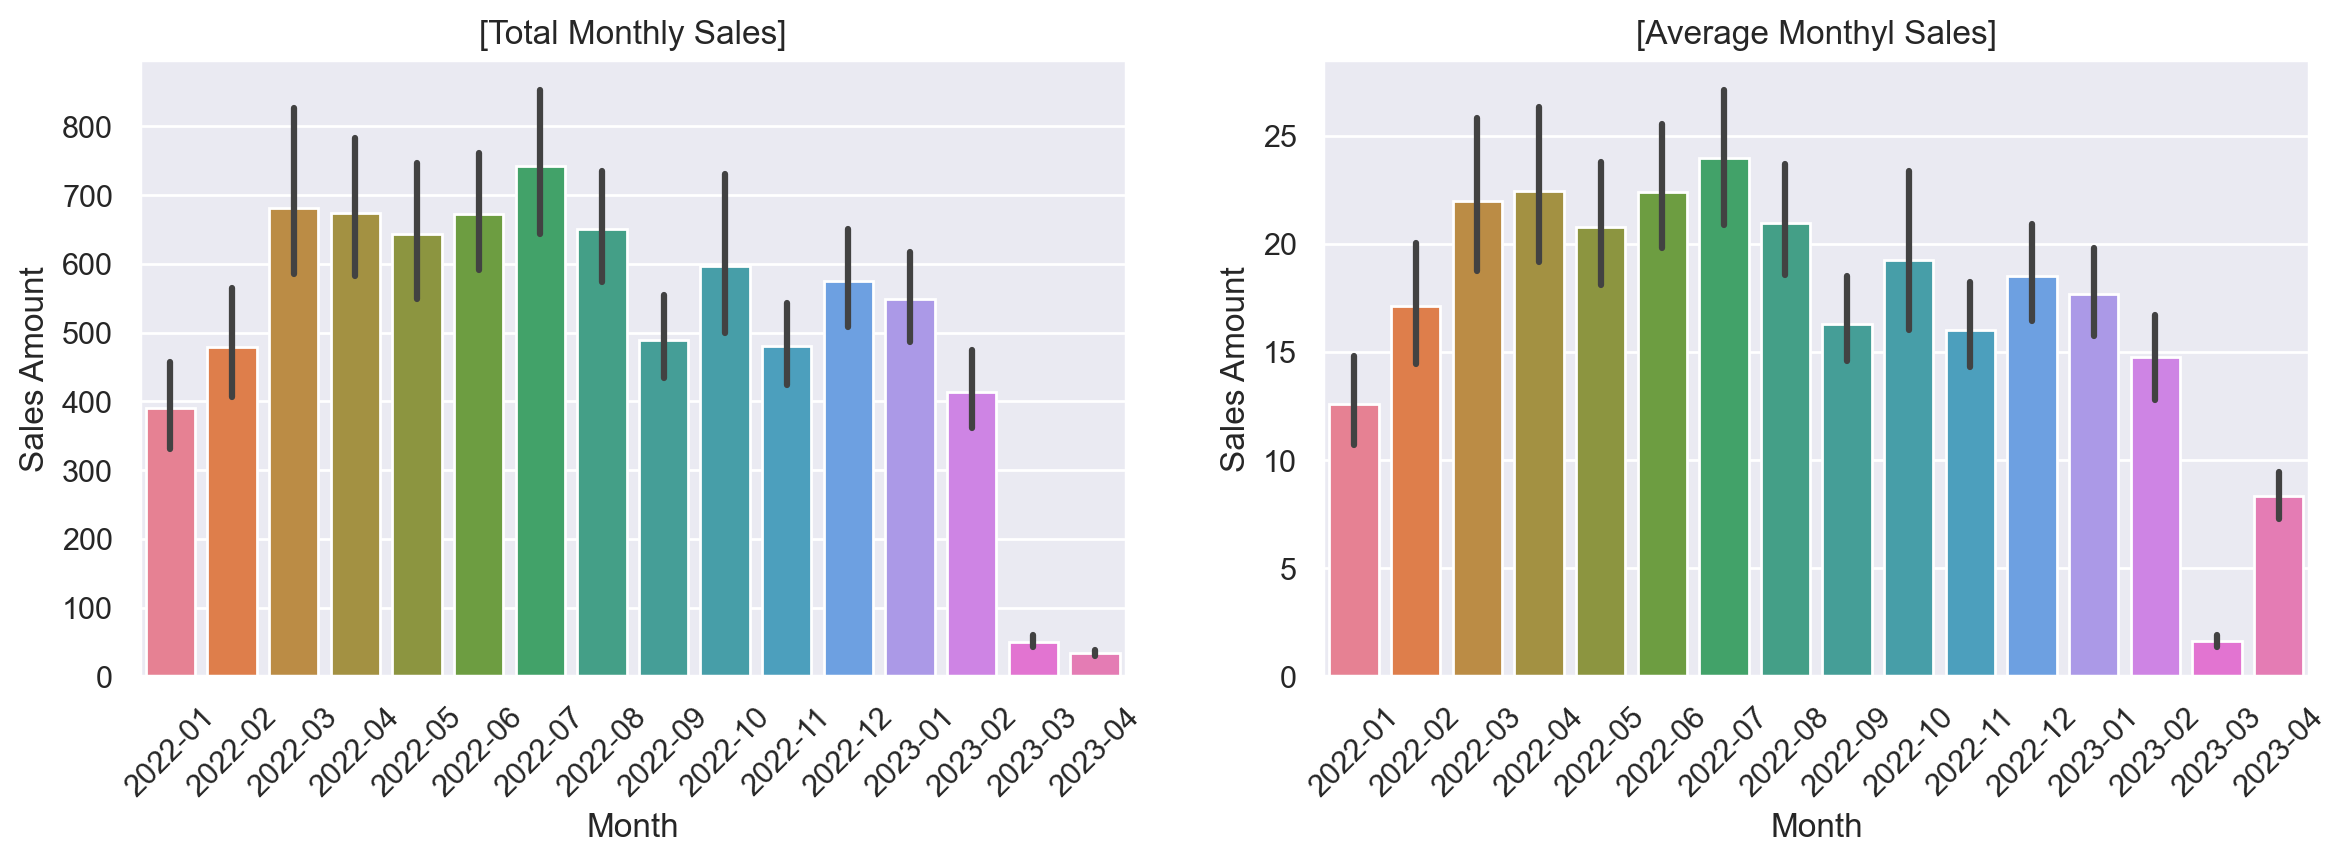

In [44]:
# 월별 분포
f, ax = plt.subplots(1, 2, figsize = (14, 4))

sns.barplot(data = df_train_monthly_sum, ax = ax[0])
ax[0].set_title('[Total Monthly Sales]')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Sales Amount')
ax[0].tick_params(axis = 'x', rotation = 45)

sns.barplot(data = df_train_monthly_mean, ax = ax[1])
ax[1].set_title('[Average Monthyl Sales]')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Sales Amount')
ax[1].tick_params(axis = 'x', rotation = 45)

- 2022년의 데이터를 살펴보면, 상대적으로 3~8월의 판매량이 상대적으로 높다.  
- 2023년은 1, 2월에 비해 3, 4월의 총 판매량이 매우 작으며,
- 4월의 평균 판매량이 총 판매량 값보다 큰 것으로 보아 2023년 4월의 데이터 분포가 불균형함을 알 수 있다.

#### 계절별 데이터

In [45]:
# 계절별 분포

def season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:  # December to February
        return 'Winter'

In [46]:
df_train_seasons = df_train.copy()
df_train_seasons.columns = pd.to_datetime(df_train_seasons.columns)

df_train_seasons = df_train_seasons.rename(columns=lambda x: season(x.month))

In [47]:
df_train_seasons

,Winter,Winter,Winter,Winter,Winter,Winter,Winter,Winter,Winter,Winter,...,Spring,Spring,Spring,Spring,Spring,Spring,Spring,Spring,Spring,Spring
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,3,2,0,0,2,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,2,4,1,1,3
15987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [48]:
df_train_seasonal_sum = df_train_seasons.groupby(df_train_seasons.columns, axis=1).sum()
df_train_seasonal_mean = df_train_seasons.groupby(df_train_seasons.columns, axis=1).mean()

In [49]:
df_train_seasonal_sum 

,Fall,Spring,Summer,Winter
0,72,58,0,213
1,36,289,202,61
2,113,427,429,68
3,141,710,485,252
4,464,385,0,376
...,...,...,...,...
15985,2246,1518,353,1753
15986,340,14,612,1127
15987,105,1061,525,92
15988,270,115,582,90


In [50]:
df_train_seasonal_mean

,Fall,Spring,Summer,Winter
0,0.791209,0.456693,0.000000,1.429530
1,0.395604,2.275591,2.195652,0.409396
2,1.241758,3.362205,4.663043,0.456376
3,1.549451,5.590551,5.271739,1.691275
4,5.098901,3.031496,0.000000,2.523490
...,...,...,...,...
15985,24.681319,11.952756,3.836957,11.765101
15986,3.736264,0.110236,6.652174,7.563758
15987,1.153846,8.354331,5.706522,0.617450
15988,2.967033,0.905512,6.326087,0.604027


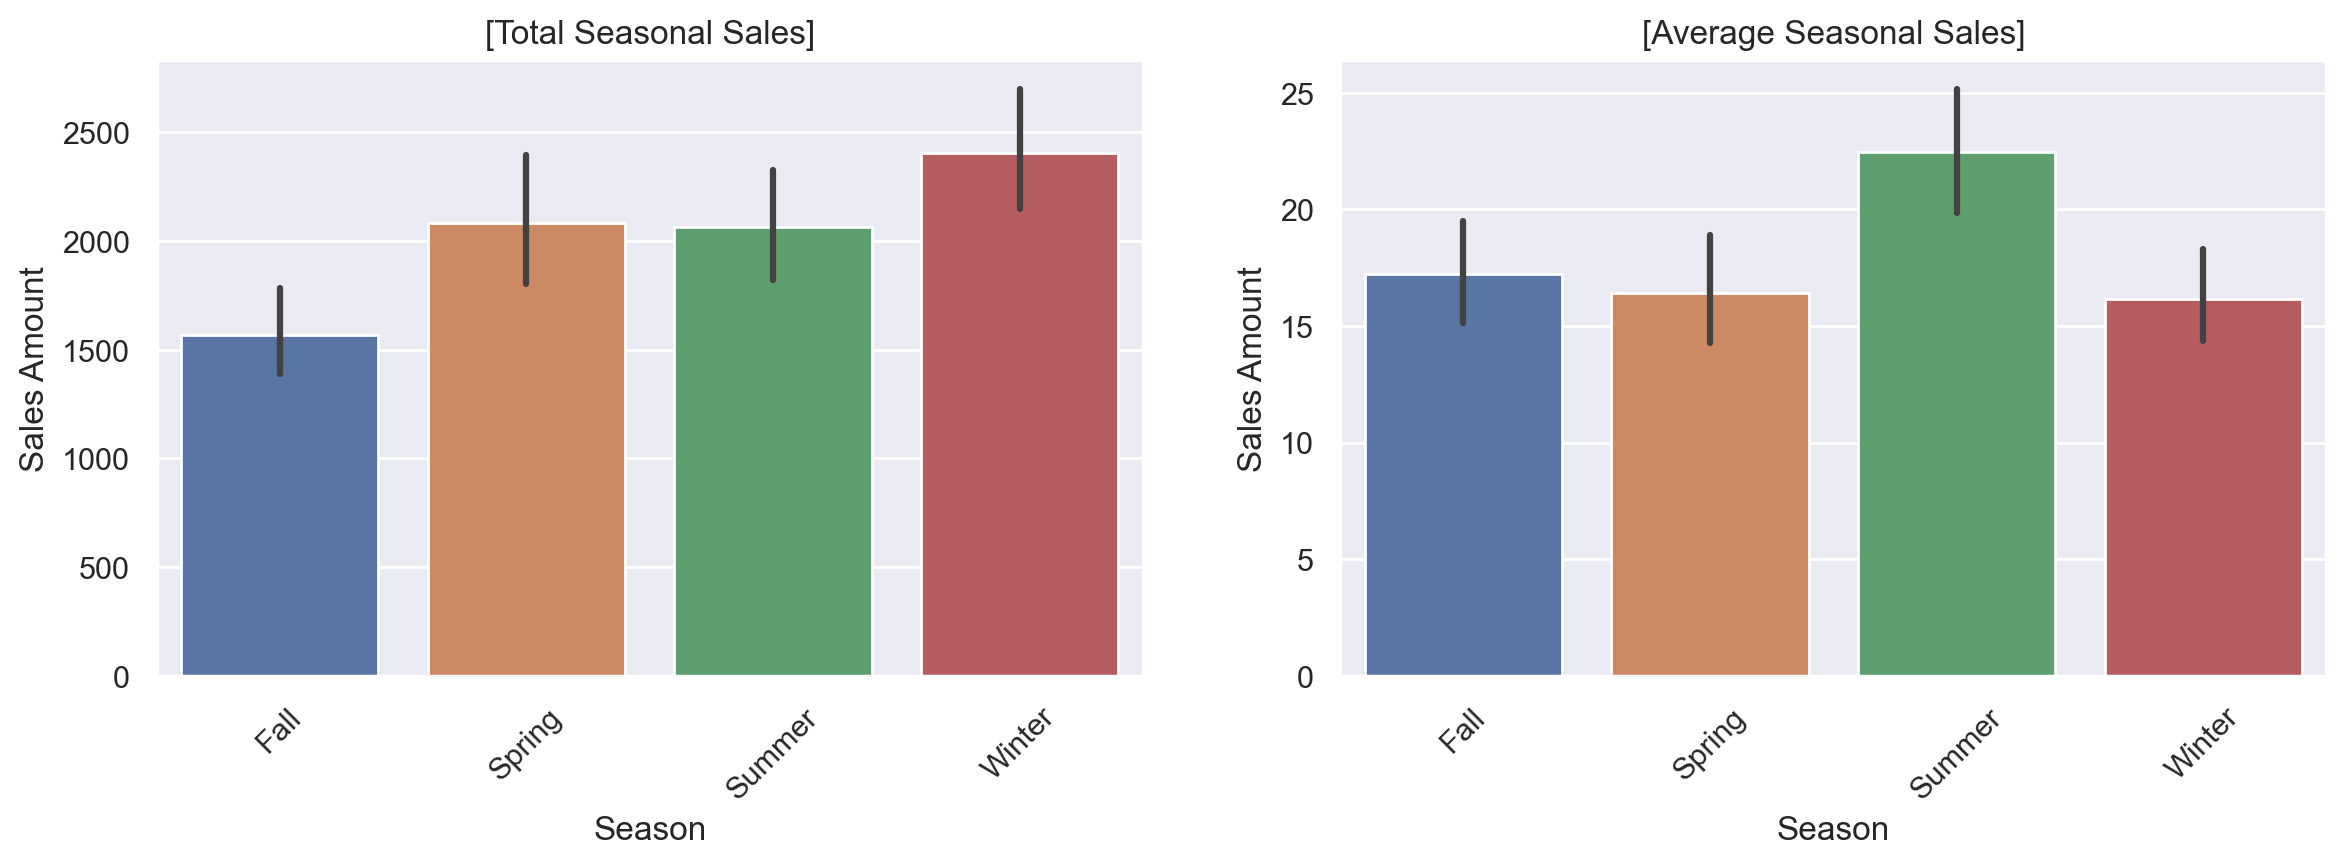

In [51]:
f, ax = plt.subplots(1, 2, figsize = (14, 4))

sns.barplot(data = df_train_seasonal_sum, ax = ax[0])
ax[0].set_title('[Total Seasonal Sales]')
ax[0].set_xlabel('Season')
ax[0].set_ylabel('Sales Amount')
ax[0].tick_params(axis = 'x', rotation = 45)

sns.barplot(data = df_train_seasonal_mean, ax = ax[1])
ax[1].set_title('[Average Seasonal Sales]')
ax[1].set_xlabel('Season')
ax[1].set_ylabel('Sales Amount')
ax[1].tick_params(axis = 'x', rotation = 45)

- 여름, 가을, 봄, 겨울 순으로 평균 판매량 감소

#### 요일별 데이터

In [52]:
# 요일별 판매량

df_train_weekdays = df_train.copy()
df_train_weekdays.columns = df_train_weekdays.columns.weekday

df_train_weekday_sum = df_train_weekdays.groupby(df_train_weekdays.columns, axis=1).sum()
df_train_weekday_mean = df_train_weekdays.groupby(df_train_weekdays.columns, axis=1).mean()

In [53]:
df_train_weekday_sum

,0,1,2,3,4,5,6
0,32,47,70,62,63,37,32
1,70,67,77,94,105,95,80
2,152,148,132,141,145,165,154
3,235,258,198,210,188,248,251
4,109,129,136,175,268,238,170
...,...,...,...,...,...,...,...
15985,923,399,360,629,920,1238,1401
15986,227,222,285,348,347,369,295
15987,247,225,245,278,297,254,237
15988,128,119,134,167,181,175,153


In [54]:
df_train_weekday_mean

,0,1,2,3,4,5,6
0,0.484848,0.712121,1.076923,0.953846,0.969231,0.560606,0.484848
1,1.060606,1.015152,1.184615,1.446154,1.615385,1.439394,1.212121
2,2.303030,2.242424,2.030769,2.169231,2.230769,2.500000,2.333333
3,3.560606,3.909091,3.046154,3.230769,2.892308,3.757576,3.803030
4,1.651515,1.954545,2.092308,2.692308,4.123077,3.606061,2.575758
...,...,...,...,...,...,...,...
15985,13.984848,6.045455,5.538462,9.676923,14.153846,18.757576,21.227273
15986,3.439394,3.363636,4.384615,5.353846,5.338462,5.590909,4.469697
15987,3.742424,3.409091,3.769231,4.276923,4.569231,3.848485,3.590909
15988,1.939394,1.803030,2.061538,2.569231,2.784615,2.651515,2.318182


In [55]:
weekday_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_train_weekday_sum.rename(columns=weekday_names, inplace=True)
df_train_weekday_mean.rename(columns=weekday_names, inplace=True)

In [56]:
df_train_weekday_sum

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,32,47,70,62,63,37,32
1,70,67,77,94,105,95,80
2,152,148,132,141,145,165,154
3,235,258,198,210,188,248,251
4,109,129,136,175,268,238,170
...,...,...,...,...,...,...,...
15985,923,399,360,629,920,1238,1401
15986,227,222,285,348,347,369,295
15987,247,225,245,278,297,254,237
15988,128,119,134,167,181,175,153


In [57]:
df_train_weekday_mean

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,0.484848,0.712121,1.076923,0.953846,0.969231,0.560606,0.484848
1,1.060606,1.015152,1.184615,1.446154,1.615385,1.439394,1.212121
2,2.303030,2.242424,2.030769,2.169231,2.230769,2.500000,2.333333
3,3.560606,3.909091,3.046154,3.230769,2.892308,3.757576,3.803030
4,1.651515,1.954545,2.092308,2.692308,4.123077,3.606061,2.575758
...,...,...,...,...,...,...,...
15985,13.984848,6.045455,5.538462,9.676923,14.153846,18.757576,21.227273
15986,3.439394,3.363636,4.384615,5.353846,5.338462,5.590909,4.469697
15987,3.742424,3.409091,3.769231,4.276923,4.569231,3.848485,3.590909
15988,1.939394,1.803030,2.061538,2.569231,2.784615,2.651515,2.318182


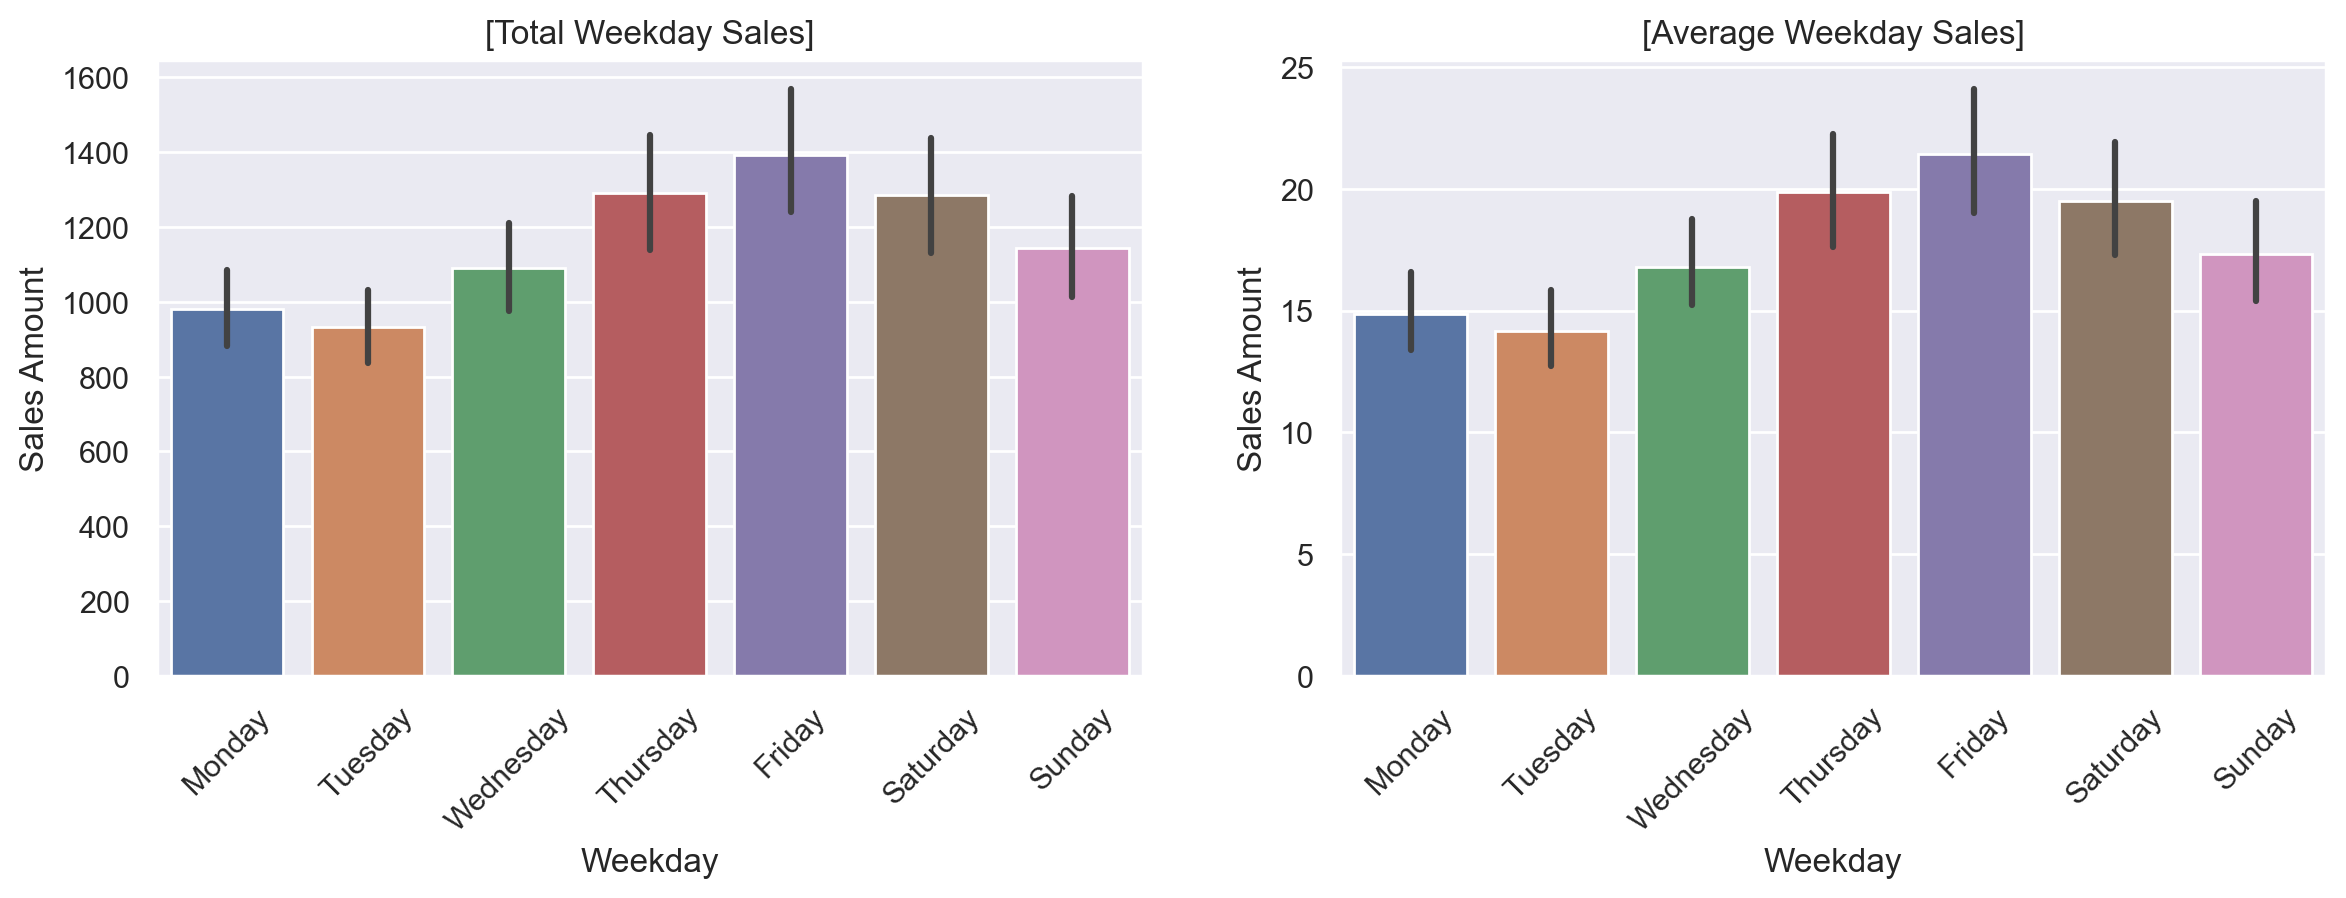

In [58]:
f, ax = plt.subplots(1, 2, figsize = (14, 4))

sns.barplot(data = df_train_weekday_sum, ax = ax[0])
ax[0].set_title('[Total Weekday Sales]')
ax[0].set_xlabel('Weekday')
ax[0].set_ylabel('Sales Amount')
ax[0].tick_params(axis = 'x', rotation = 45)

sns.barplot(data = df_train_weekday_mean, ax = ax[1])
ax[1].set_title('[Average Weekday Sales]')
ax[1].set_xlabel('Weekday')
ax[1].set_ylabel('Sales Amount')
ax[1].tick_params(axis = 'x', rotation = 45)

- 두 그래프에 대해 요일별 데이터의 분포가 유사함.
- 금요일에 판매량이 가장 높으며, 목요일, 토요일, 일요일, 수요일, 월요일, 화요일 순으로 판매량이 감소한다.
- 즉, 목 ~일의 판매량이 월 ~수의 판매량보다 높다.

#### 연도별 데이터 vs. 월별 데이터

In [59]:
df_train_2022 = df_train.loc[:, '2022-01-01':'2022-12-31']
monthly_data_2022_sum = df_train_2022.resample('M', axis = 1).sum().rename(columns=lambda x: x.strftime('%Y-%m'))
monthly_data_2022_mean = df_train_2022.resample('M', axis = 1).mean().rename(columns=lambda x: x.strftime('%Y-%m'))

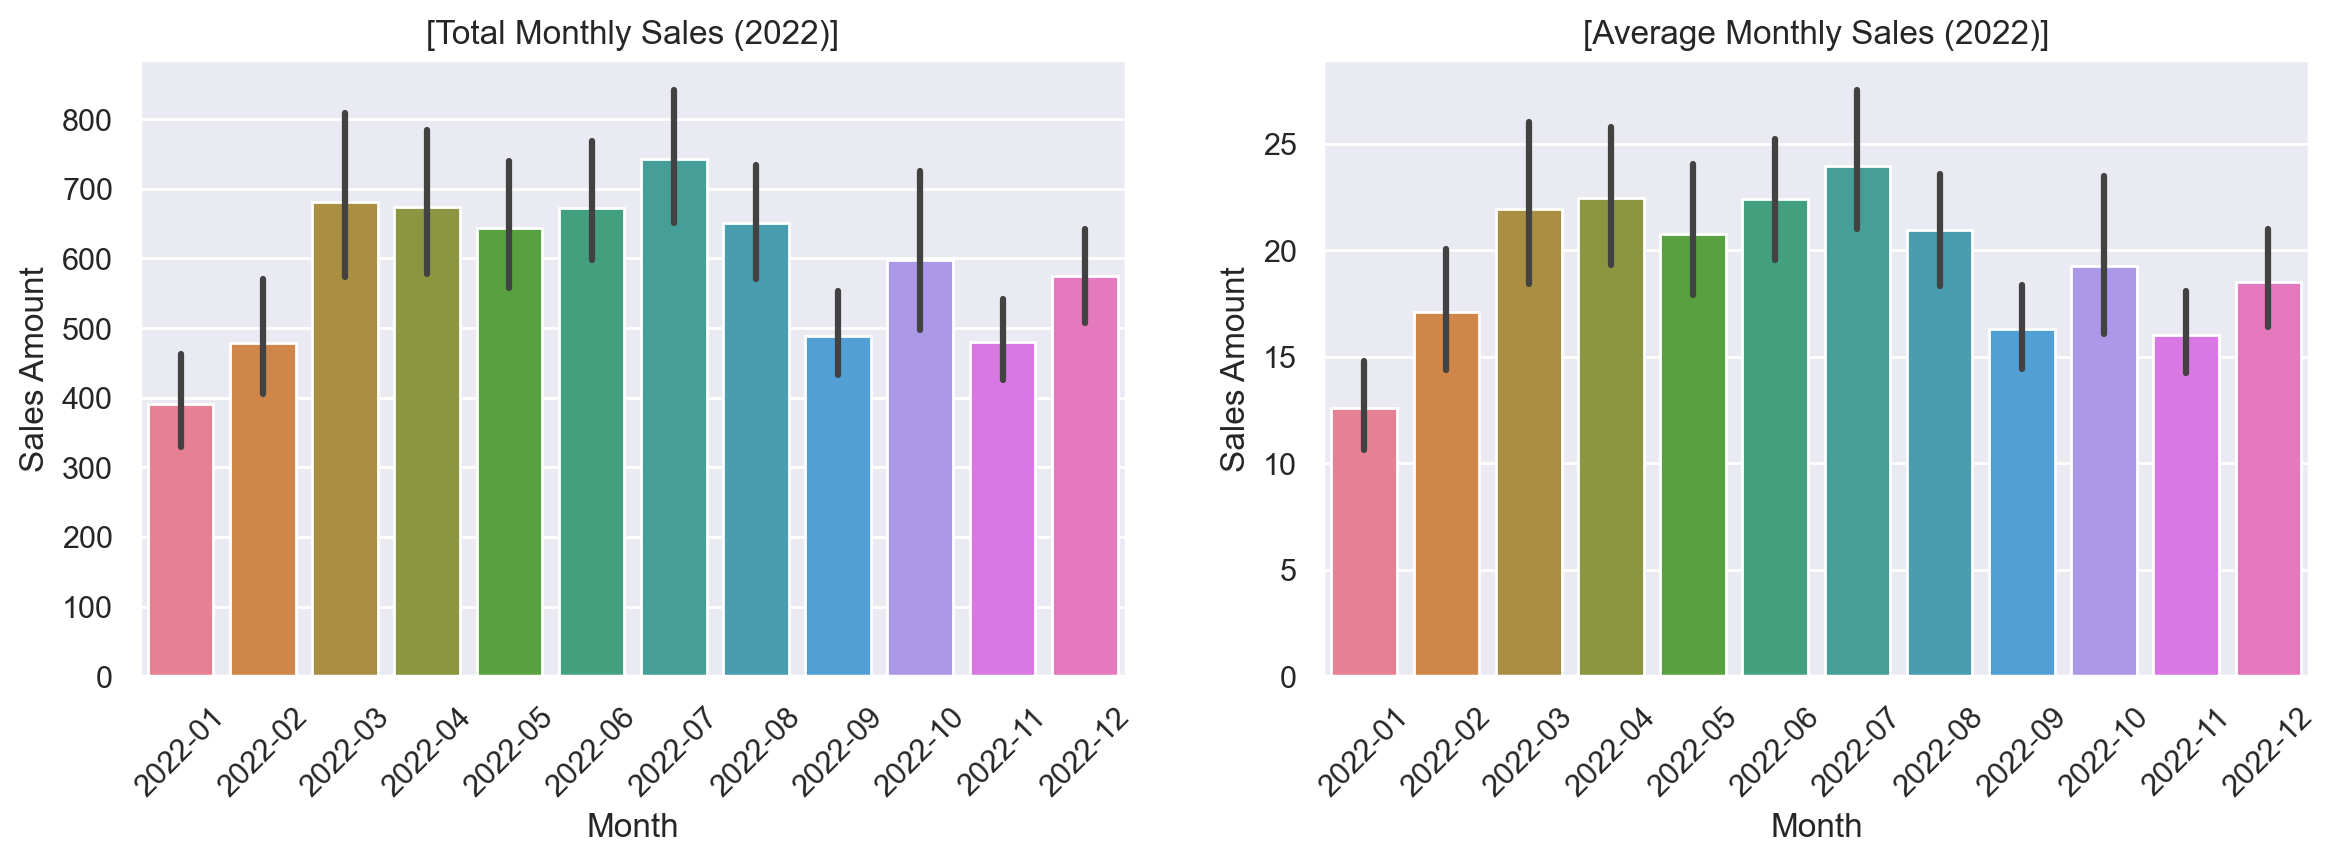

In [60]:
f, ax = plt.subplots(1, 2, figsize = (14, 4))

sns.barplot(data = monthly_data_2022_sum, ax = ax[0])
ax[0].set_title('[Total Monthly Sales (2022)]')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Sales Amount')
ax[0].tick_params(axis = 'x', rotation = 45)

sns.barplot(data = monthly_data_2022_mean, ax = ax[1])
ax[1].set_title('[Average Monthly Sales (2022)]')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Sales Amount')
ax[1].tick_params(axis = 'x', rotation = 45)

- 2022년의 데이터를 살펴보면, 상대적으로 3~8월의 판매량이 상대적으로 높다.  

In [61]:
df_train_2023 = df_train.loc[:, '2023-01-01':]
monthly_data_2023_sum = df_train_2023.resample('M', axis = 1).sum().rename(columns=lambda x: x.strftime('%Y-%m'))
monthly_data_2023_mean = df_train_2023.resample('M', axis = 1).mean().rename(columns=lambda x: x.strftime('%Y-%m'))

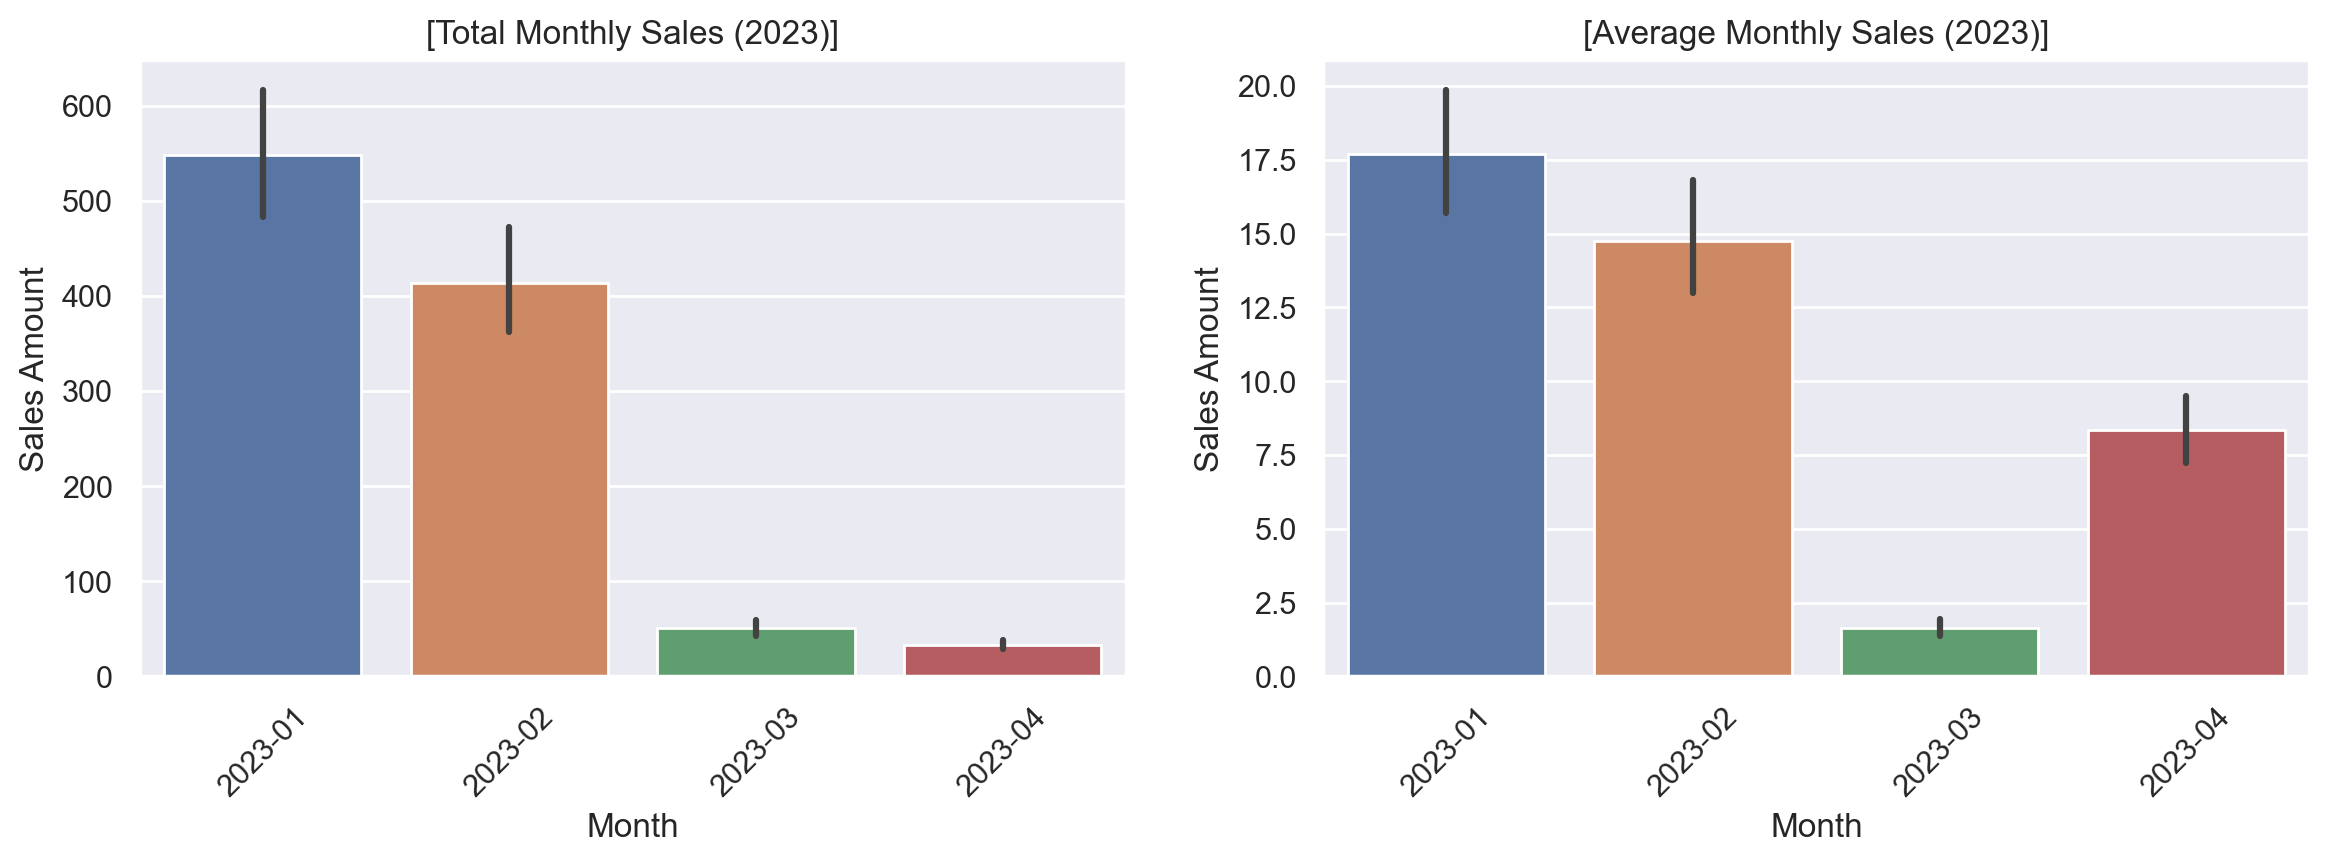

In [62]:
f, ax = plt.subplots(1, 2, figsize = (14, 4))

sns.barplot(data = monthly_data_2023_sum, ax = ax[0])
ax[0].set_title('[Total Monthly Sales (2023)]')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Sales Amount')
ax[0].tick_params(axis = 'x', rotation = 45)

sns.barplot(data = monthly_data_2023_mean, ax = ax[1])
ax[1].set_title('[Average Monthly Sales (2023)]')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Sales Amount')
ax[1].tick_params(axis = 'x', rotation = 45)

- 2023년의 데이터를 살펴보면, 상대적으로 1~2월의 판매량이 높다.  

#### 연도별 데이터 vs. 계절별 데이터

In [63]:
df_train_2022_seasons = df_train_2022.copy()
df_train_2022_seasons.columns = pd.to_datetime(df_train_2022_seasons.columns)

df_train_2022_seasons = df_train_2022_seasons.rename(columns=lambda x: season(x.month))
seasonal_data_2022_sum = df_train_2022_seasons.groupby(df_train_2022_seasons.columns, axis=1).sum()
seasonal_data_2022_mean = df_train_2022_seasons.groupby(df_train_2022_seasons.columns, axis=1).mean()

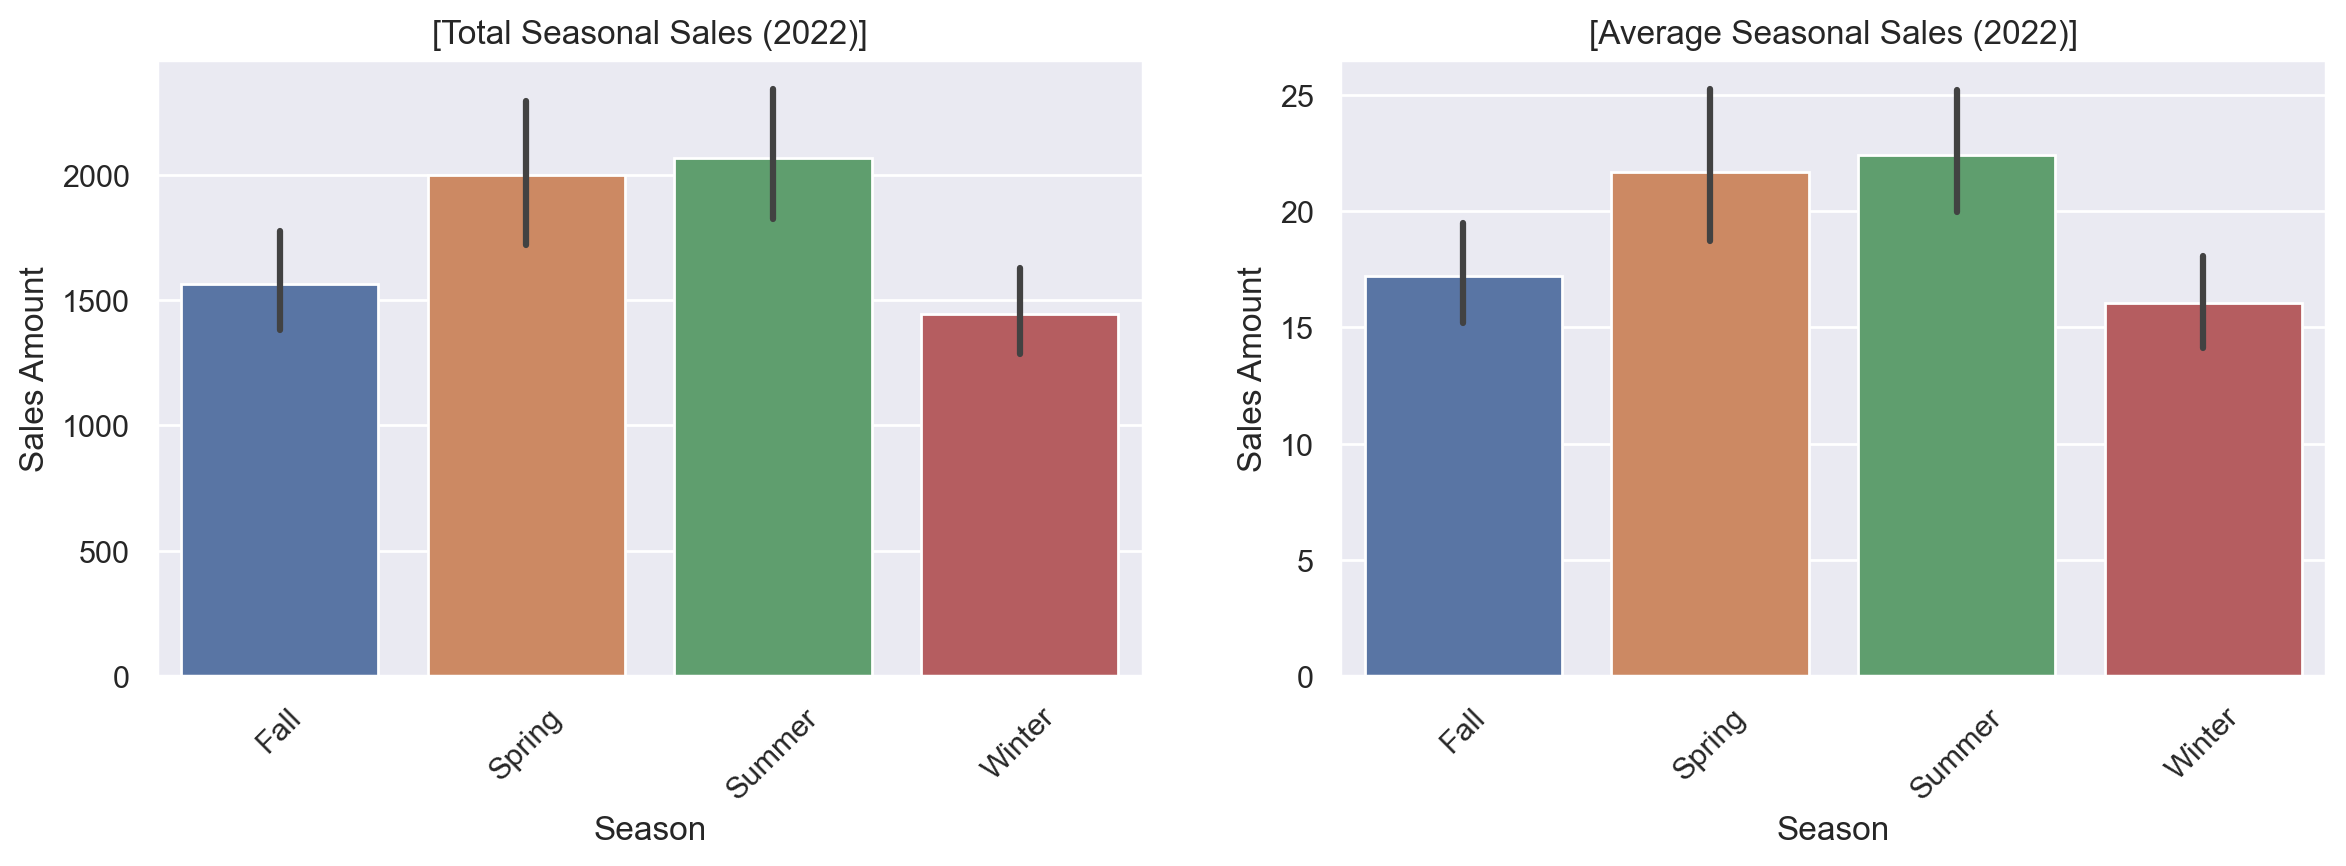

In [64]:
f, ax = plt.subplots(1, 2, figsize = (14, 4))

sns.barplot(data = seasonal_data_2022_sum, ax = ax[0])
ax[0].set_title('[Total Seasonal Sales (2022)]')
ax[0].set_xlabel('Season')
ax[0].set_ylabel('Sales Amount')
ax[0].tick_params(axis = 'x', rotation = 45)

sns.barplot(data = seasonal_data_2022_mean, ax = ax[1])
ax[1].set_title('[Average Seasonal Sales (2022)]')
ax[1].set_xlabel('Season')
ax[1].set_ylabel('Sales Amount')
ax[1].tick_params(axis = 'x', rotation = 45)

- 2022년의 데이터를 살펴보면, 봄(3 ~5월), 여름(6 ~8월)의 판매량이 가장 높다.  
    = 월별 판매량 분석과 일치(3 ~8월의 판매량이 상대적으로 높다.)
- 가을, 겨울의 판매량은 비슷하지만 가을의 판매량이 근소하게 더 많다.
- 겨울은 연말 연시, 크리스마스를 포함함에도 2022년에는 가을보다 판매량이 더 적다.

In [65]:
df_train_2023_seasons = df_train_2023.copy()
df_train_2023_seasons.columns = pd.to_datetime(df_train_2023_seasons.columns)

df_train_2023_seasons = df_train_2023_seasons.rename(columns=lambda x: season(x.month))
seasonal_data_2023_sum = df_train_2023_seasons.groupby(df_train_2023_seasons.columns, axis=1).sum()
seasonal_data_2023_mean = df_train_2023_seasons.groupby(df_train_2023_seasons.columns, axis=1).mean()

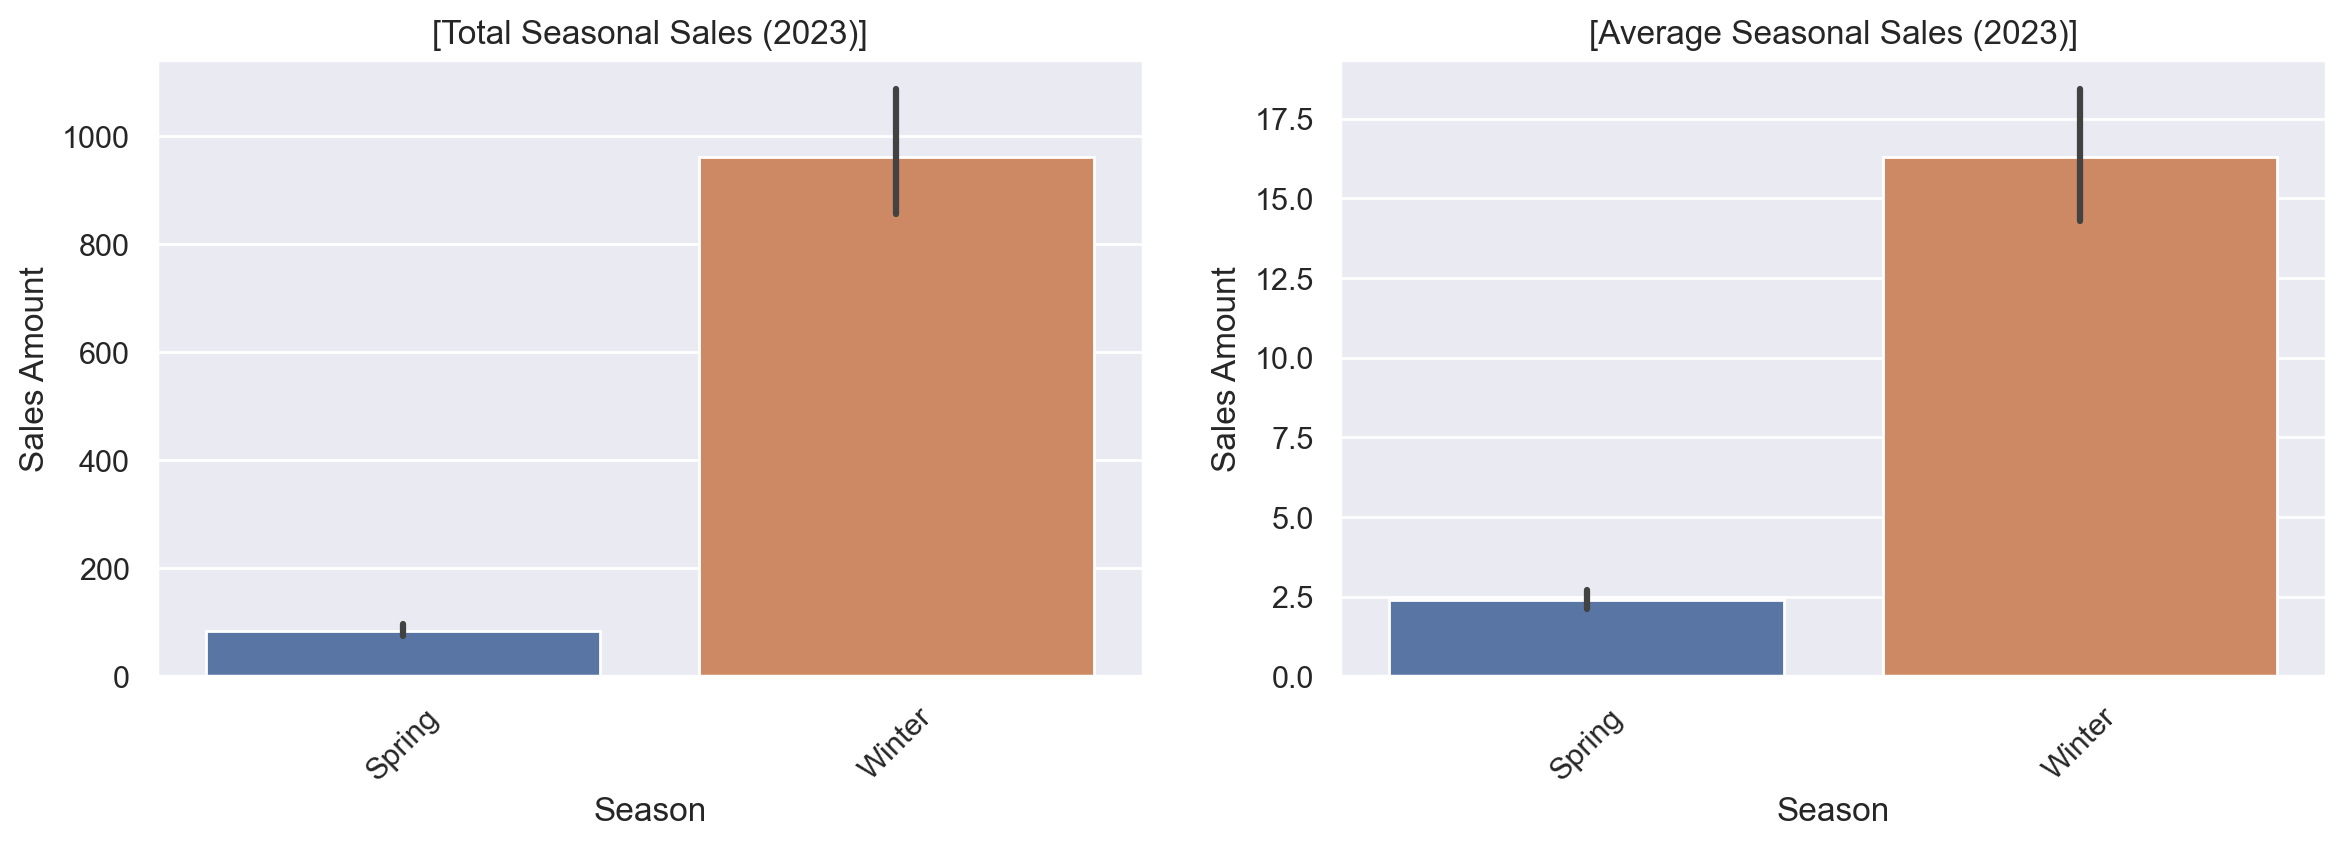

In [66]:
f, ax = plt.subplots(1, 2, figsize = (14, 4))

sns.barplot(data = seasonal_data_2023_sum, ax = ax[0])
ax[0].set_title('[Total Seasonal Sales (2023)]')
ax[0].set_xlabel('Season')
ax[0].set_ylabel('Sales Amount')
ax[0].tick_params(axis = 'x', rotation = 45)

sns.barplot(data = seasonal_data_2023_mean, ax = ax[1])
ax[1].set_title('[Average Seasonal Sales (2023)]')
ax[1].set_xlabel('Season')
ax[1].set_ylabel('Sales Amount')
ax[1].tick_params(axis = 'x', rotation = 45)

- 2023년에는 1, 2, 3월의 판매량밖에 없으며 1, 2월의 판매량이 압도적으로 많으므로 겨울의 판매량이 더 높다.

#### 연도별 데이터 vs. 요일별 데이터

In [67]:
df_train_2022_weekdays = df_train_2022.copy()
df_train_2022_weekdays.columns = pd.to_datetime(df_train_2022_weekdays.columns)

df_train_2022_weekdays = df_train_2022_weekdays.rename(columns=lambda x: x.weekday())
weekday_data_2022_sum = df_train_2022_weekdays.groupby(df_train_2022_weekdays.columns, axis=1).sum()
weekday_data_2022_mean = df_train_2022_weekdays.groupby(df_train_2022_weekdays.columns, axis=1).mean()

weekday_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
weekday_data_2022_sum.rename(columns=weekday_names, inplace=True)
weekday_data_2022_mean.rename(columns=weekday_names, inplace=True)

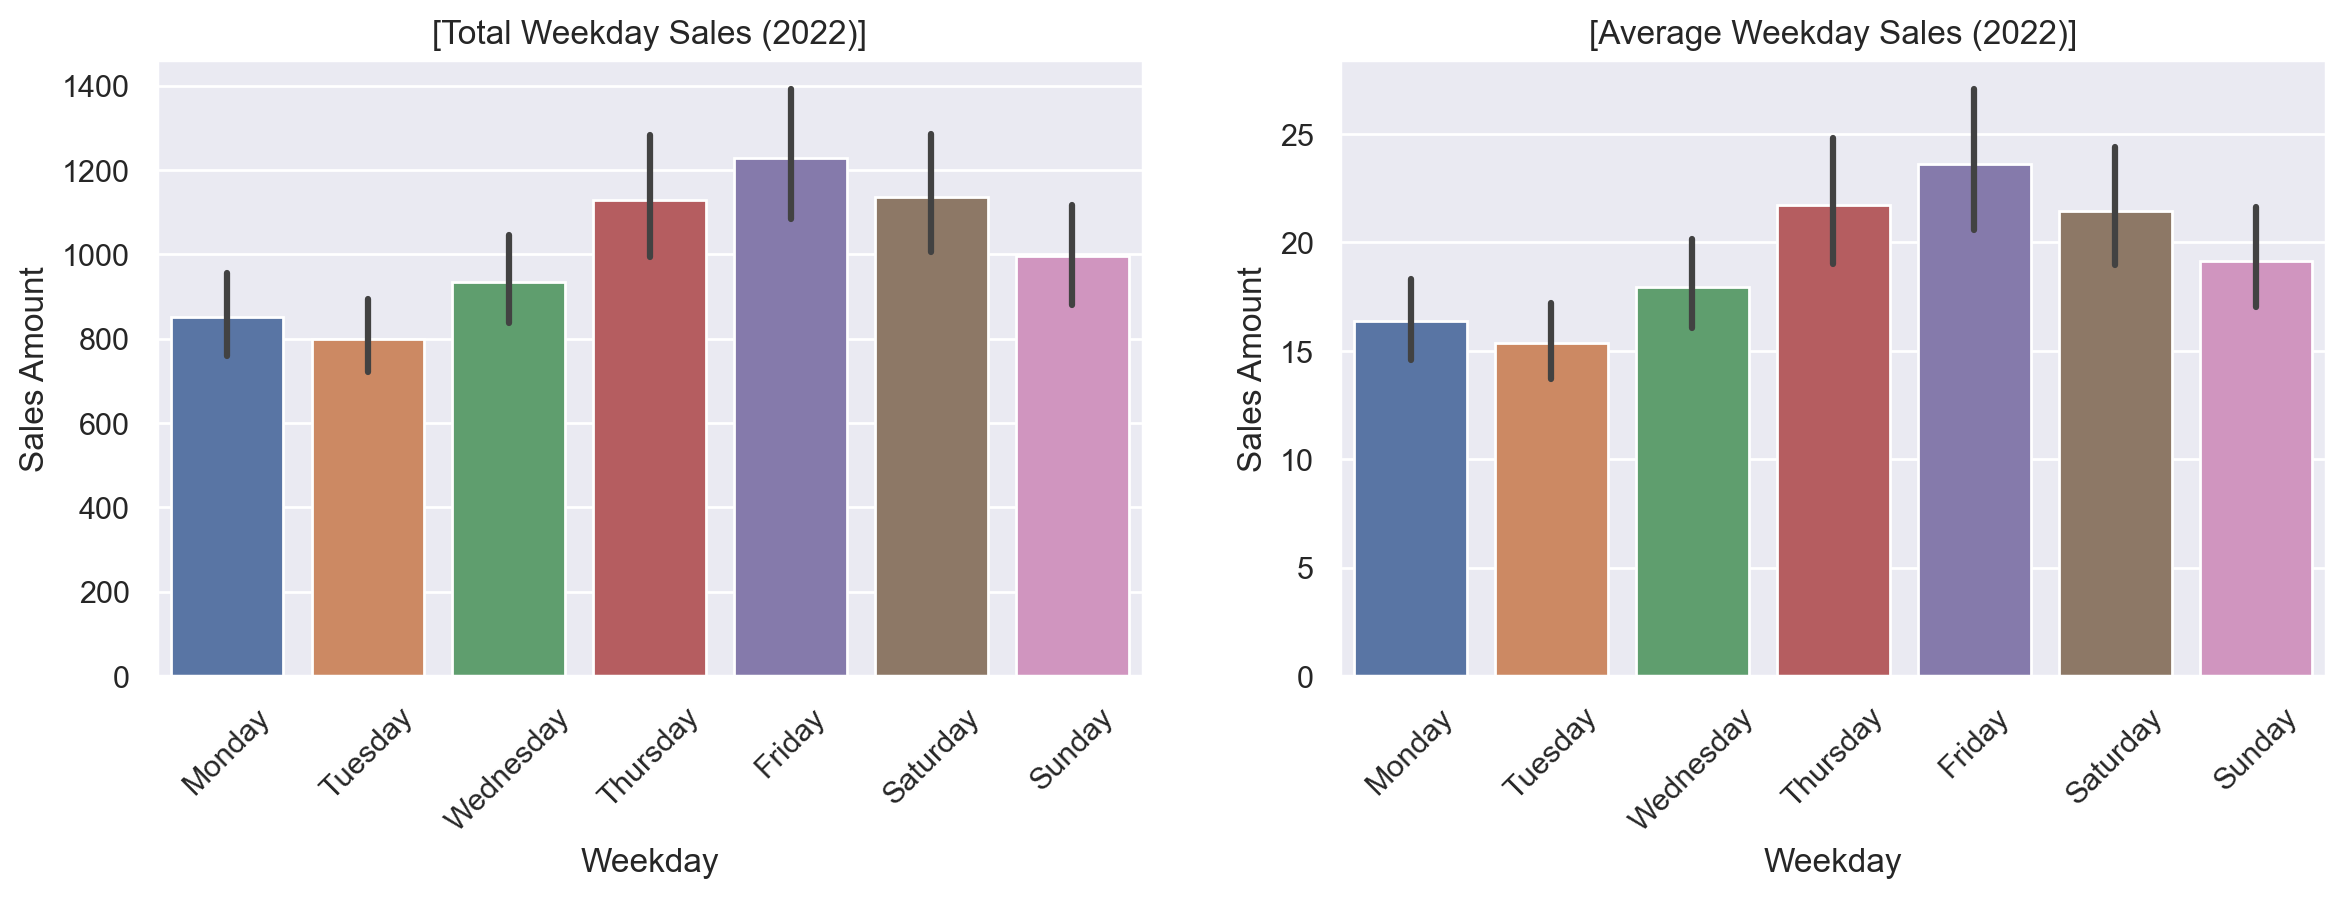

In [68]:
f, ax = plt.subplots(1, 2, figsize = (14, 4))

sns.barplot(data = weekday_data_2022_sum, ax = ax[0])
ax[0].set_title('[Total Weekday Sales (2022)]')
ax[0].set_xlabel('Weekday')
ax[0].set_ylabel('Sales Amount')
ax[0].tick_params(axis = 'x', rotation = 45)

sns.barplot(data = weekday_data_2022_mean, ax = ax[1])
ax[1].set_title('[Average Weekday Sales (2022)]')
ax[1].set_xlabel('Weekday')
ax[1].set_ylabel('Sales Amount')
ax[1].tick_params(axis = 'x', rotation = 45)

- 목 ~토의 판매량이 가장 많고, 월 ~화의 판매량이 가장 적다.  
    = 일반적으로 목 ~토에 온라인 구매를 이용함.

In [69]:
df_train_2023_weekdays = df_train_2023.copy()
df_train_2023_weekdays.columns = pd.to_datetime(df_train_2023_weekdays.columns)

df_train_2023_weekdays = df_train_2023_weekdays.rename(columns=lambda x: x.weekday())
weekday_data_2023_sum = df_train_2023_weekdays.groupby(df_train_2023_weekdays.columns, axis=1).sum()
weekday_data_2023_mean = df_train_2023_weekdays.groupby(df_train_2023_weekdays.columns, axis=1).mean()

weekday_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
weekday_data_2023_sum.rename(columns=weekday_names, inplace=True)
weekday_data_2023_mean.rename(columns=weekday_names, inplace=True)

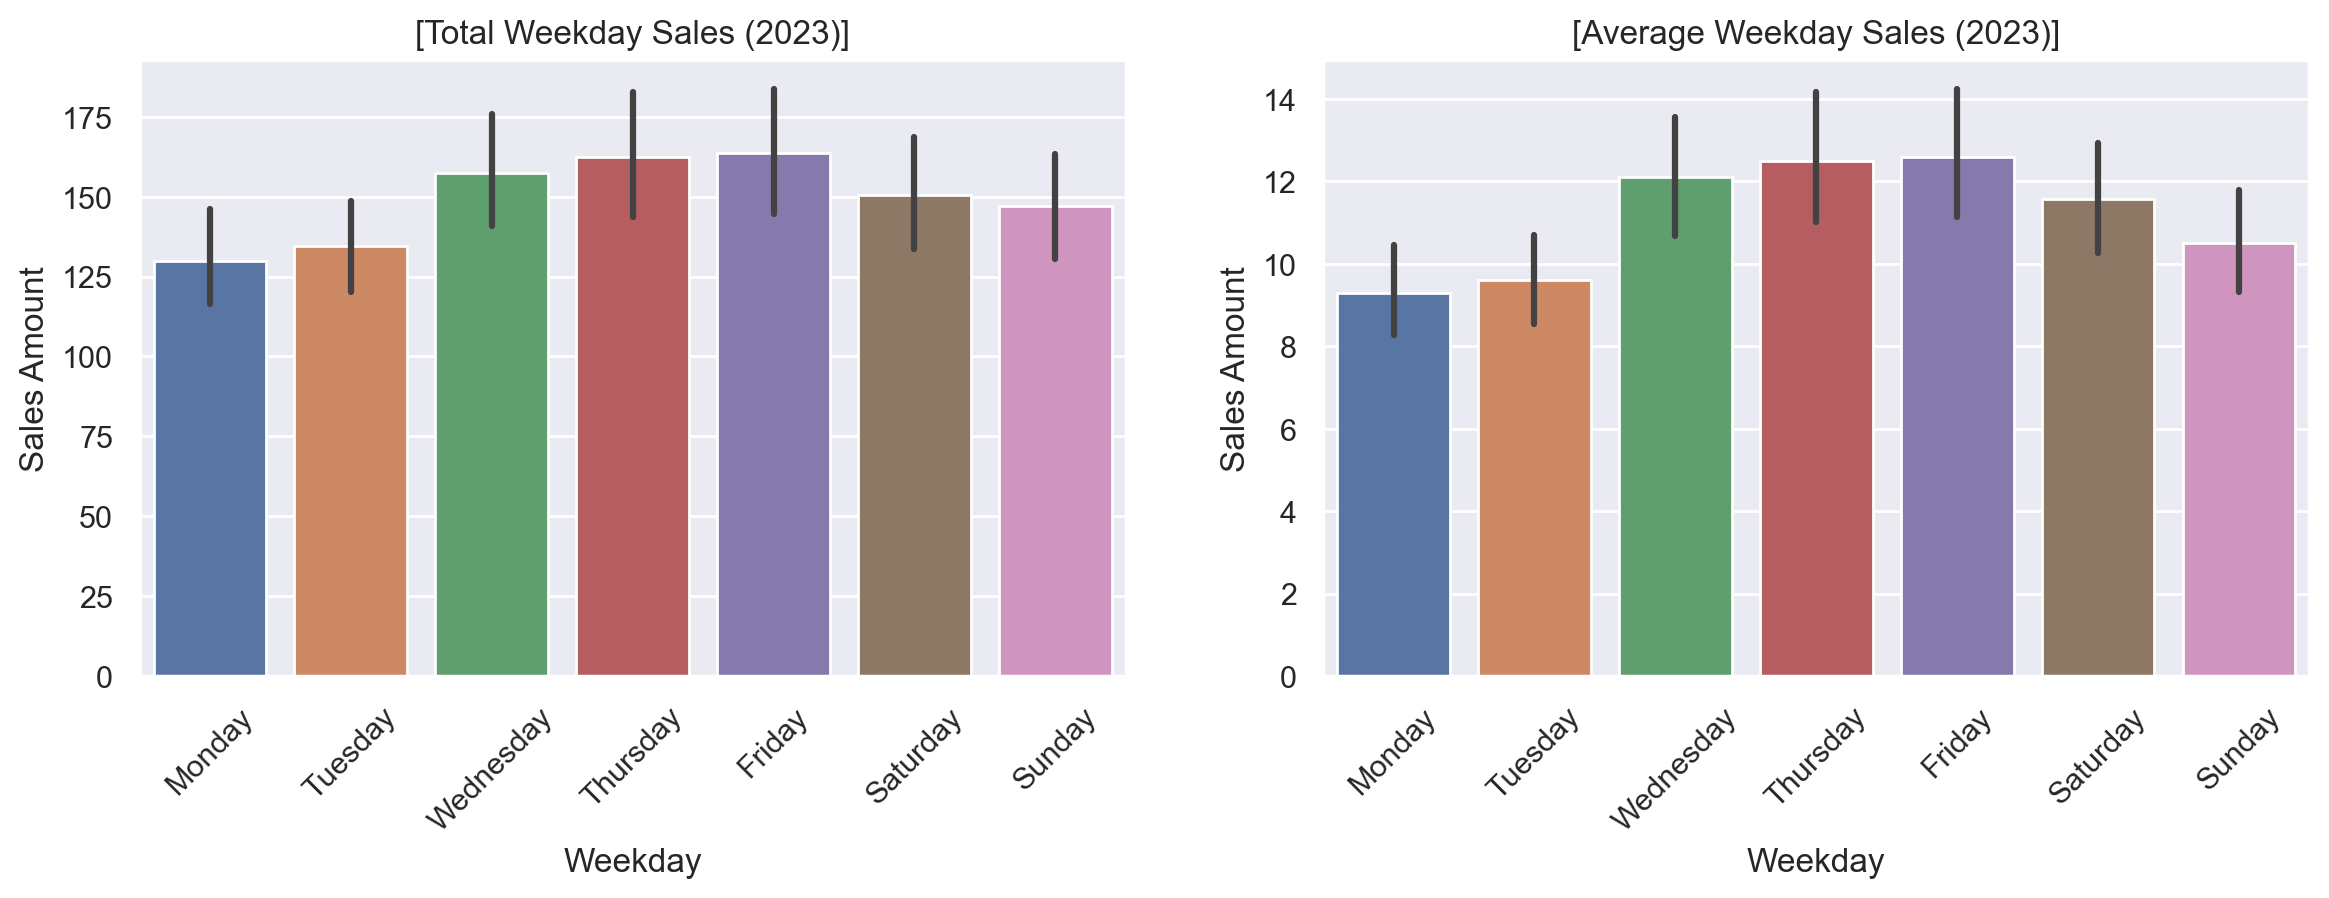

In [70]:
f, ax = plt.subplots(1, 2, figsize = (14, 4))

sns.barplot(data = weekday_data_2023_sum, ax = ax[0])
ax[0].set_title('[Total Weekday Sales (2023)]')
ax[0].set_xlabel('Weekday')
ax[0].set_ylabel('Sales Amount')
ax[0].tick_params(axis = 'x', rotation = 45)

sns.barplot(data = weekday_data_2023_mean, ax = ax[1])
ax[1].set_title('[Average Weekday Sales (2023)]')
ax[1].set_xlabel('Weekday')
ax[1].set_ylabel('Sales Amount')
ax[1].tick_params(axis = 'x', rotation = 45)

- 2023년에는 수~금에 판매량이 가장 많았다.
- 2022년과 동일하게 월~화의 판매량이 가장 적다.

#### __train(numerical data) 분석 요약__
__[2022]__
- 봄, 여름(3월 ~8월)에 판매량이 높으며 가을, 겨울의 판매량은 비슷하지만 가을 판매량이 근소하게 더 크다.
- 가을에는 9월, 겨울에는 12월의 판매량이 가장 높다.
- 목 ~토에 가장 판매량이 많고, 월 ~화의 판매량이 가장 적다.

__[2023]__
- 겨울(1 ~2월)의 판매량이 높으며 3월에는 판매량이 급감하는데 이는 코로나 팬데믹 종식 선언과 관련된 것일 수 있다.
- 수 ~금에 가장 판매량이 많고, 월 ~화의 판매량이 가장 적다.

### sales

In [71]:
# 연도별 데이터 확인
df_sales.columns = pd.to_datetime(df_sales.columns)
df_sales_yearly_sum = df_sales.resample('Y', axis = 1).sum().rename(columns=lambda x: x.strftime('%Y'))
df_sales_yearly_mean = df_sales.resample('Y', axis = 1).mean().rename(columns=lambda x: x.strftime('%Y'))

# 월별 데이터 확인
df_sales_monthly_sum = df_sales.resample('M', axis = 1).sum().rename(columns=lambda x: x.strftime('%Y-%m'))
df_sales_monthly_mean = df_sales.resample('M', axis = 1).mean().rename(columns=lambda x: x.strftime('%Y-%m'))

# 계절별 데이터 확인
df_sales_seasons = df_sales.copy()
df_sales_seasons.columns = pd.to_datetime(df_sales_seasons.columns)

df_sales_seasons = df_sales_seasons.rename(columns=lambda x: season(x.month))
df_sales_seasonal_sum = df_sales_seasons.groupby(df_sales_seasons.columns, axis=1).sum()
df_sales_seasonal_mean = df_sales_seasons.groupby(df_sales_seasons.columns, axis=1).mean()

# 요일별 데이터 확인
df_sales_weekdays = df_sales.copy()
df_sales_weekdays.columns = df_sales_weekdays.columns.weekday

df_sales_weekday_sum = df_sales_weekdays.groupby(df_sales_weekdays.columns, axis=1).sum()
df_sales_weekday_mean = df_sales_weekdays.groupby(df_sales_weekdays.columns, axis=1).mean()

weekday_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_sales_weekday_sum.rename(columns=weekday_names, inplace=True)
df_sales_weekday_mean.rename(columns=weekday_names, inplace=True)

#### 연도별 데이터 확인

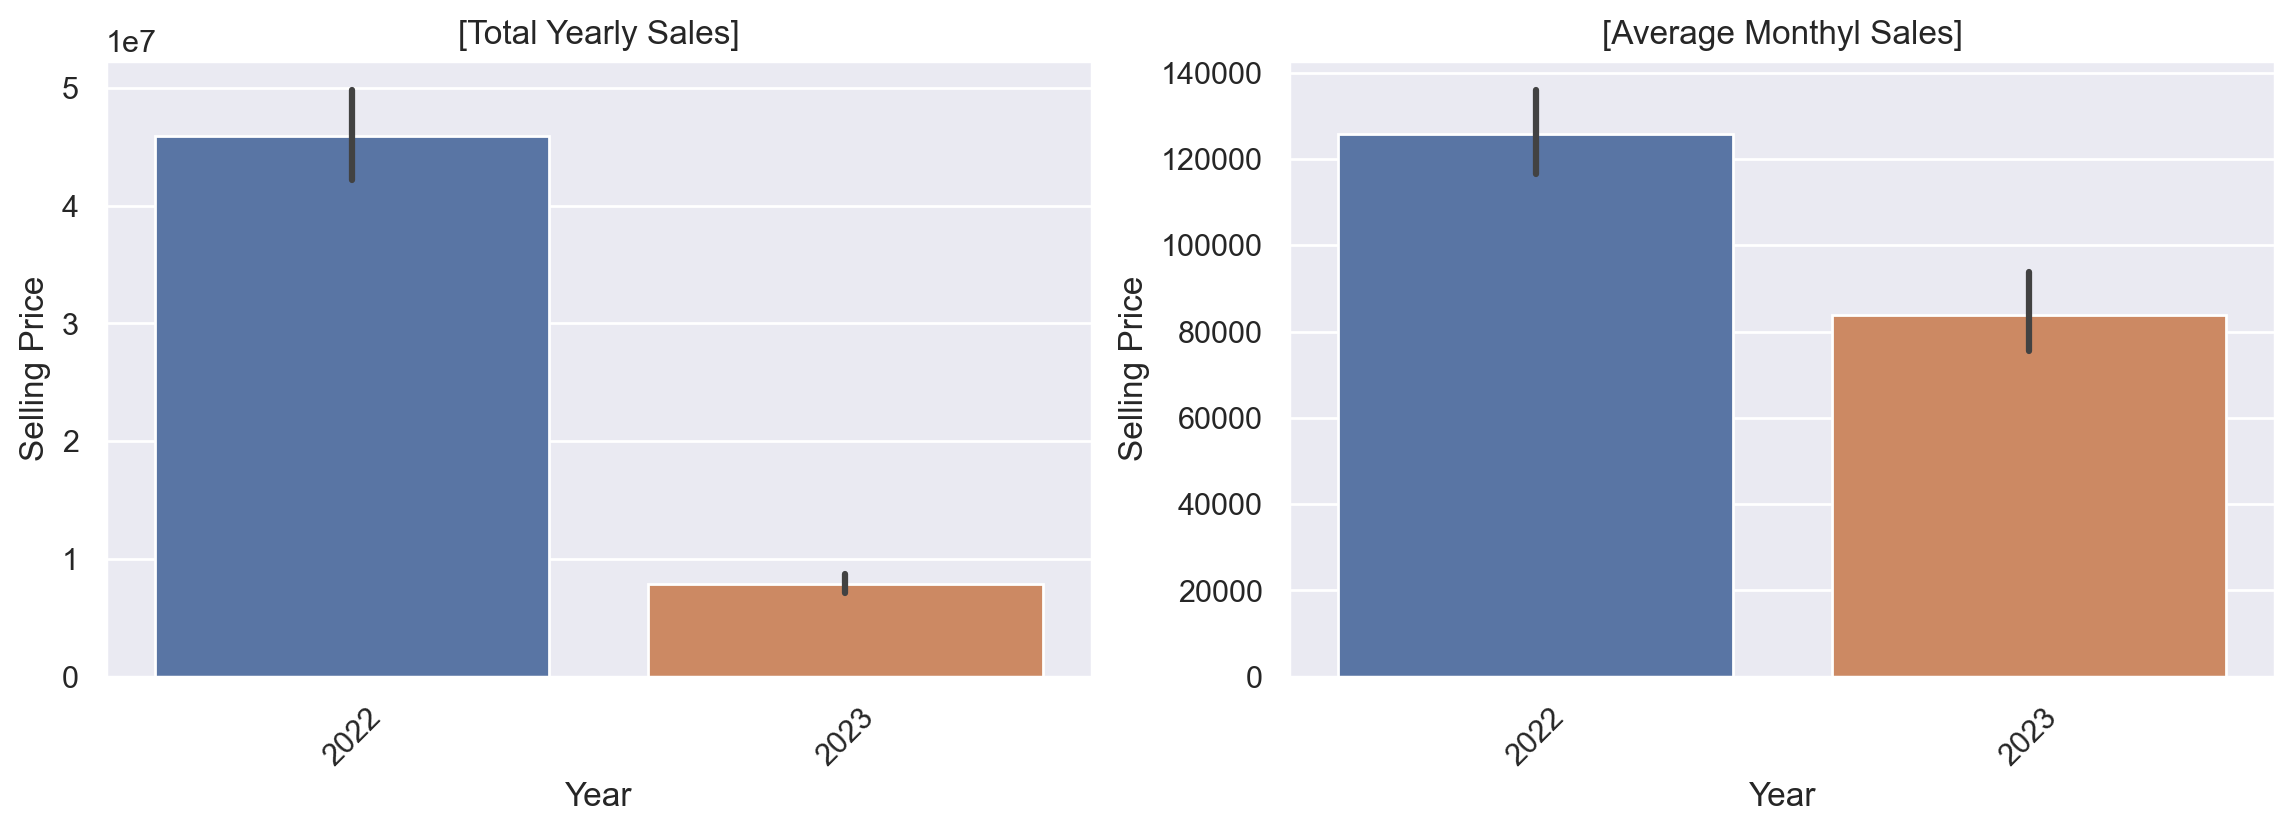

In [72]:
# 연도별 분포
f, ax = plt.subplots(1, 2, figsize = (14, 4))

sns.barplot(data = df_sales_yearly_sum, ax = ax[0])
ax[0].set_title('[Total Yearly Sales]')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Selling Price')
ax[0].tick_params(axis = 'x', rotation = 45)

sns.barplot(data = df_sales_yearly_mean, ax = ax[1])
ax[1].set_title('[Average Monthyl Sales]')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Selling Price')
ax[1].tick_params(axis = 'x', rotation = 45)

- 2023년 데이터에 불균형

#### 월별 데이터 확인

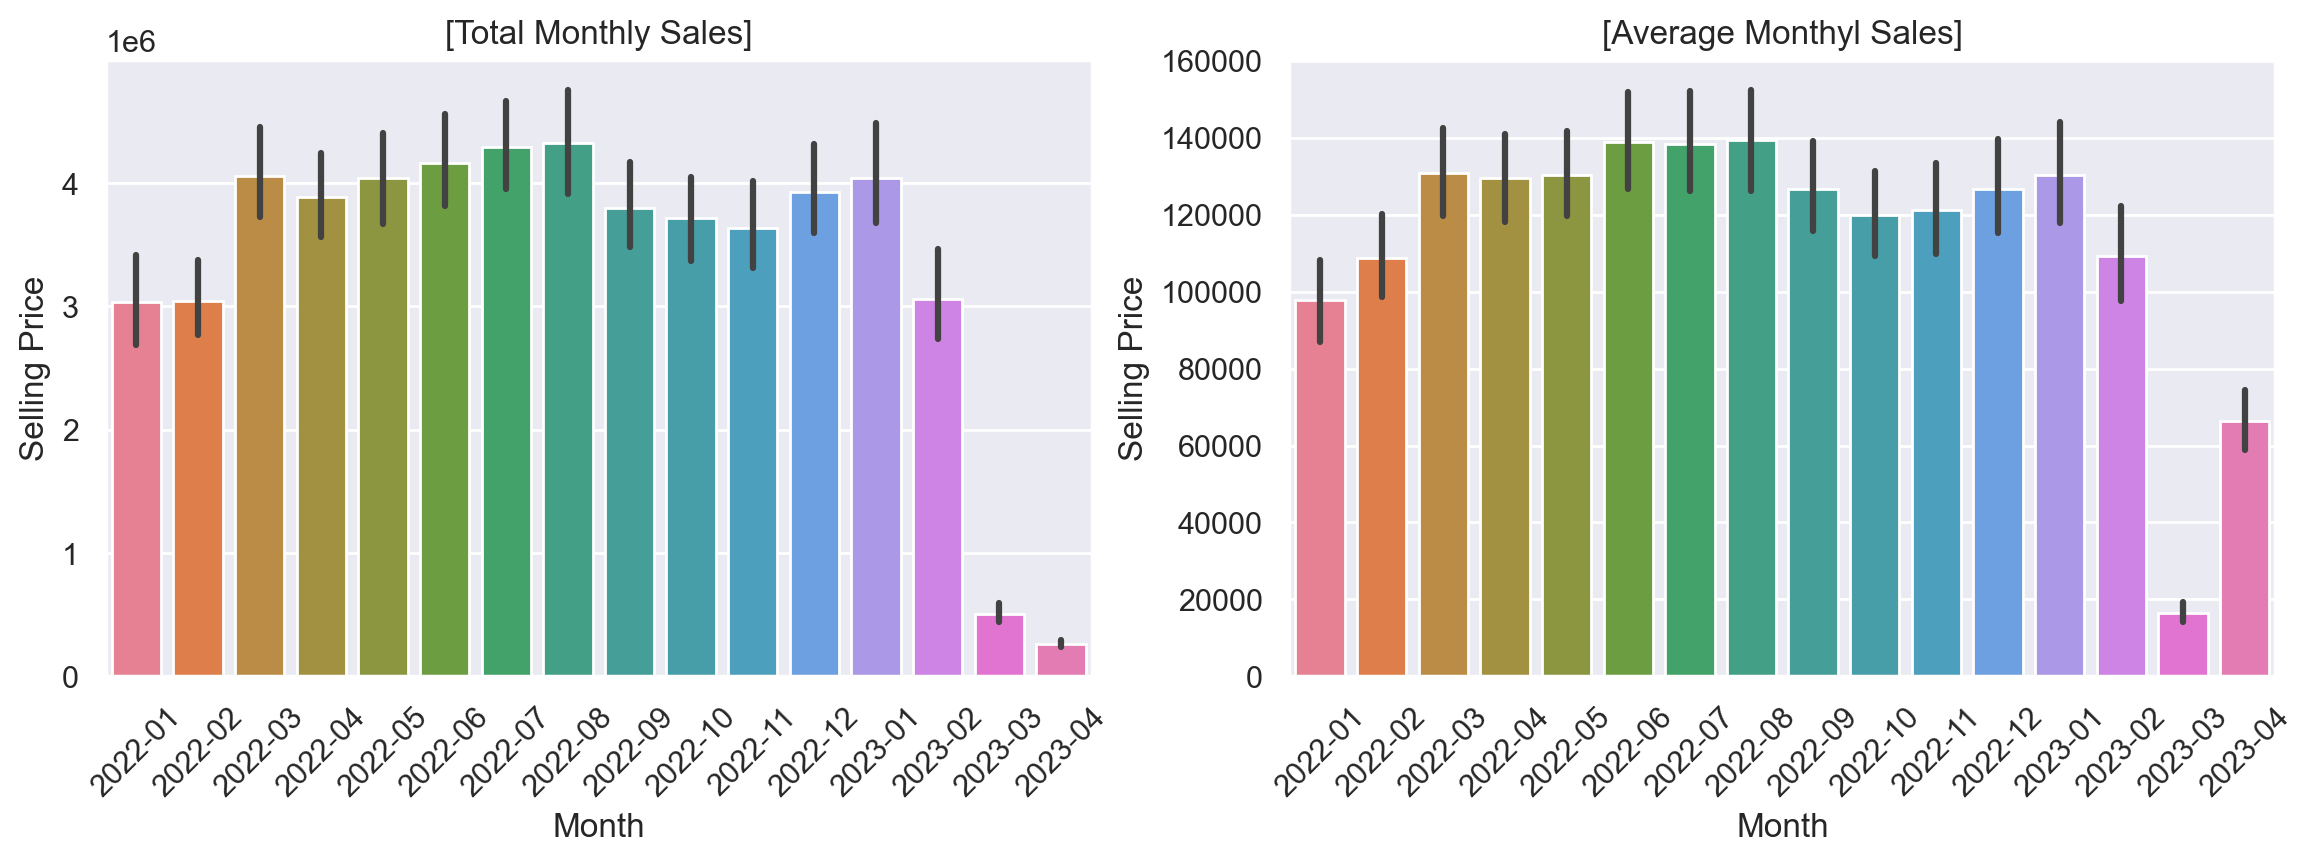

In [73]:
# 월별 분포
f, ax = plt.subplots(1, 2, figsize = (14, 4))

sns.barplot(data = df_sales_monthly_sum, ax = ax[0])
ax[0].set_title('[Total Monthly Sales]')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Selling Price')
ax[0].tick_params(axis = 'x', rotation = 45)

sns.barplot(data = df_sales_monthly_mean, ax = ax[1])
ax[1].set_title('[Average Monthyl Sales]')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Selling Price')
ax[1].tick_params(axis = 'x', rotation = 45)

- 2023년 4월 데이터에 불균형

#### 계절별 데이터 확인

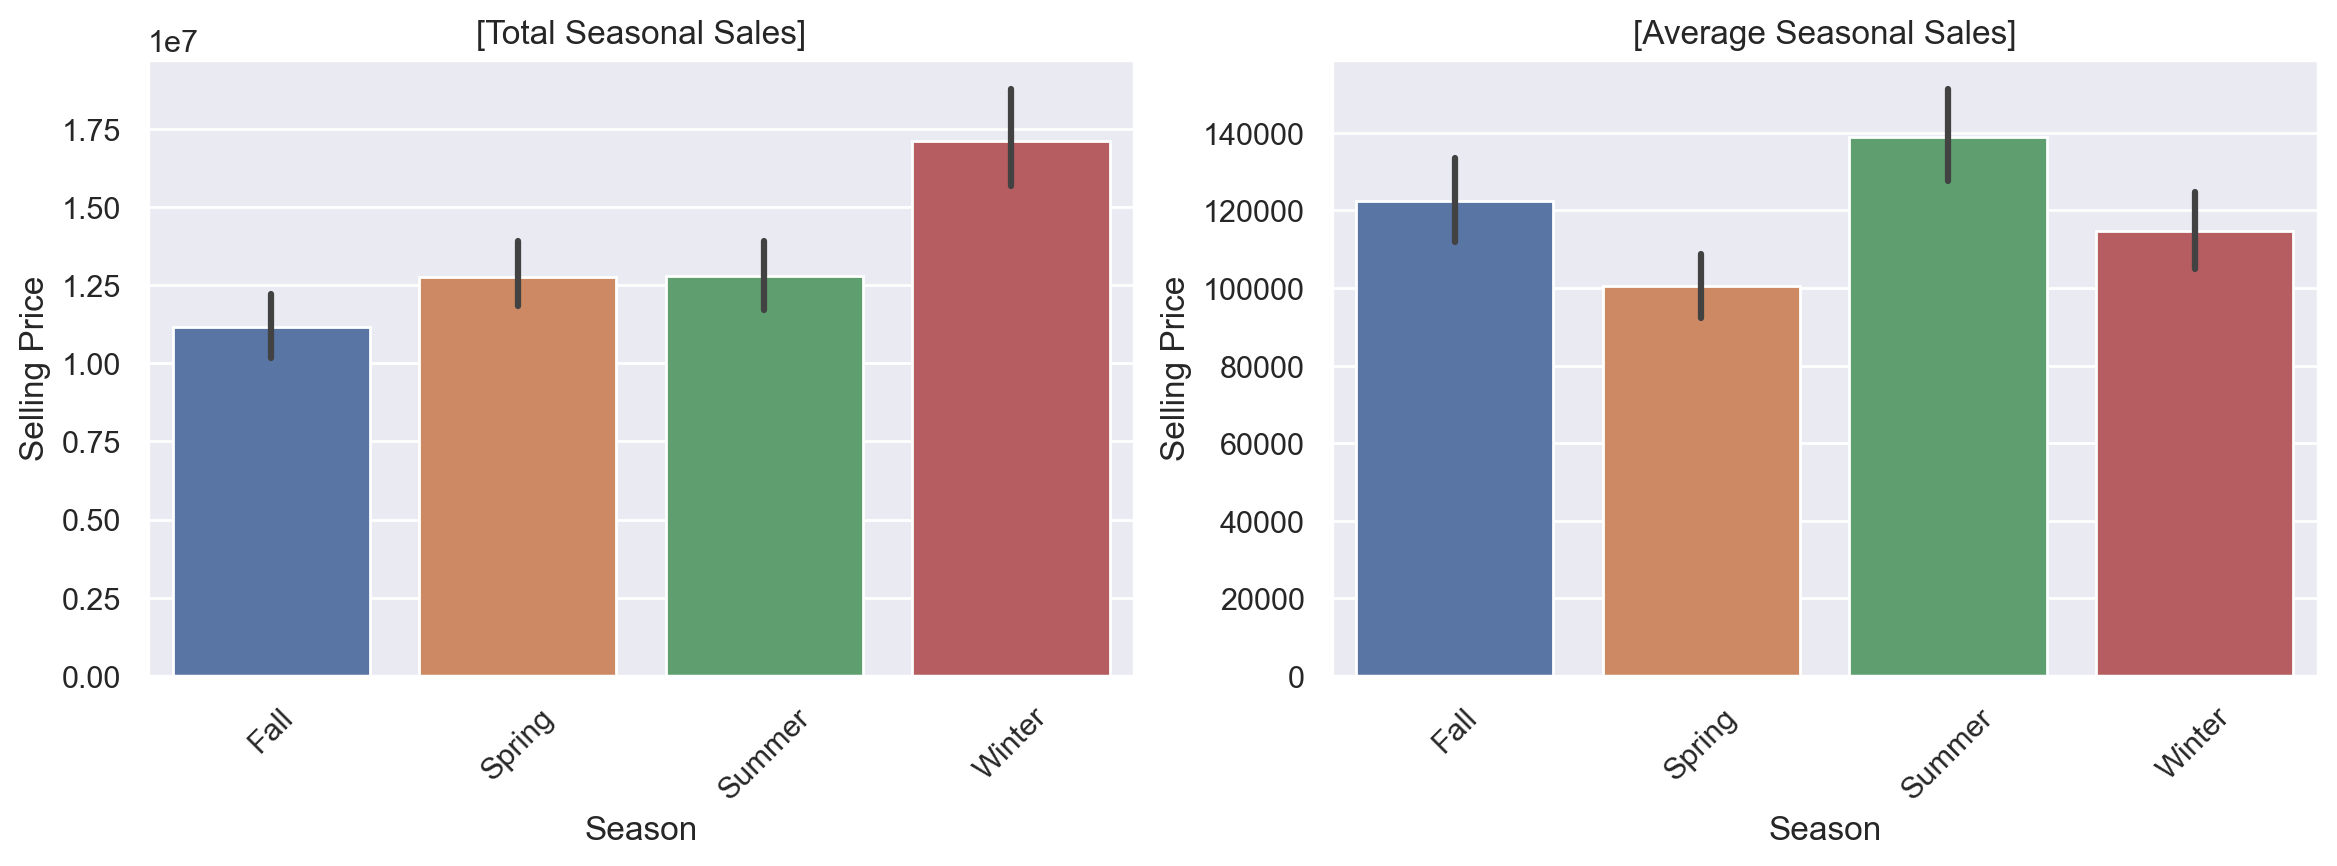

In [74]:
# 계절별 분포
f, ax = plt.subplots(1, 2, figsize = (14, 4))

sns.barplot(data = df_sales_seasonal_sum, ax = ax[0])
ax[0].set_title('[Total Seasonal Sales]')
ax[0].set_xlabel('Season')
ax[0].set_ylabel('Selling Price')
ax[0].tick_params(axis = 'x', rotation = 45)

sns.barplot(data = df_sales_seasonal_mean, ax = ax[1])
ax[1].set_title('[Average Seasonal Sales]')
ax[1].set_xlabel('Season')
ax[1].set_ylabel('Selling Price')
ax[1].tick_params(axis = 'x', rotation = 45)

- 여름, 가을 데이터에 불균형

#### 요일별 데이터 확인

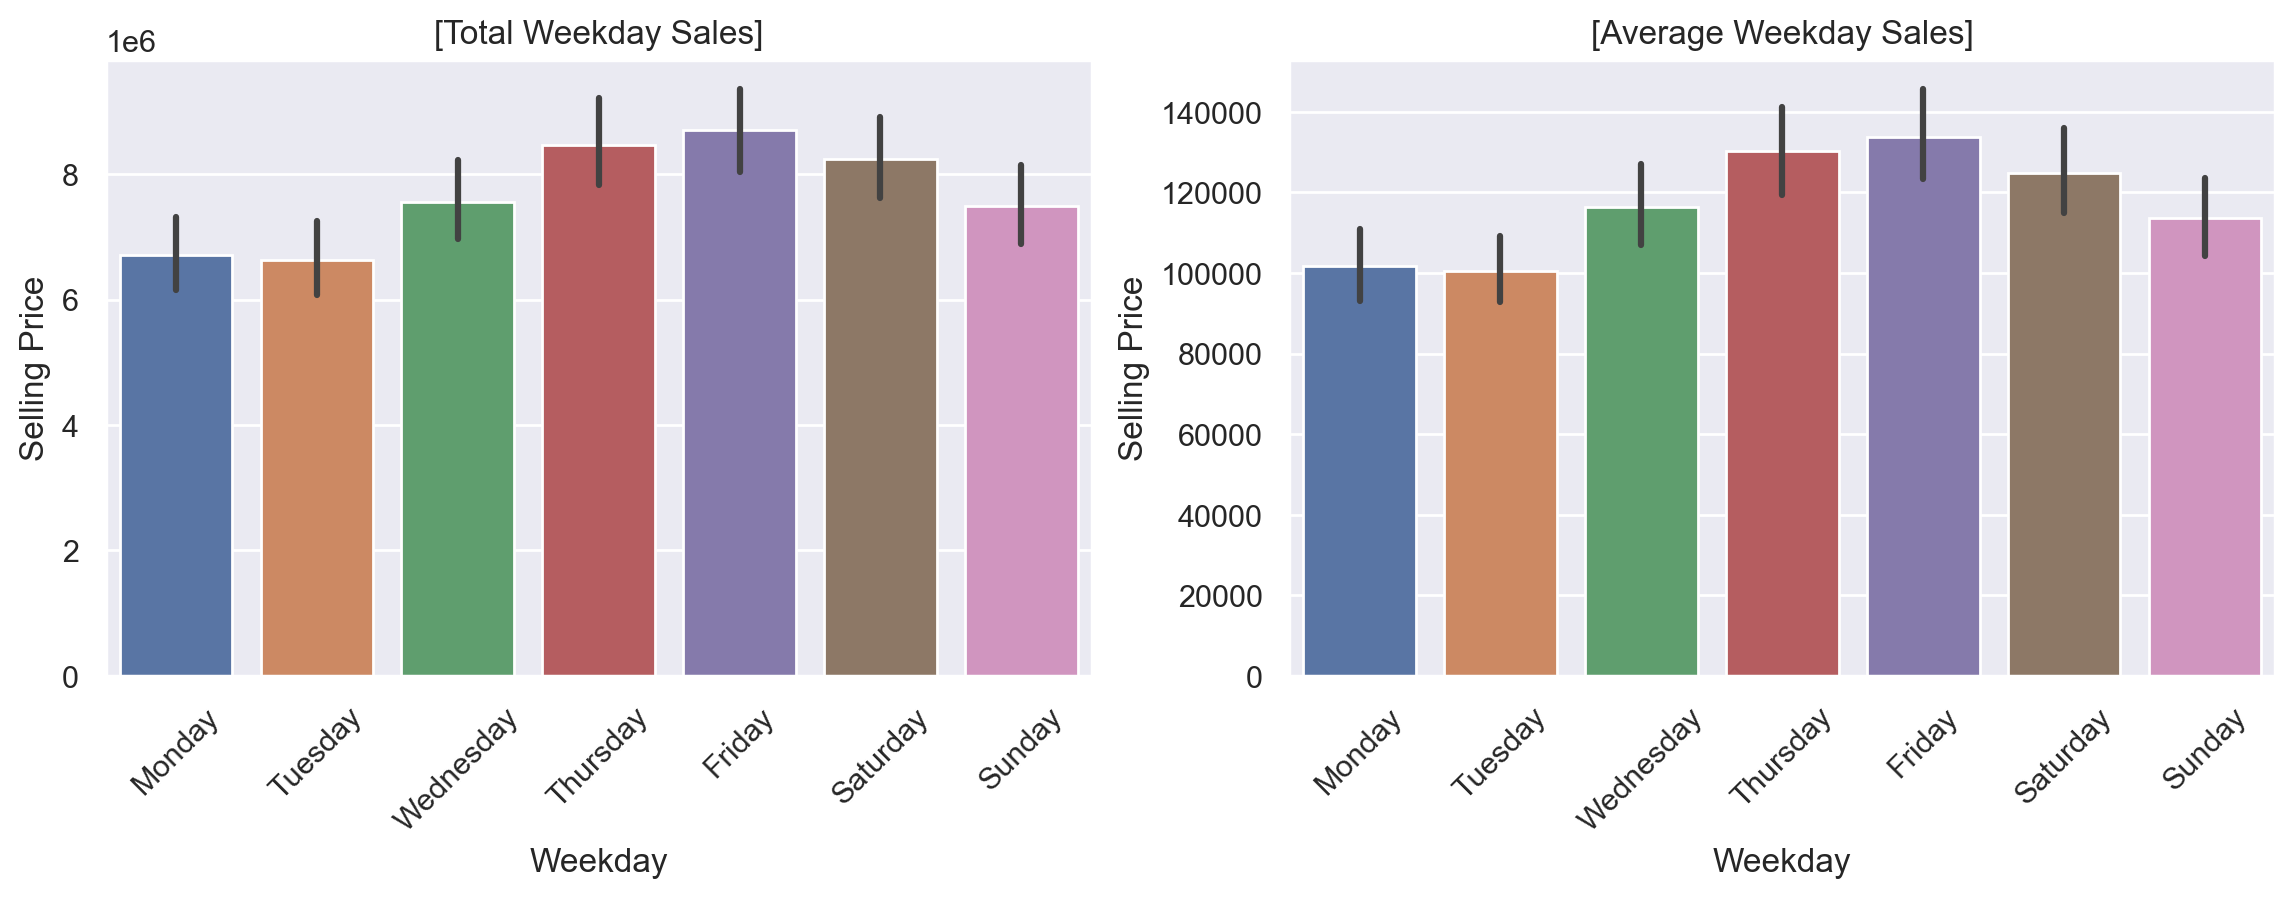

In [75]:
# 요일별 분포
f, ax = plt.subplots(1, 2, figsize = (14, 4))

sns.barplot(data = df_sales_weekday_sum, ax = ax[0])
ax[0].set_title('[Total Weekday Sales]')
ax[0].set_xlabel('Weekday')
ax[0].set_ylabel('Selling Price')
ax[0].tick_params(axis = 'x', rotation = 45)

sns.barplot(data = df_sales_weekday_mean, ax = ax[1])
ax[1].set_title('[Average Weekday Sales]')
ax[1].set_xlabel('Weekday')
ax[1].set_ylabel('Selling Price')
ax[1].tick_params(axis = 'x', rotation = 45)

#### 연도별 데이터 vs. 월별 데이터

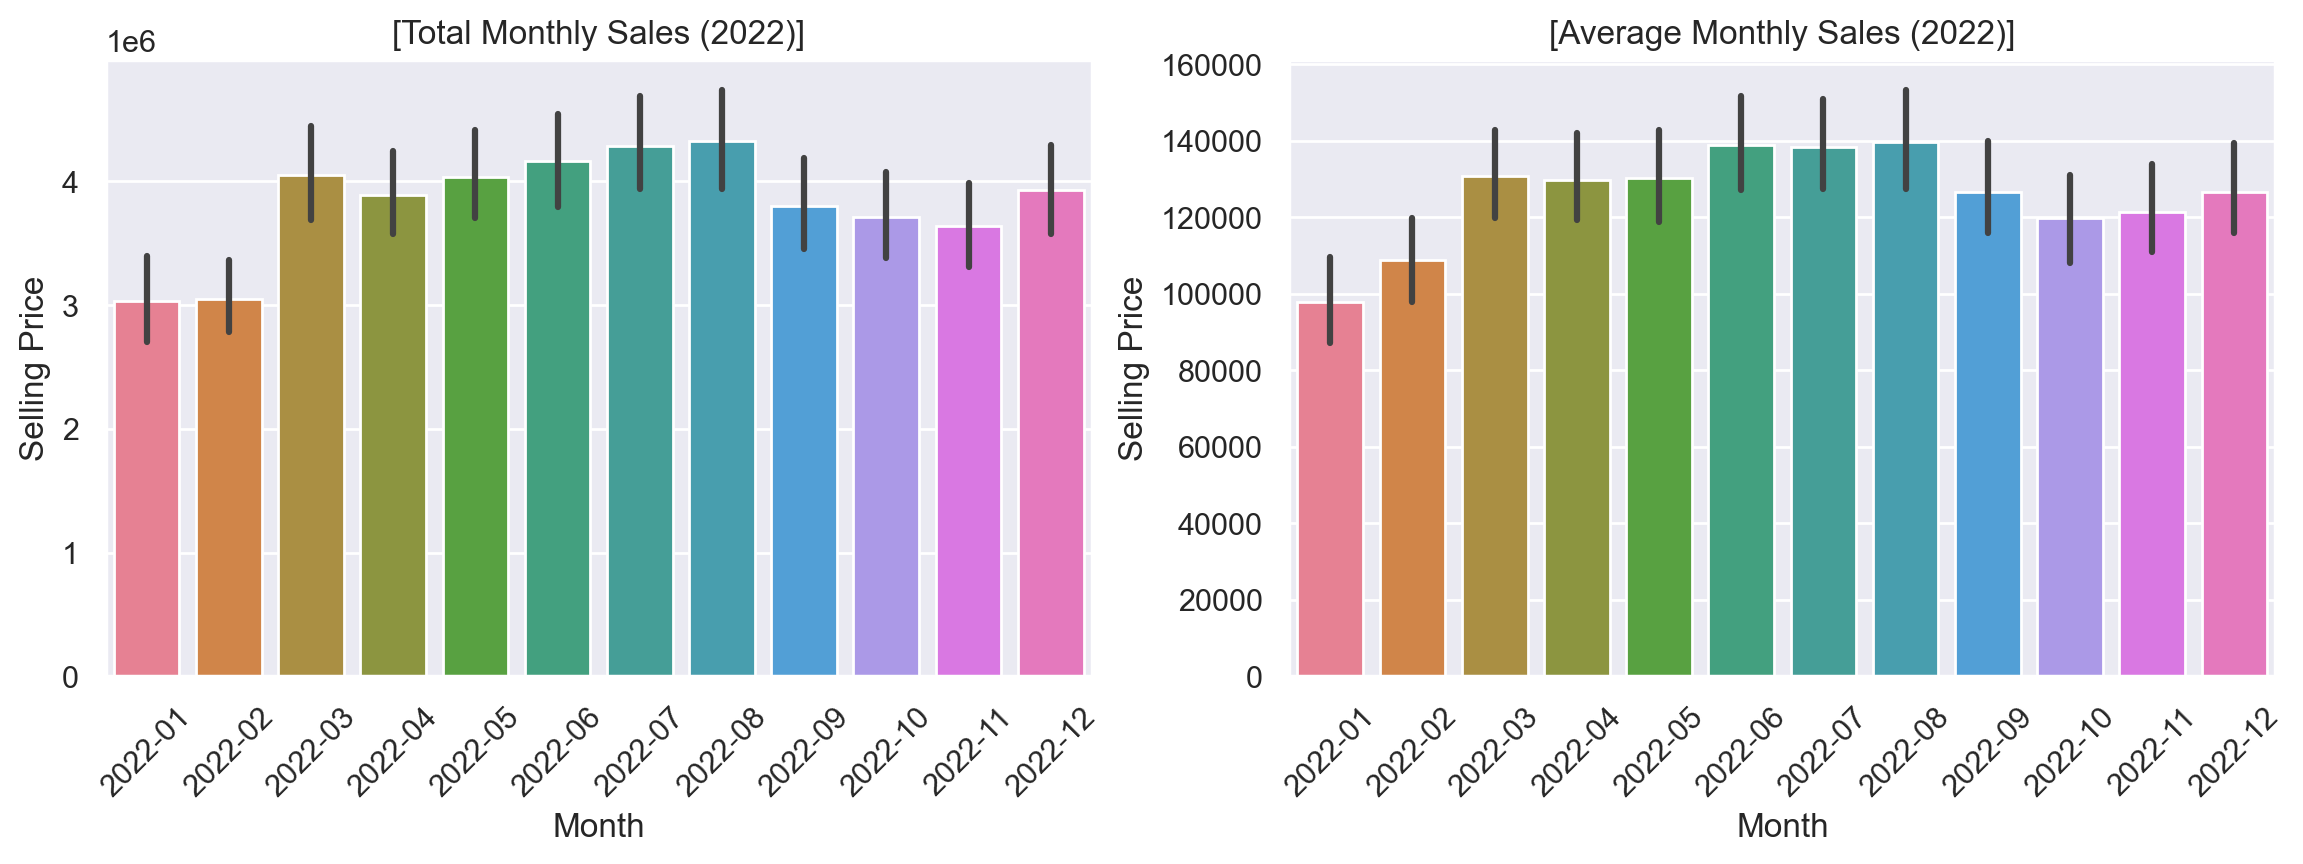

In [76]:
# 연도별(2022) vs. 월별
df_sales_2022 = df_sales.loc[:, '2022-01-01':'2022-12-31']
monthly_data_2022_sum = df_sales_2022.resample('M', axis = 1).sum().rename(columns=lambda x: x.strftime('%Y-%m'))
monthly_data_2022_mean = df_sales_2022.resample('M', axis = 1).mean().rename(columns=lambda x: x.strftime('%Y-%m'))

f, ax = plt.subplots(1, 2, figsize = (14, 4))

sns.barplot(data = monthly_data_2022_sum, ax = ax[0])
ax[0].set_title('[Total Monthly Sales (2022)]')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Selling Price')
ax[0].tick_params(axis = 'x', rotation = 45)

sns.barplot(data = monthly_data_2022_mean, ax = ax[1])
ax[1].set_title('[Average Monthly Sales (2022)]')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Selling Price')
ax[1].tick_params(axis = 'x', rotation = 45)

- 2022년의 데이터를 살펴보면, 상대적으로 3~8월의 판매량이 상대적으로 높다.  

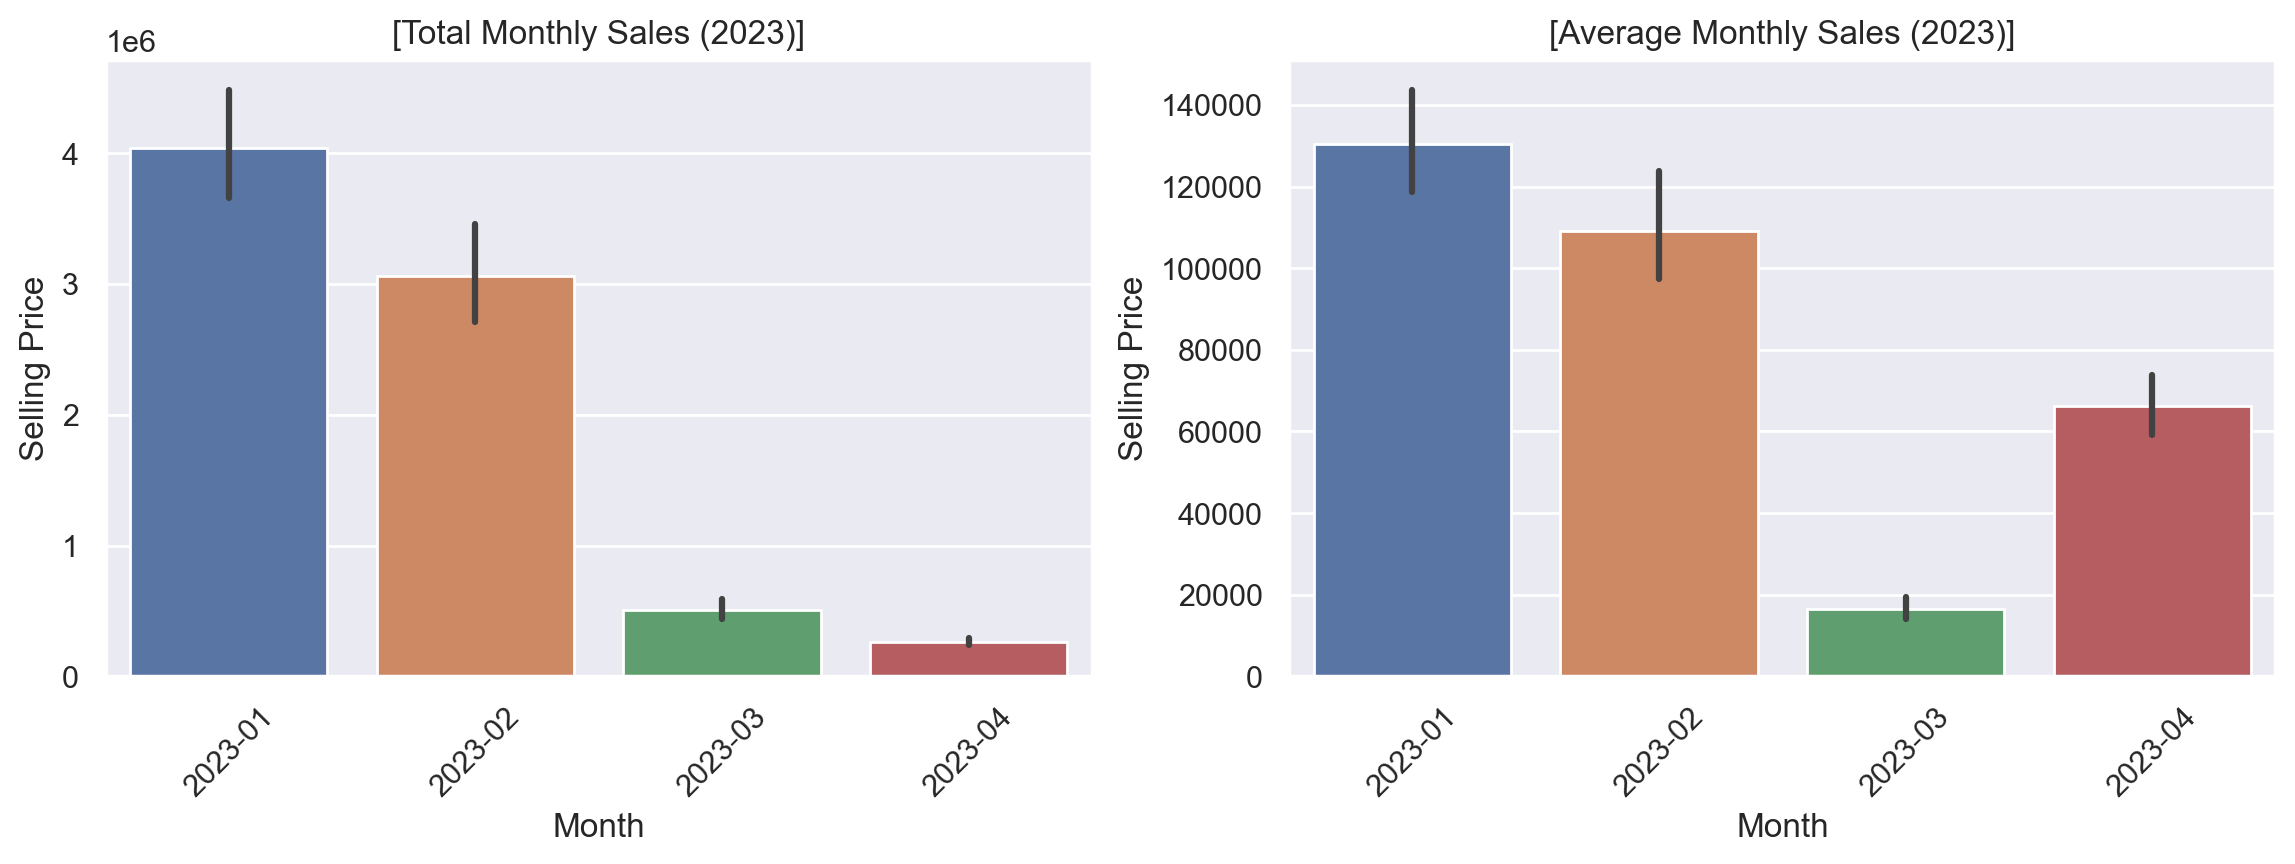

In [77]:
# 연도별(2023) vs. 월별

df_sales_2023 = df_sales.loc[:, '2023-01-01':]
monthly_data_2023_sum = df_sales_2023.resample('M', axis = 1).sum().rename(columns=lambda x: x.strftime('%Y-%m'))
monthly_data_2023_mean = df_sales_2023.resample('M', axis = 1).mean().rename(columns=lambda x: x.strftime('%Y-%m'))

f, ax = plt.subplots(1, 2, figsize = (14, 4))

sns.barplot(data = monthly_data_2023_sum, ax = ax[0])
ax[0].set_title('[Total Monthly Sales (2023)]')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Selling Price')
ax[0].tick_params(axis = 'x', rotation = 45)

sns.barplot(data = monthly_data_2023_mean, ax = ax[1])
ax[1].set_title('[Average Monthly Sales (2023)]')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Selling Price')
ax[1].tick_params(axis = 'x', rotation = 45)

- 2023년의 데이터를 살펴보면, 상대적으로 1~2월의 판매량이 높다.  

#### 연도별 데이터 vs. 계절별 데이터

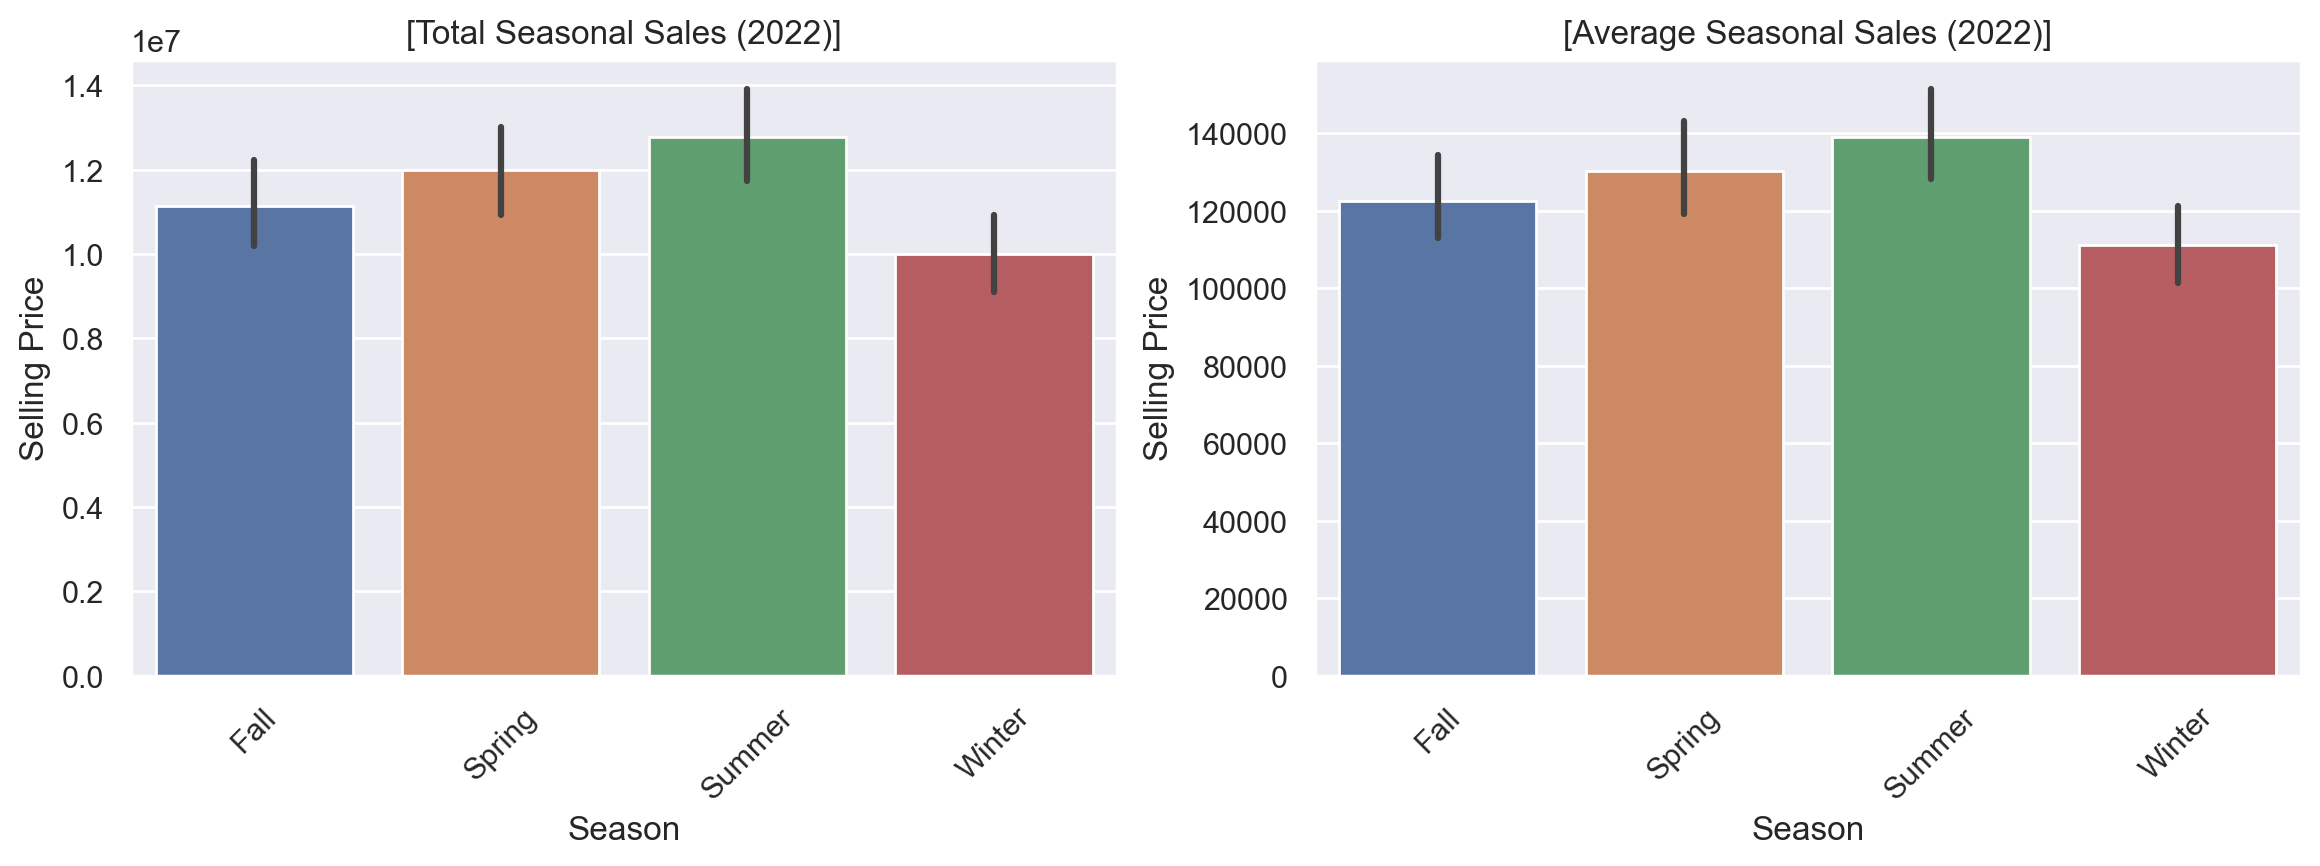

In [78]:
# 연도별(2022) vs. 계절별
df_sales_2022_seasons = df_sales_2022.copy()
df_sales_2022_seasons.columns = pd.to_datetime(df_sales_2022_seasons.columns)

df_sales_2022_seasons = df_sales_2022_seasons.rename(columns=lambda x: season(x.month))
seasonal_data_2022_sum = df_sales_2022_seasons.groupby(df_sales_2022_seasons.columns, axis=1).sum()
seasonal_data_2022_mean = df_sales_2022_seasons.groupby(df_sales_2022_seasons.columns, axis=1).mean()

f, ax = plt.subplots(1, 2, figsize = (14, 4))

sns.barplot(data = seasonal_data_2022_sum, ax = ax[0])
ax[0].set_title('[Total Seasonal Sales (2022)]')
ax[0].set_xlabel('Season')
ax[0].set_ylabel('Selling Price')
ax[0].tick_params(axis = 'x', rotation = 45)

sns.barplot(data = seasonal_data_2022_mean, ax = ax[1])
ax[1].set_title('[Average Seasonal Sales (2022)]')
ax[1].set_xlabel('Season')
ax[1].set_ylabel('Selling Price')
ax[1].tick_params(axis = 'x', rotation = 45)

- 2022년의 데이터를 살펴보면, 봄(3 ~5월), 여름(6 ~8월)의 판매량이 가장 높다.  
    = 월별 판매량 분석과 일치(3 ~8월의 판매량이 상대적으로 높다.)
- 가을 판매량이 겨울 판매량보다 높다.
- 겨울은 연말 연시, 크리스마스를 포함함에도 2022년에는 가을보다 판매량이 더 적다 (연초 비용지출이 적음).

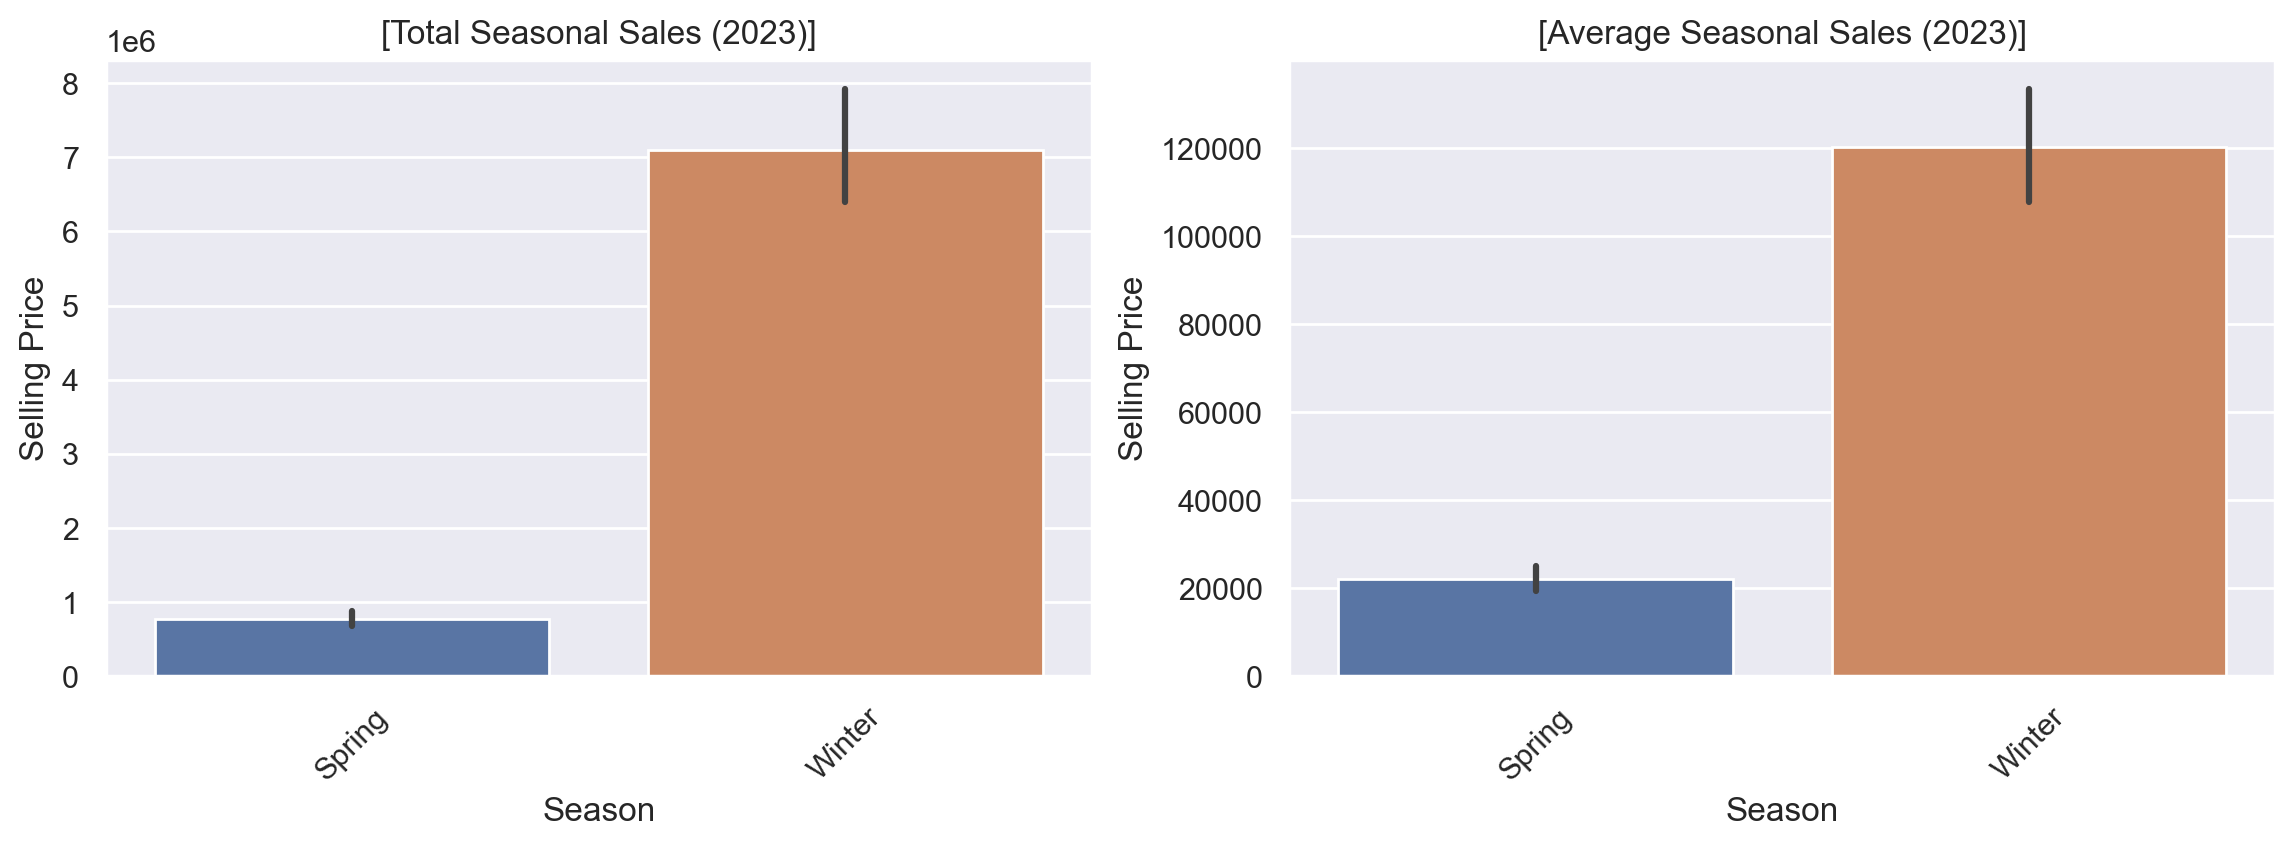

In [79]:
# 연도별(2023) vs. 계절별

df_sales_2023_seasons = df_sales_2023.copy()
df_sales_2023_seasons.columns = pd.to_datetime(df_sales_2023_seasons.columns)

df_sales_2023_seasons = df_sales_2023_seasons.rename(columns=lambda x: season(x.month))
seasonal_data_2023_sum = df_sales_2023_seasons.groupby(df_sales_2023_seasons.columns, axis=1).sum()
seasonal_data_2023_mean = df_sales_2023_seasons.groupby(df_sales_2023_seasons.columns, axis=1).mean()

f, ax = plt.subplots(1, 2, figsize = (14, 4))

sns.barplot(data = seasonal_data_2023_sum, ax = ax[0])
ax[0].set_title('[Total Seasonal Sales (2023)]')
ax[0].set_xlabel('Season')
ax[0].set_ylabel('Selling Price')
ax[0].tick_params(axis = 'x', rotation = 45)

sns.barplot(data = seasonal_data_2023_mean, ax = ax[1])
ax[1].set_title('[Average Seasonal Sales (2023)]')
ax[1].set_xlabel('Season')
ax[1].set_ylabel('Selling Price')
ax[1].tick_params(axis = 'x', rotation = 45)

- 2023년에는 1, 2, 3월의 판매량밖에 없으며 1, 2월의 판매량이 압도적으로 많으므로 겨울의 판매량이 더 높다.

#### 연도별 데이터 vs. 요일별 데이터

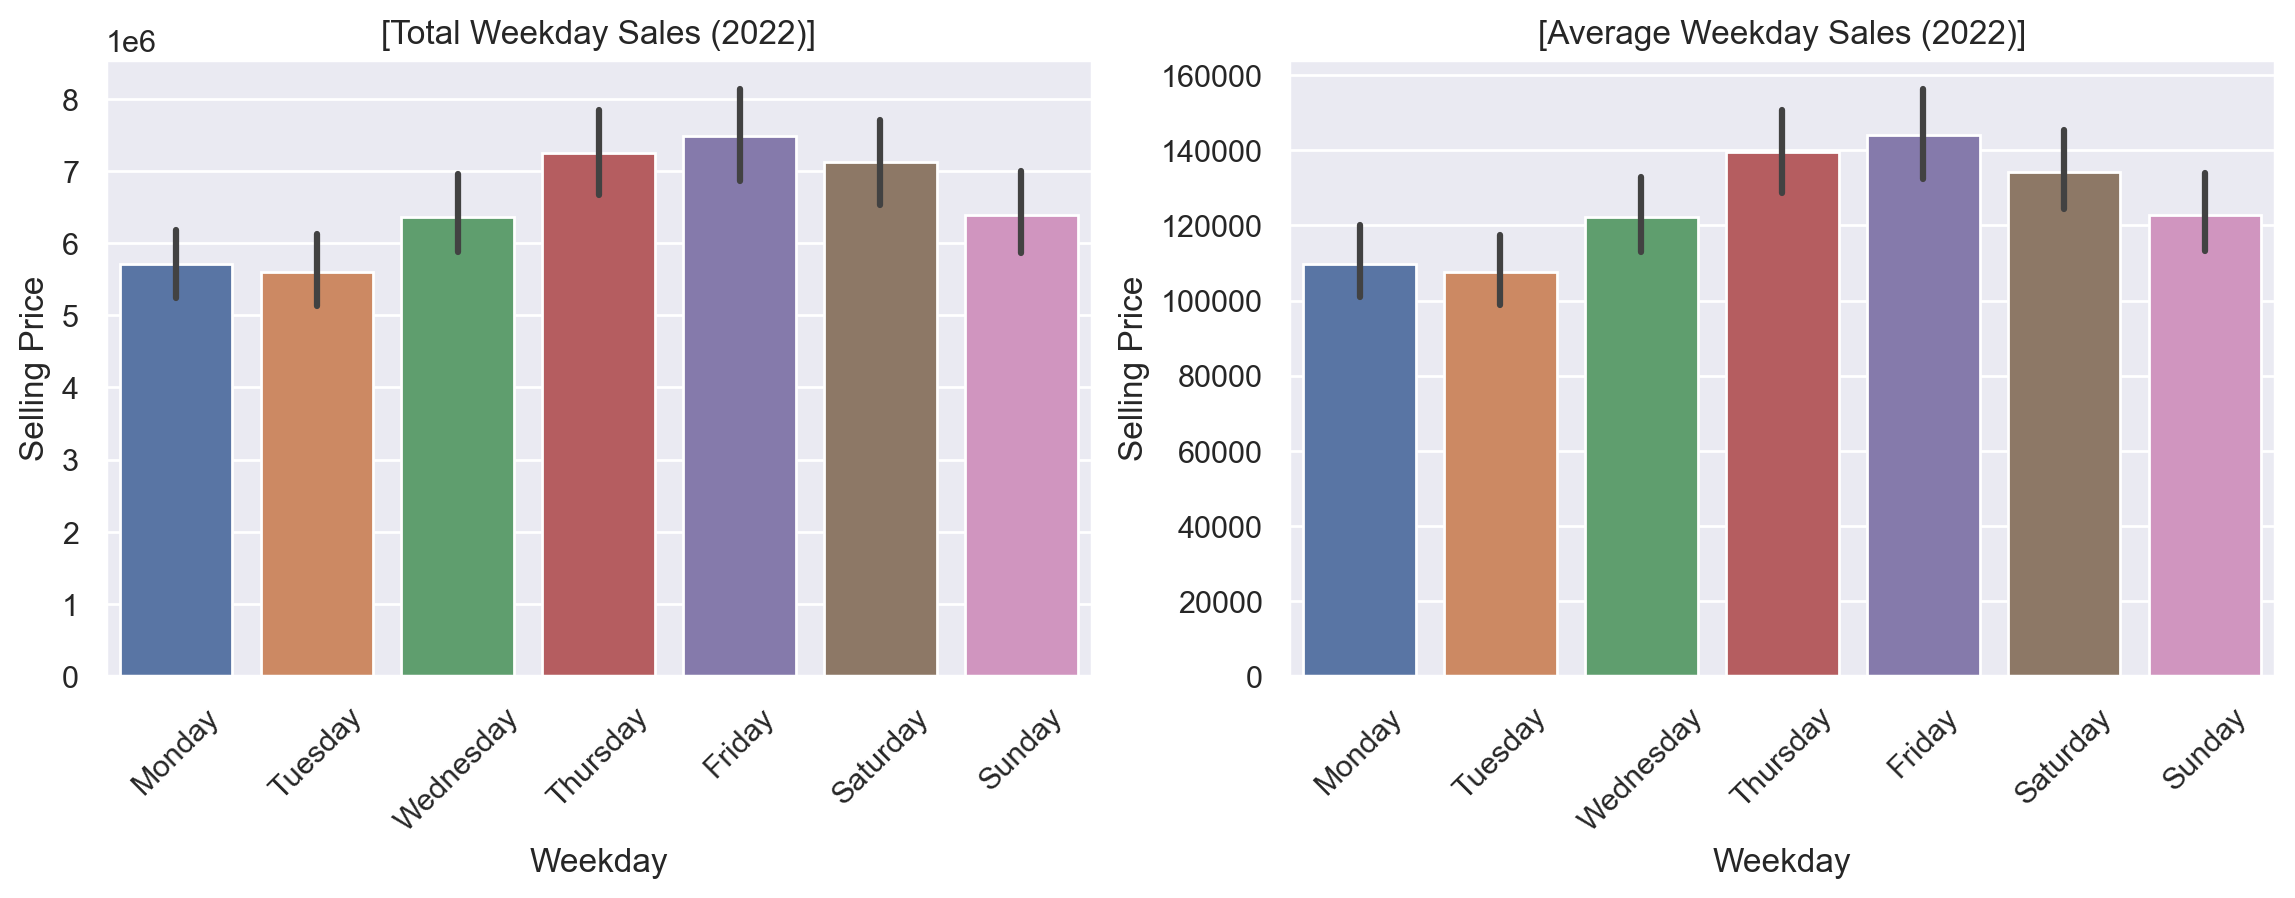

In [80]:
# 연도별(2022) vs. 요일별
df_sales_2022_weekdays = df_sales_2022.copy()
df_sales_2022_weekdays.columns = pd.to_datetime(df_sales_2022_weekdays.columns)

df_sales_2022_weekdays = df_sales_2022_weekdays.rename(columns=lambda x: x.weekday())
weekday_data_2022_sum = df_sales_2022_weekdays.groupby(df_sales_2022_weekdays.columns, axis=1).sum()
weekday_data_2022_mean = df_sales_2022_weekdays.groupby(df_sales_2022_weekdays.columns, axis=1).mean()

weekday_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
weekday_data_2022_sum.rename(columns=weekday_names, inplace=True)
weekday_data_2022_mean.rename(columns=weekday_names, inplace=True)

f, ax = plt.subplots(1, 2, figsize = (14, 4))

sns.barplot(data = weekday_data_2022_sum, ax = ax[0])
ax[0].set_title('[Total Weekday Sales (2022)]')
ax[0].set_xlabel('Weekday')
ax[0].set_ylabel('Selling Price')
ax[0].tick_params(axis = 'x', rotation = 45)

sns.barplot(data = weekday_data_2022_mean, ax = ax[1])
ax[1].set_title('[Average Weekday Sales (2022)]')
ax[1].set_xlabel('Weekday')
ax[1].set_ylabel('Selling Price')
ax[1].tick_params(axis = 'x', rotation = 45)

- 목 ~토의 판매량이 가장 많고, 월 ~화의 판매량이 가장 적다.  
    = 일반적으로 목 ~토에 온라인 구매를 이용함.

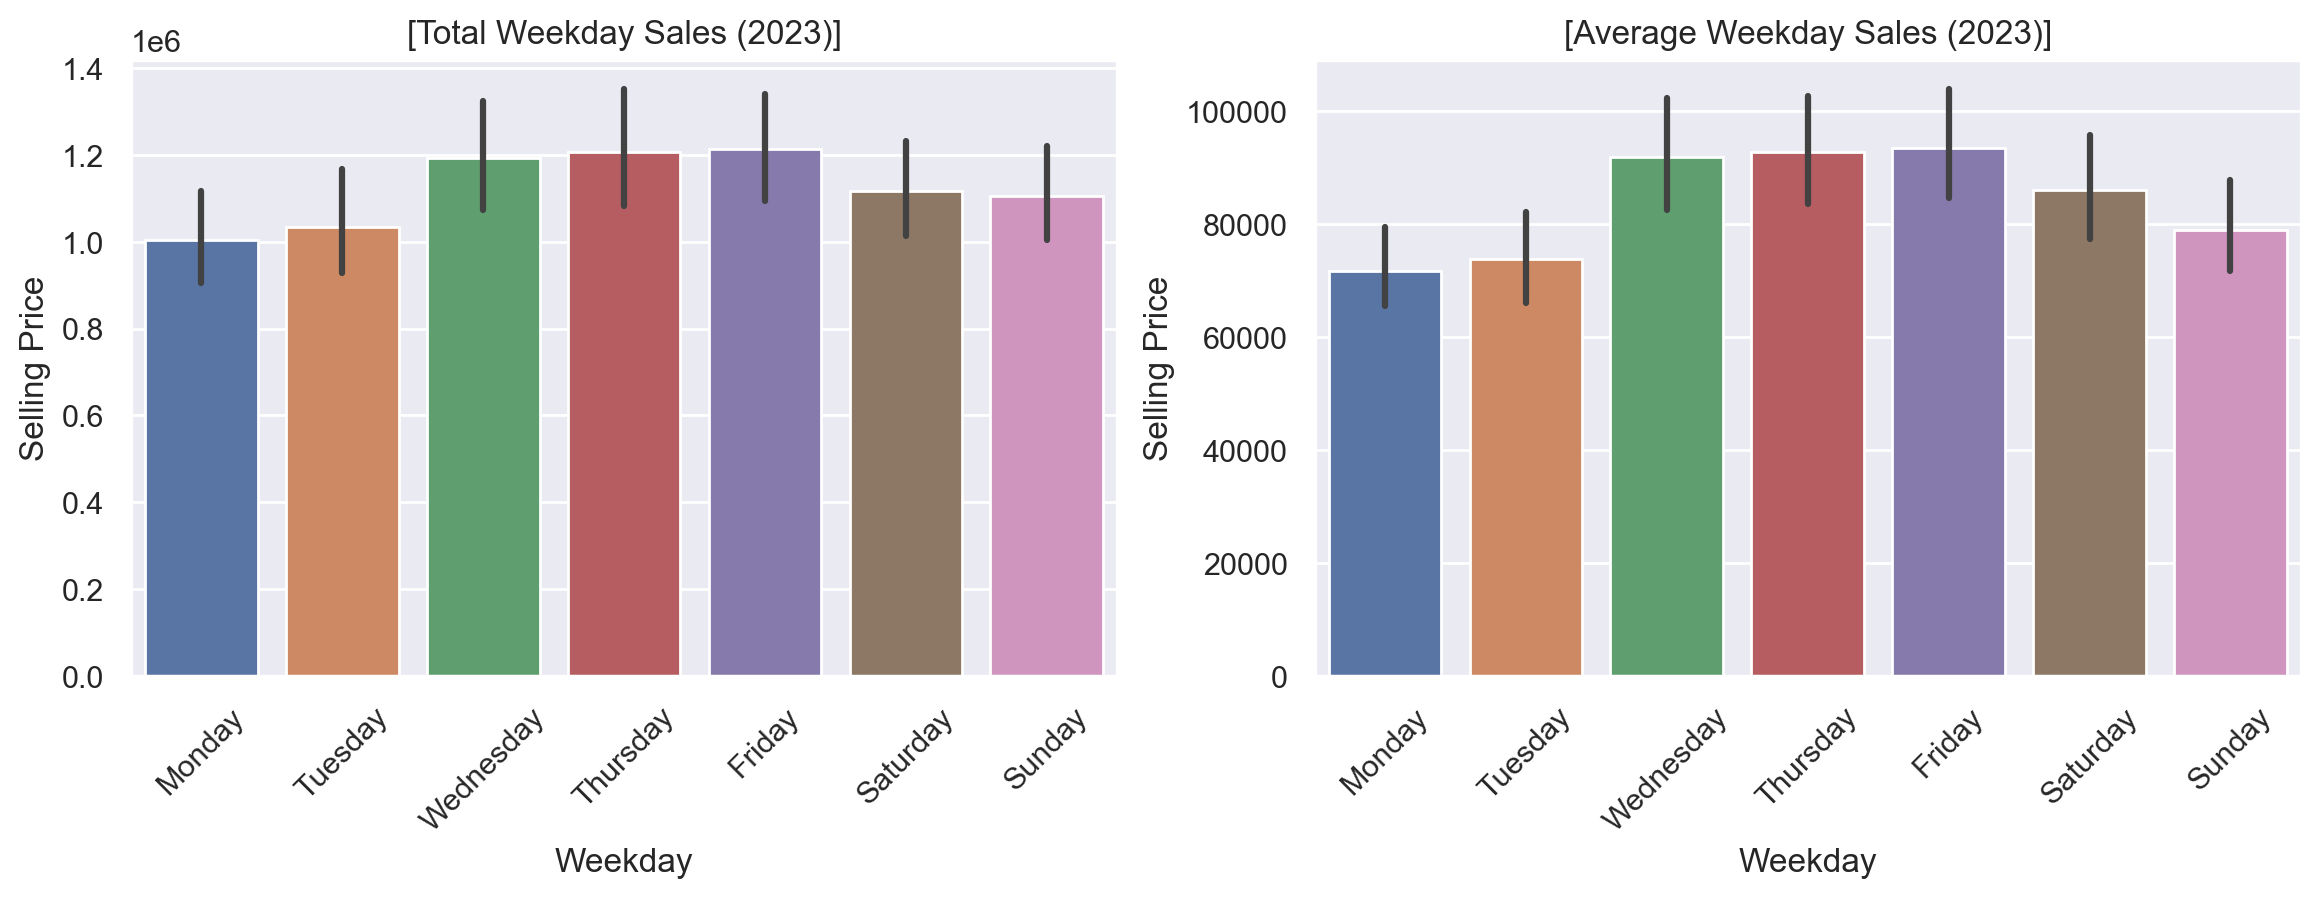

In [81]:
# 연도별(2023) vs. 요일별
df_sales_2023_weekdays = df_sales_2023.copy()
df_sales_2023_weekdays.columns = pd.to_datetime(df_sales_2023_weekdays.columns)

df_sales_2023_weekdays = df_sales_2023_weekdays.rename(columns=lambda x: x.weekday())
weekday_data_2023_sum = df_sales_2023_weekdays.groupby(df_sales_2023_weekdays.columns, axis=1).sum()
weekday_data_2023_mean = df_sales_2023_weekdays.groupby(df_sales_2023_weekdays.columns, axis=1).mean()

weekday_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
weekday_data_2023_sum.rename(columns=weekday_names, inplace=True)
weekday_data_2023_mean.rename(columns=weekday_names, inplace=True)

f, ax = plt.subplots(1, 2, figsize = (14, 4))

sns.barplot(data = weekday_data_2023_sum, ax = ax[0])
ax[0].set_title('[Total Weekday Sales (2023)]')
ax[0].set_xlabel('Weekday')
ax[0].set_ylabel('Selling Price')
ax[0].tick_params(axis = 'x', rotation = 45)

sns.barplot(data = weekday_data_2023_mean, ax = ax[1])
ax[1].set_title('[Average Weekday Sales (2023)]')
ax[1].set_xlabel('Weekday')
ax[1].set_ylabel('Selling Price')
ax[1].tick_params(axis = 'x', rotation = 45)

- 2023년에는 수~금에 판매량이 가장 많았다.
- 2022년과 동일하게 월~화의 판매량이 가장 적다.

#### __sales(numerical data) 분석 요약__
__[2022]__
- 봄, 여름(3월 ~8월)에 판매량이 높으며 가을 판매량 겨울 판매량보다 크다.
- 가을에는 9월, 겨울에는 12월의 판매량이 가장 높다.
- 목 ~토에 가장 판매량이 많고, 월 ~화의 판매량이 가장 적다.

__[2023]__
- 겨울(1 ~2월)의 판매량이 높으며 3월에는 판매량이 급감하는데 이는 코로나 팬데믹 종식 선언과 관련된 것일 수 있다.
- 수 ~금에 가장 판매량이 많고, 월 ~화의 판매량이 가장 적다.

### brand

In [82]:
# 연도별 데이터 확인
df_brand.columns = pd.to_datetime(df_brand.columns)
df_brand_yearly_sum = df_brand.resample('Y', axis = 1).sum().rename(columns=lambda x: x.strftime('%Y'))
df_brand_yearly_mean = df_brand.resample('Y', axis = 1).mean().rename(columns=lambda x: x.strftime('%Y'))

# 월별 데이터 확인
df_brand_monthly_sum = df_brand.resample('M', axis = 1).sum().rename(columns=lambda x: x.strftime('%Y-%m'))
df_brand_monthly_mean = df_brand.resample('M', axis = 1).mean().rename(columns=lambda x: x.strftime('%Y-%m'))

# 계절별 데이터 확인
df_brand_seasons = df_brand.copy()
df_brand_seasons.columns = pd.to_datetime(df_brand_seasons.columns)

df_brand_seasons = df_brand_seasons.rename(columns=lambda x: season(x.month))
df_brand_seasonal_sum = df_brand_seasons.groupby(df_brand_seasons.columns, axis=1).sum()
df_brand_seasonal_mean = df_brand_seasons.groupby(df_brand_seasons.columns, axis=1).mean()

# 요일별 데이터 확인
df_brand_weekdays = df_brand.copy()
df_brand_weekdays.columns = df_brand_weekdays.columns.weekday

df_brand_weekday_sum = df_brand_weekdays.groupby(df_brand_weekdays.columns, axis=1).sum()
df_brand_weekday_mean = df_brand_weekdays.groupby(df_brand_weekdays.columns, axis=1).mean()

weekday_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_brand_weekday_sum.rename(columns=weekday_names, inplace=True)
df_brand_weekday_mean.rename(columns=weekday_names, inplace=True)

#### 연도별 데이터 확인

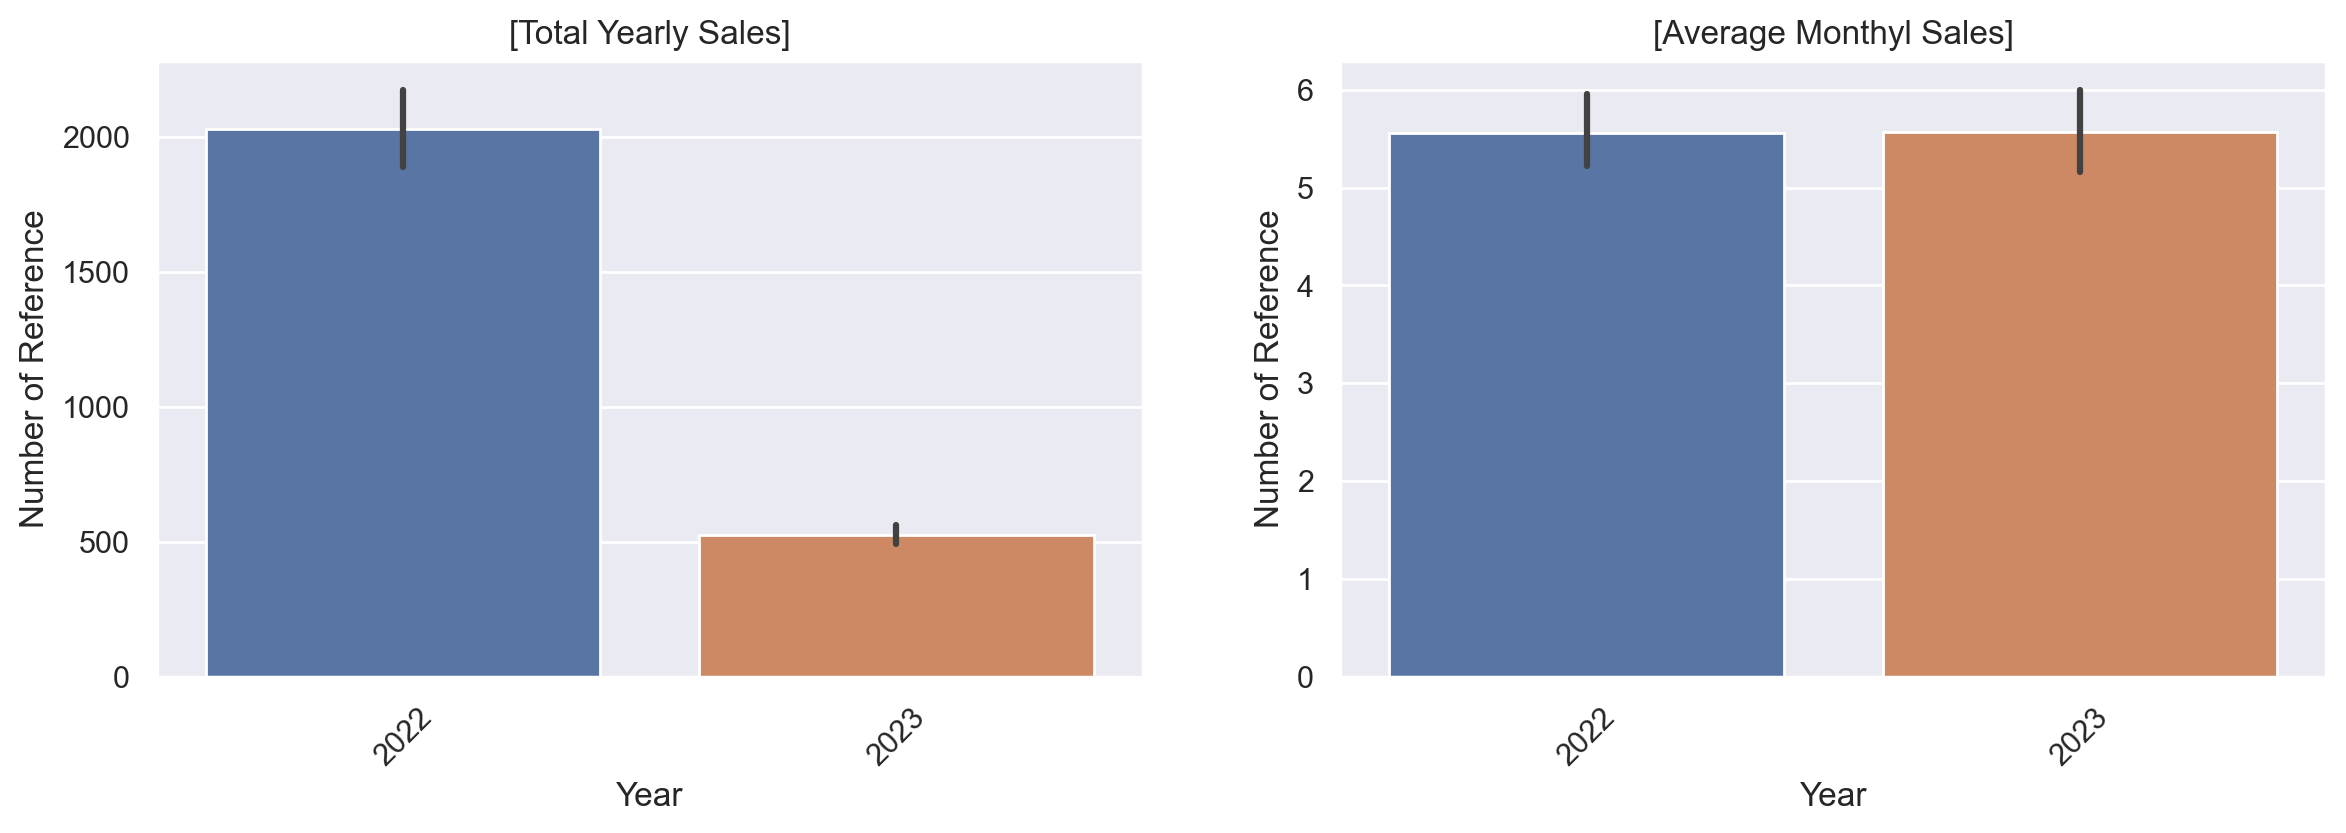

In [83]:
# 연도별 분포
f, ax = plt.subplots(1, 2, figsize = (14, 4))

sns.barplot(data = df_brand_yearly_sum, ax = ax[0])
ax[0].set_title('[Total Yearly Sales]')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Reference')
ax[0].tick_params(axis = 'x', rotation = 45)

sns.barplot(data = df_brand_yearly_mean, ax = ax[1])
ax[1].set_title('[Average Monthyl Sales]')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of Reference')
ax[1].tick_params(axis = 'x', rotation = 45)

- 2023년 데이터 불균형

#### 월별 데이터 확인

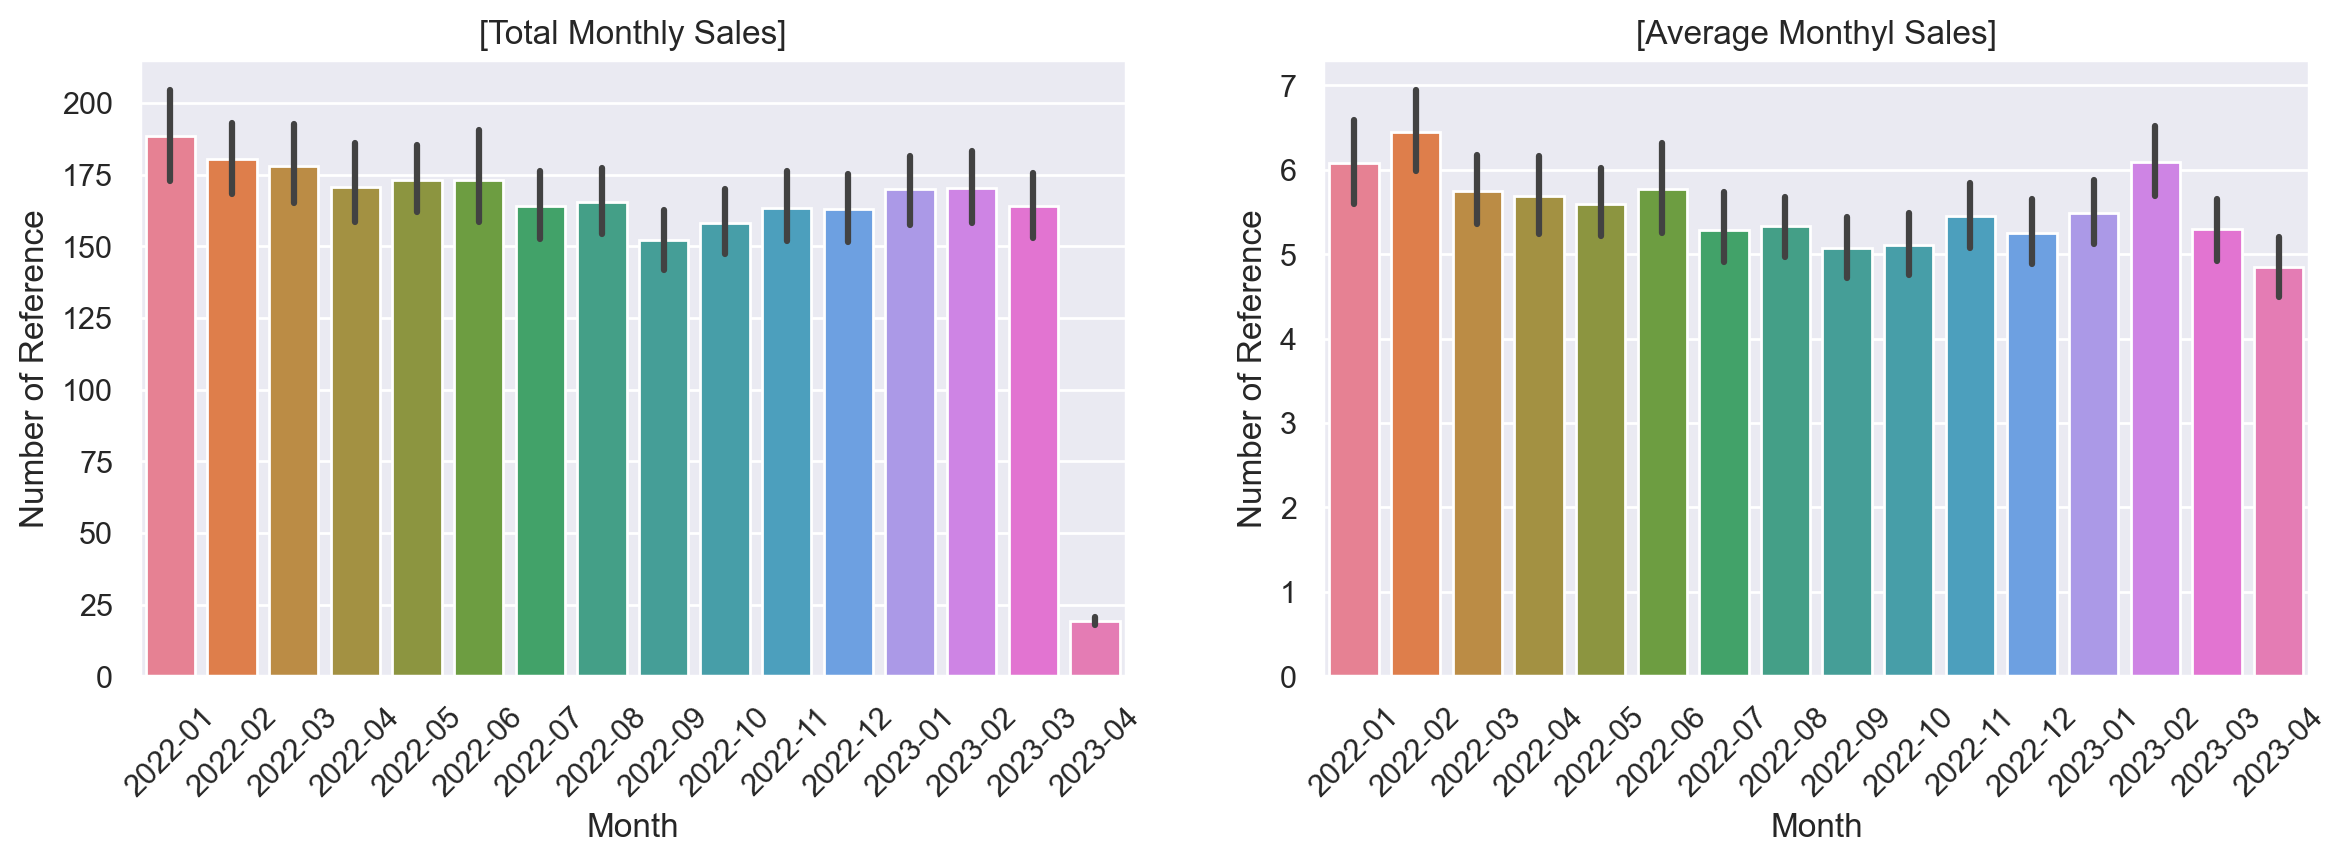

In [84]:
# 월별 분포
f, ax = plt.subplots(1, 2, figsize = (14, 4))

sns.barplot(data = df_brand_monthly_sum, ax = ax[0])
ax[0].set_title('[Total Monthly Sales]')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Number of Reference')
ax[0].tick_params(axis = 'x', rotation = 45)

sns.barplot(data = df_brand_monthly_mean, ax = ax[1])
ax[1].set_title('[Average Monthyl Sales]')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Number of Reference')
ax[1].tick_params(axis = 'x', rotation = 45)

- 2023년 4월 데이터 불균형
- 1월 ~9월까지는 언급량이 감소하다가, 10월부터 다시 증가

#### 계절별 데이터 확인

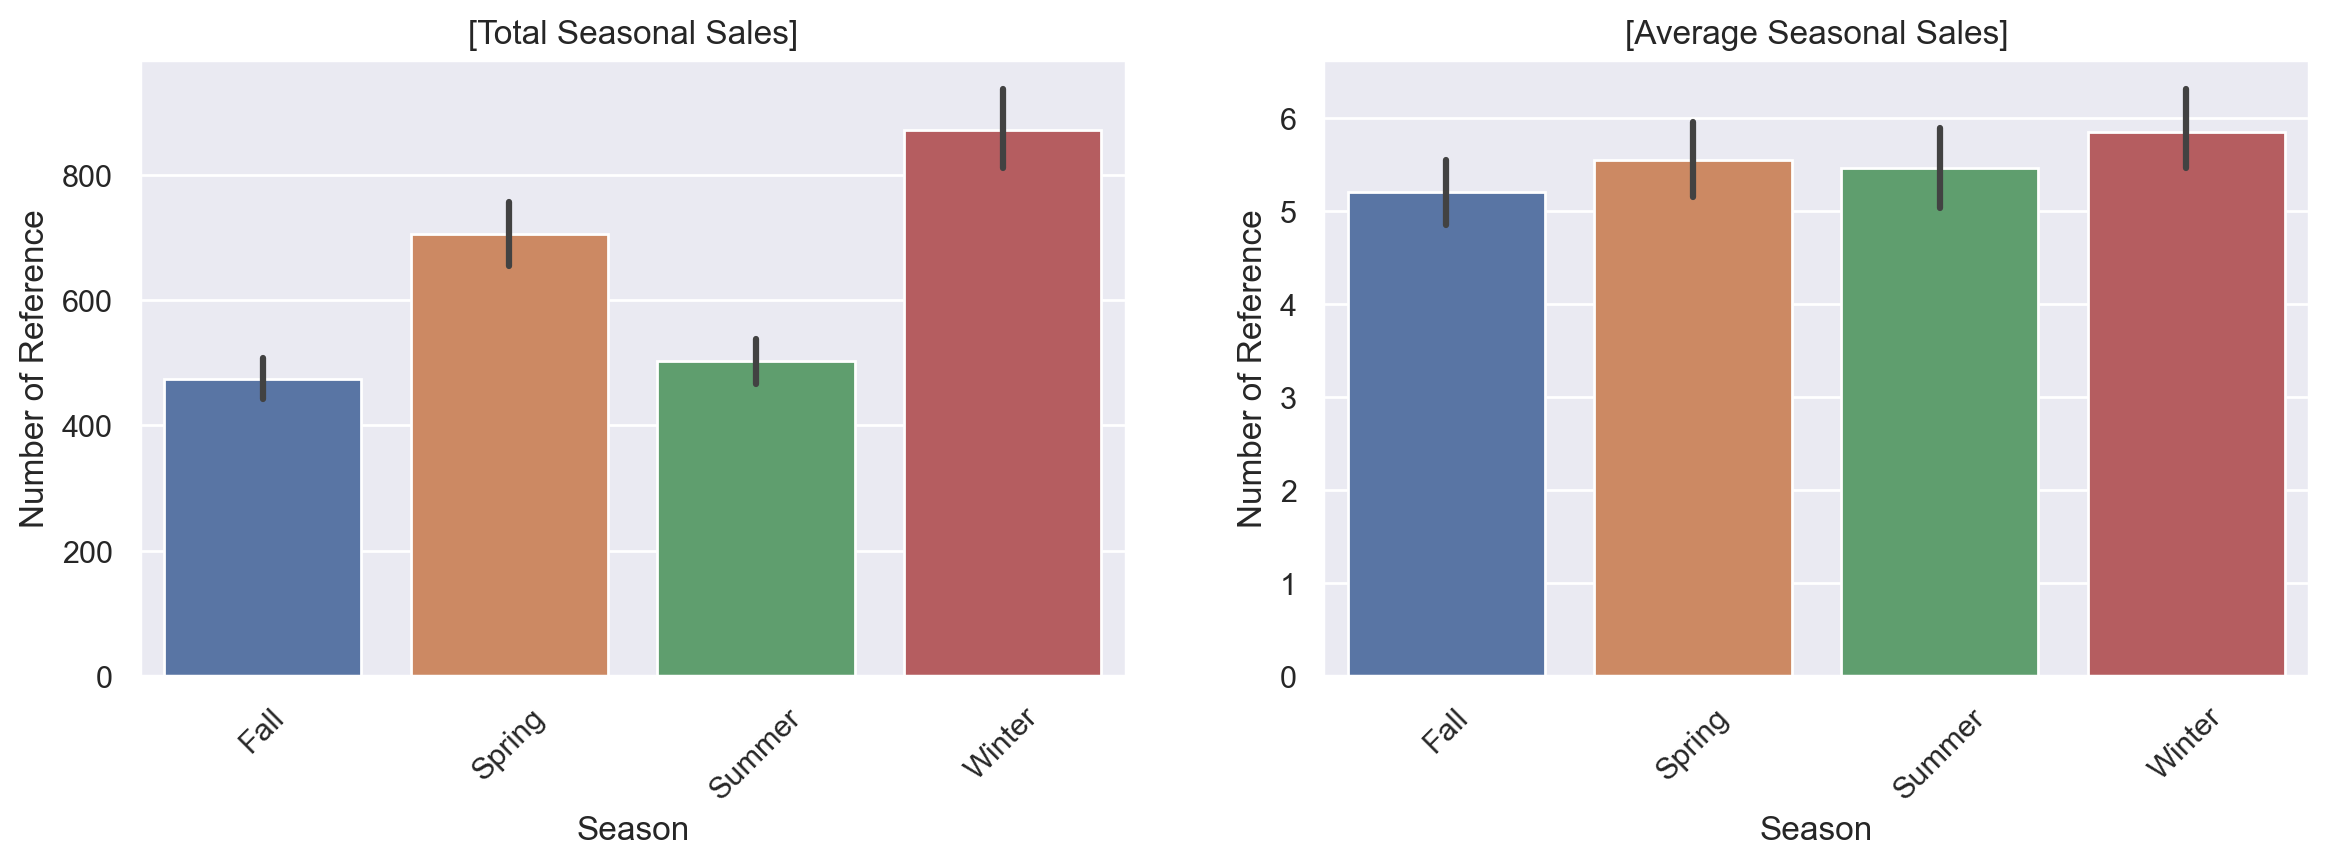

In [85]:
# 계절별 분포
f, ax = plt.subplots(1, 2, figsize = (14, 4))

sns.barplot(data = df_brand_seasonal_sum, ax = ax[0])
ax[0].set_title('[Total Seasonal Sales]')
ax[0].set_xlabel('Season')
ax[0].set_ylabel('Number of Reference')
ax[0].tick_params(axis = 'x', rotation = 45)

sns.barplot(data = df_brand_seasonal_mean, ax = ax[1])
ax[1].set_title('[Average Seasonal Sales]')
ax[1].set_xlabel('Season')
ax[1].set_ylabel('Number of Reference')
ax[1].tick_params(axis = 'x', rotation = 45)

- 겨울, 봄, 여름, 가을 순으로 언급량이 감소함.

#### 요일별 데이터 확인

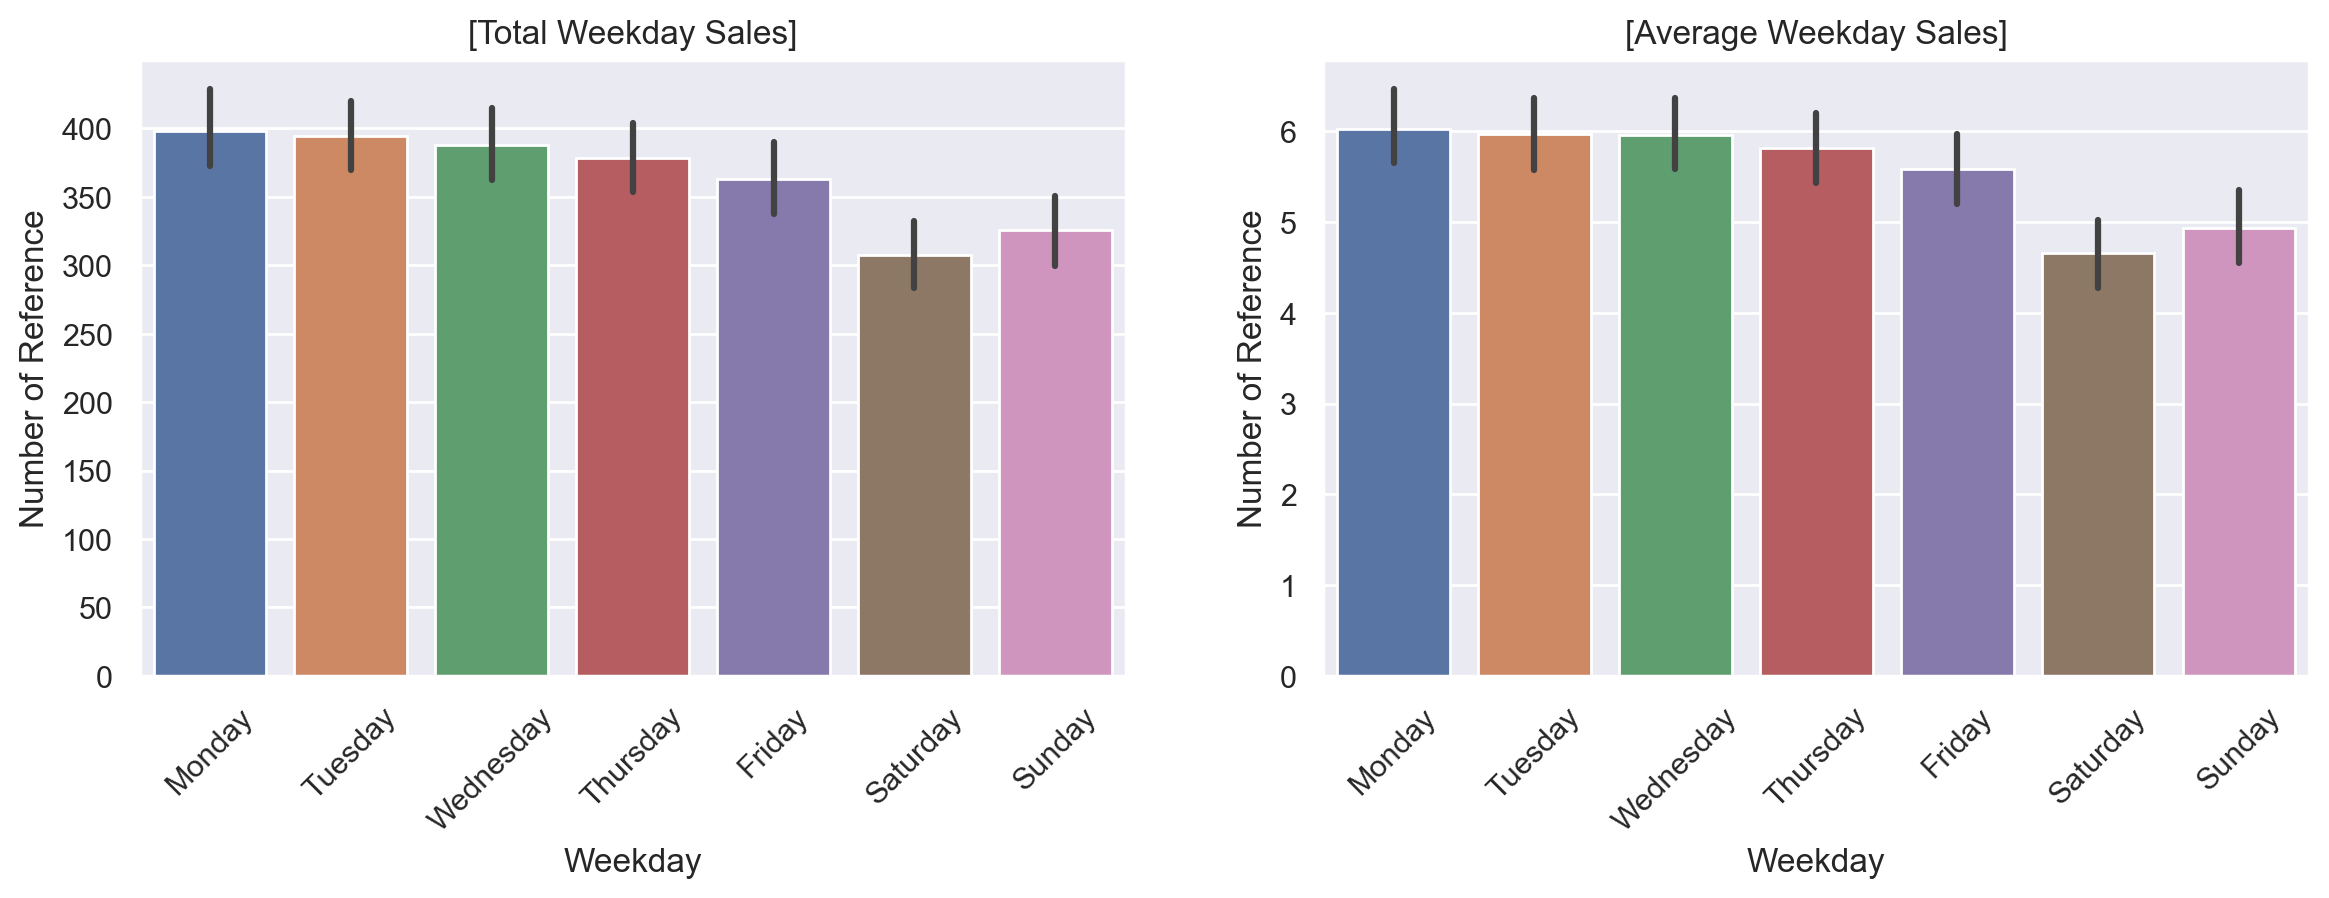

In [86]:
# 요일별 분포
f, ax = plt.subplots(1, 2, figsize = (14, 4))

sns.barplot(data = df_brand_weekday_sum, ax = ax[0])
ax[0].set_title('[Total Weekday Sales]')
ax[0].set_xlabel('Weekday')
ax[0].set_ylabel('Number of Reference')
ax[0].tick_params(axis = 'x', rotation = 45)

sns.barplot(data = df_brand_weekday_mean, ax = ax[1])
ax[1].set_title('[Average Weekday Sales]')
ax[1].set_xlabel('Weekday')
ax[1].set_ylabel('Number of Reference')
ax[1].tick_params(axis = 'x', rotation = 45)

- 월 ~토까지 언급량이 순차적으로 감소하며, 일요일에 다시 증가  

#### 연도별 데이터 vs. 월별 데이터

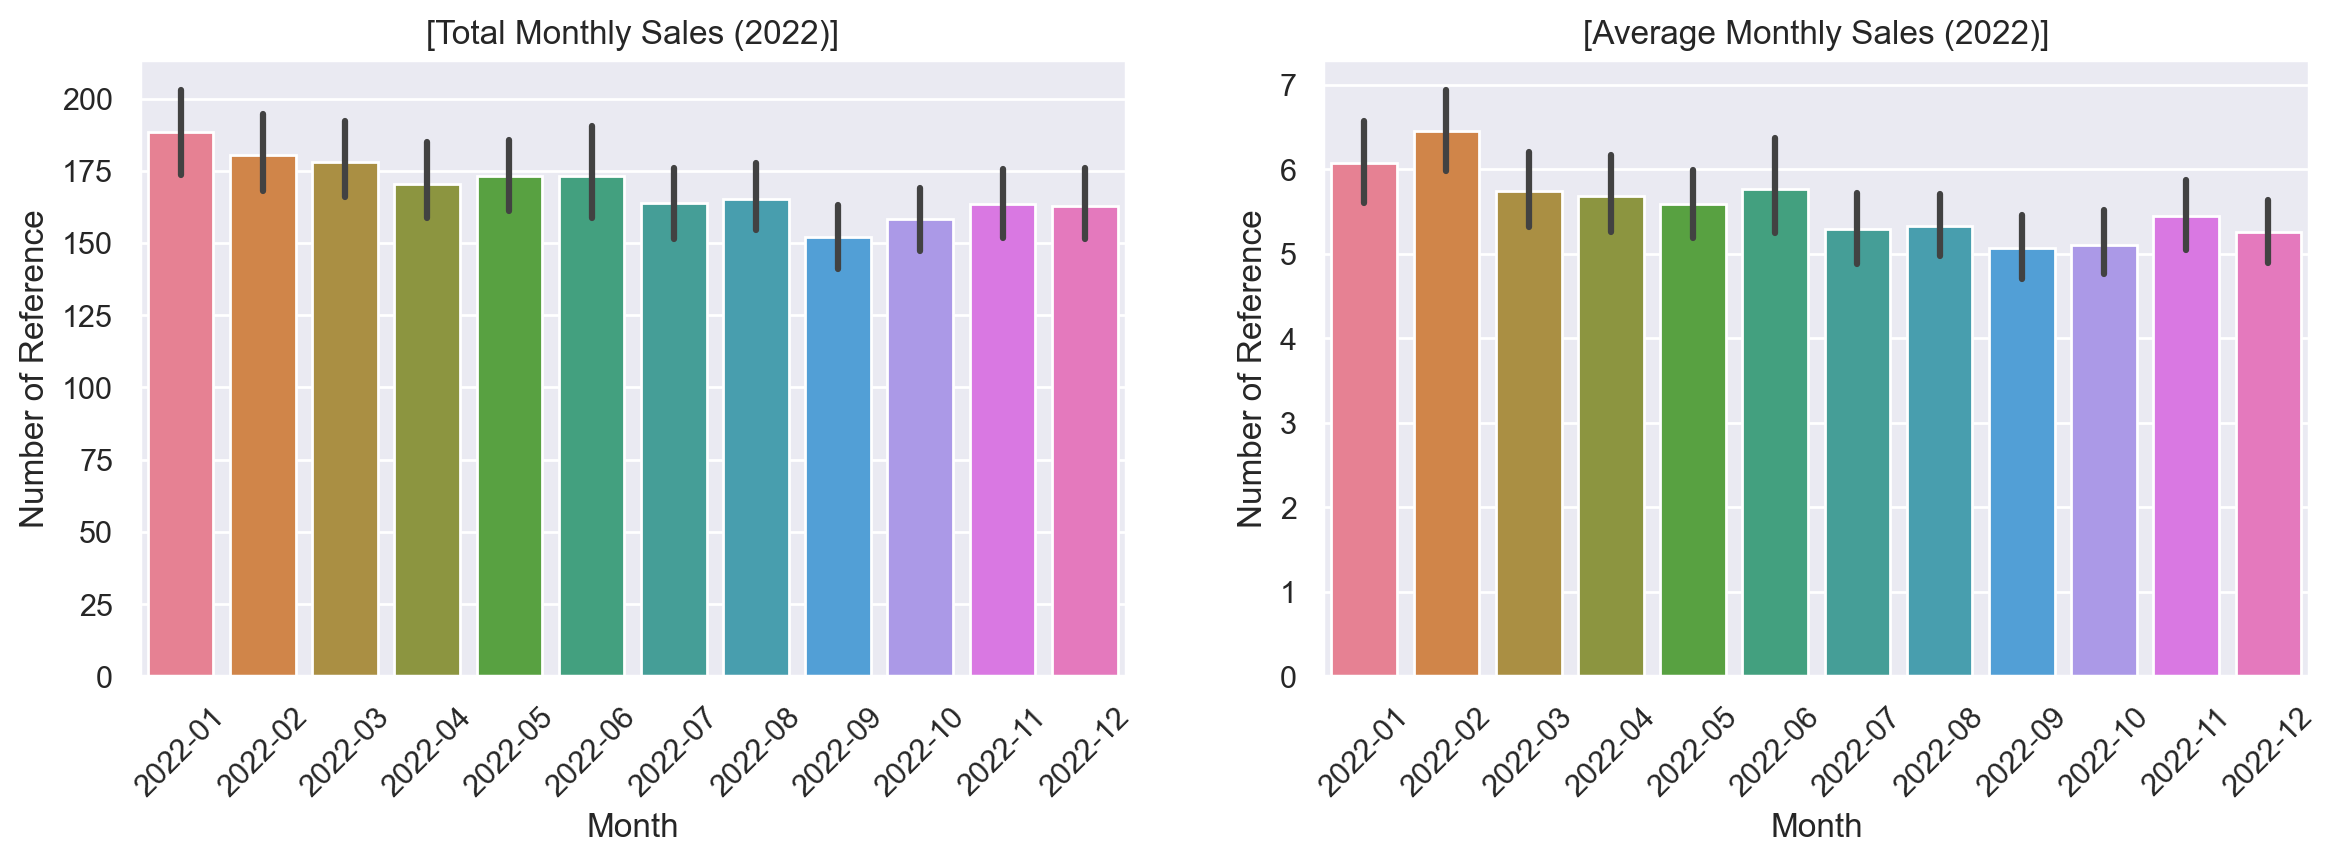

In [87]:
# 연도별(2022) vs. 월별
df_brand_2022 = df_brand.loc[:, '2022-01-01':'2022-12-31']
monthly_data_2022_sum = df_brand_2022.resample('M', axis = 1).sum().rename(columns=lambda x: x.strftime('%Y-%m'))
monthly_data_2022_mean = df_brand_2022.resample('M', axis = 1).mean().rename(columns=lambda x: x.strftime('%Y-%m'))

f, ax = plt.subplots(1, 2, figsize = (14, 4))

sns.barplot(data = monthly_data_2022_sum, ax = ax[0])
ax[0].set_title('[Total Monthly Sales (2022)]')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Number of Reference')
ax[0].tick_params(axis = 'x', rotation = 45)

sns.barplot(data = monthly_data_2022_mean, ax = ax[1])
ax[1].set_title('[Average Monthly Sales (2022)]')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Number of Reference')
ax[1].tick_params(axis = 'x', rotation = 45)

- 2022년의 데이터를 살펴보면, 9월까지는 전반적으로 언급량이 감소하다가 10월부터 다시 증가함.  

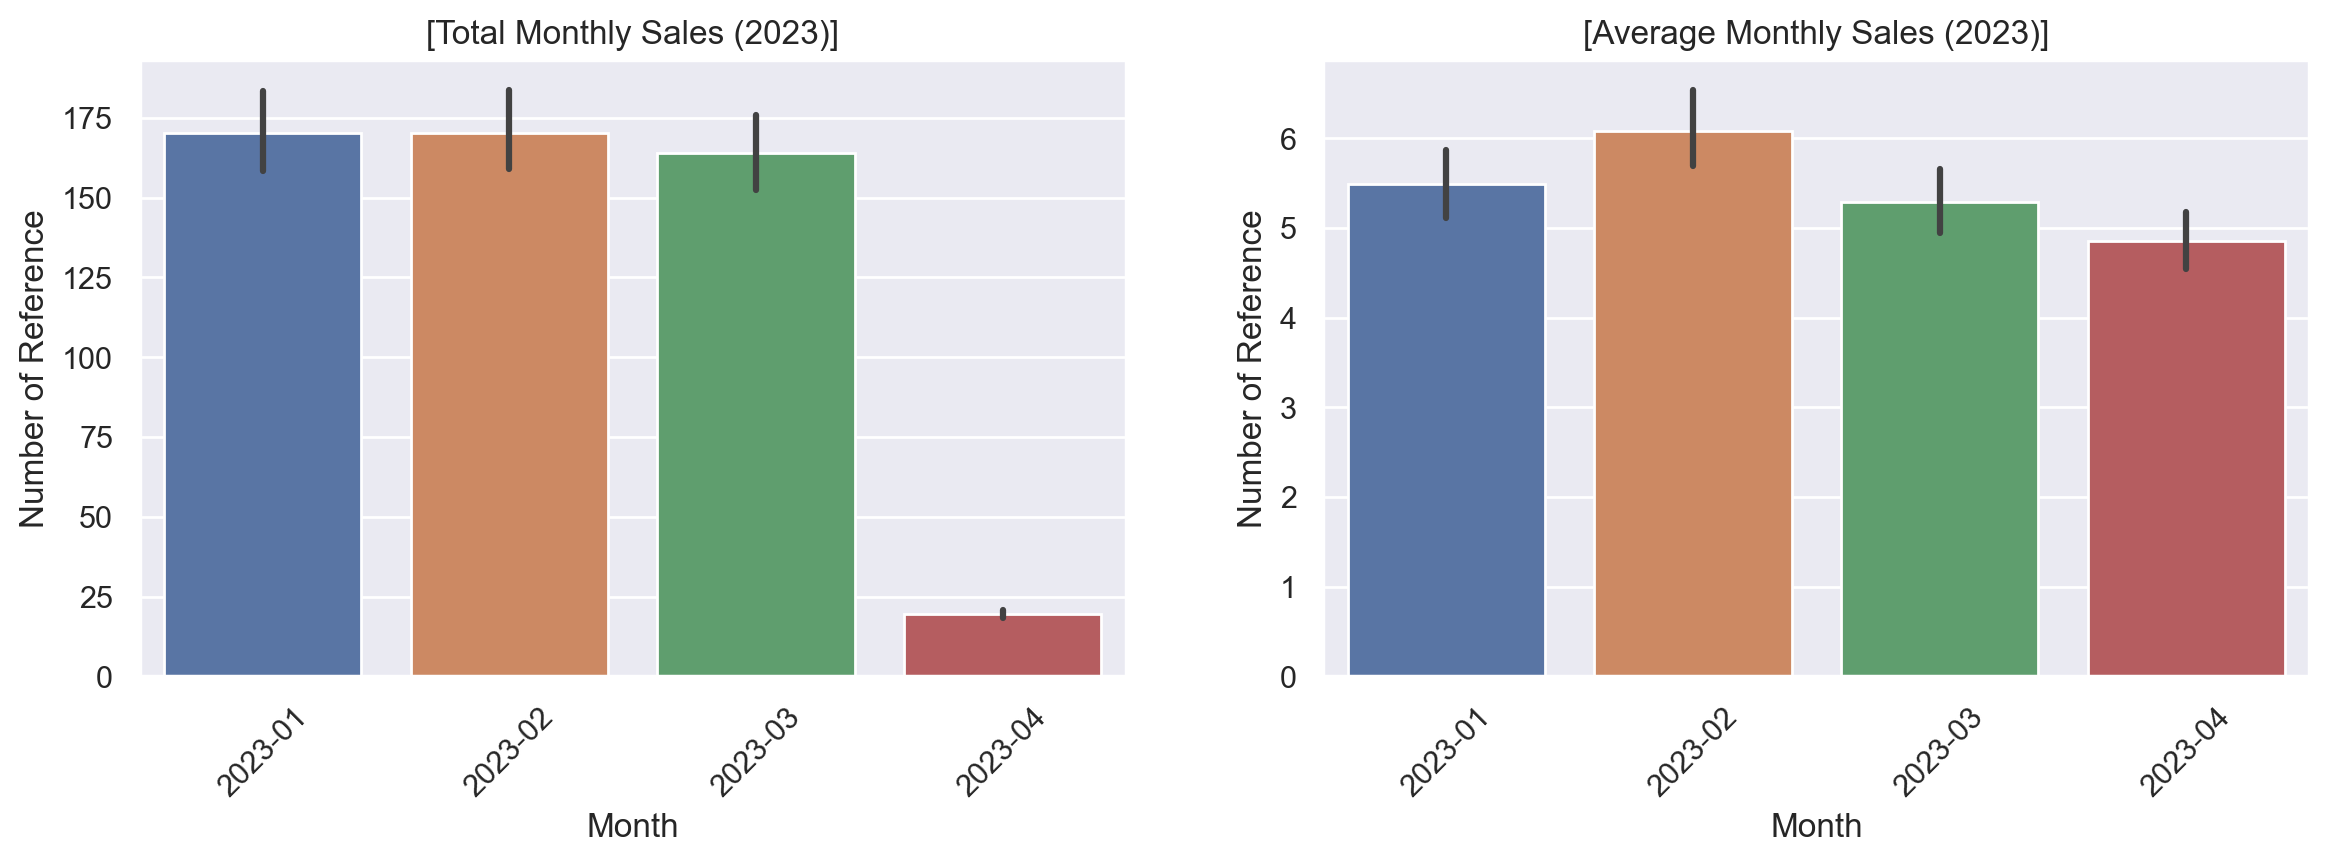

In [88]:
# 연도별(2023) vs. 월별

df_brand_2023 = df_brand.loc[:, '2023-01-01':]
monthly_data_2023_sum = df_brand_2023.resample('M', axis = 1).sum().rename(columns=lambda x: x.strftime('%Y-%m'))
monthly_data_2023_mean = df_brand_2023.resample('M', axis = 1).mean().rename(columns=lambda x: x.strftime('%Y-%m'))

f, ax = plt.subplots(1, 2, figsize = (14, 4))

sns.barplot(data = monthly_data_2023_sum, ax = ax[0])
ax[0].set_title('[Total Monthly Sales (2023)]')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Number of Reference')
ax[0].tick_params(axis = 'x', rotation = 45)

sns.barplot(data = monthly_data_2023_mean, ax = ax[1])
ax[1].set_title('[Average Monthly Sales (2023)]')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Number of Reference')
ax[1].tick_params(axis = 'x', rotation = 45)

- 2023년의 데이터를 살펴보면, 상대적으로 1~3월의 언급량이 많다.  

#### 연도별 데이터 vs. 계절별 데이터

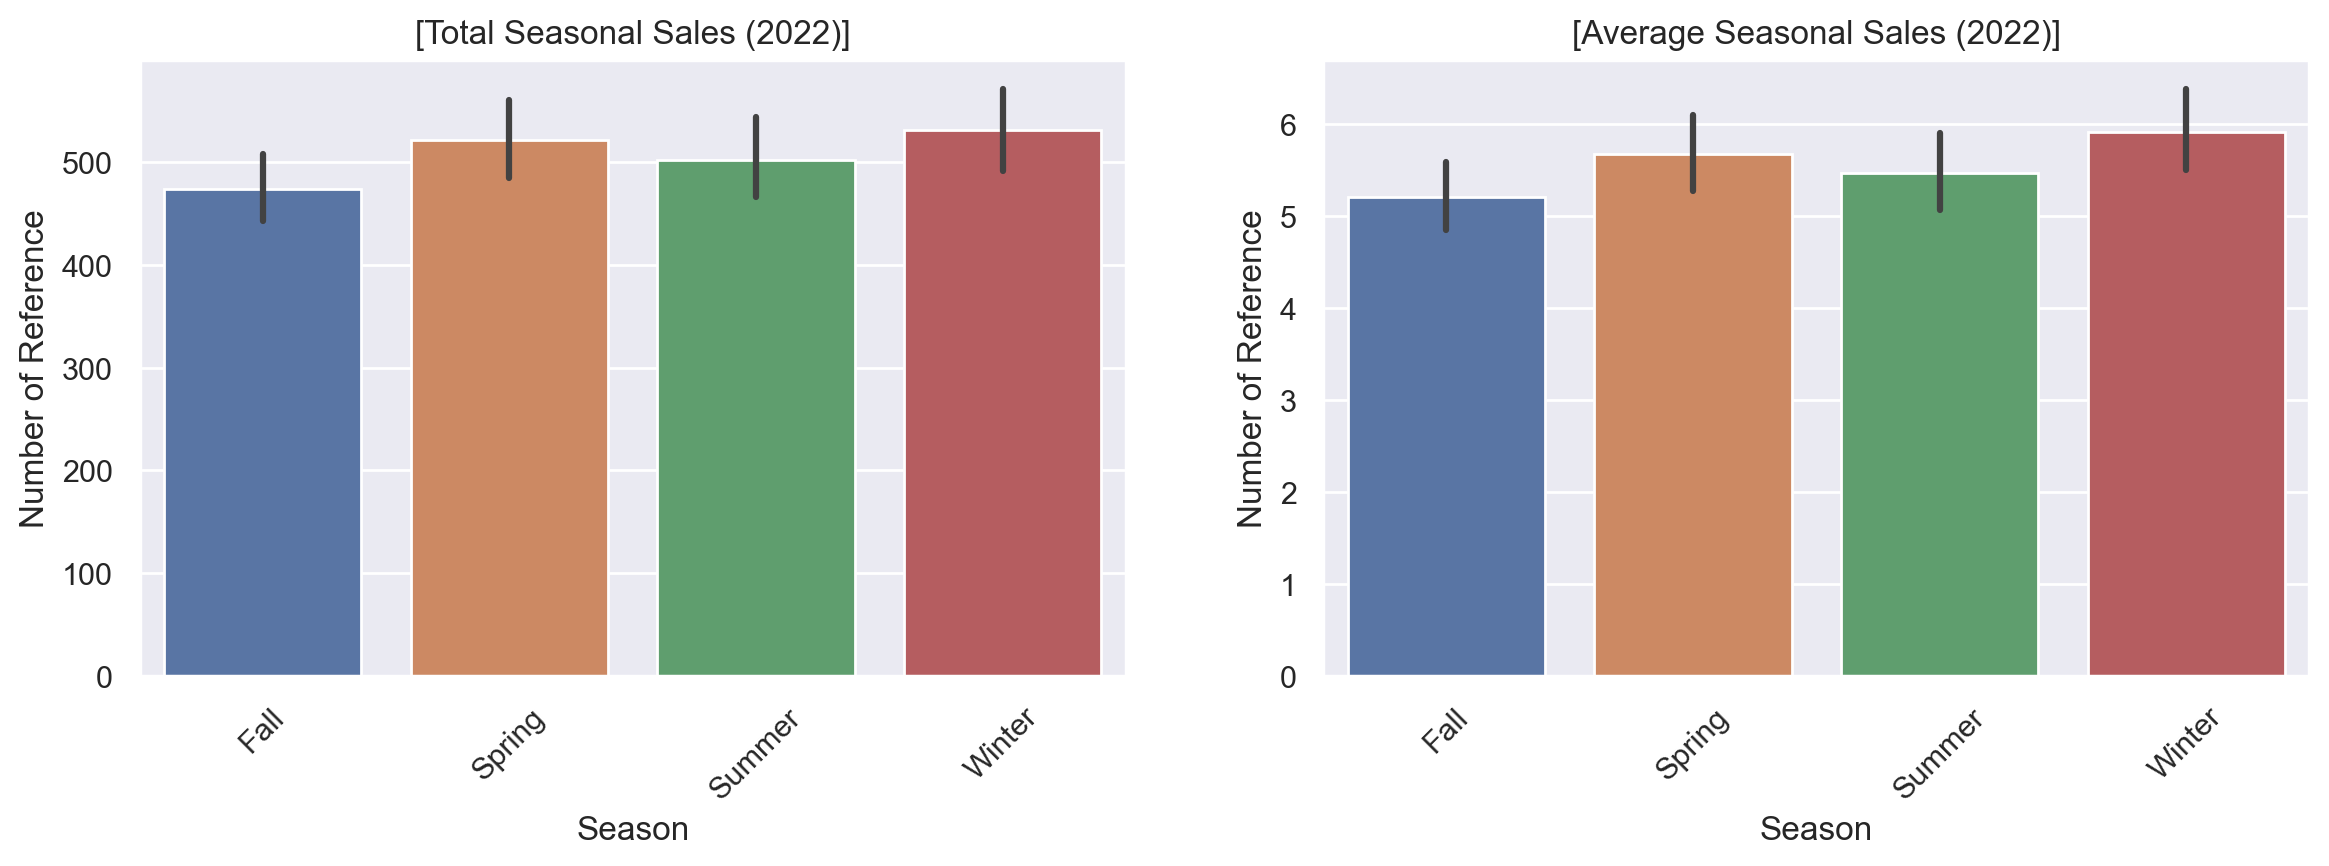

In [89]:
# 연도별(2022) vs. 계절별
df_brand_2022_seasons = df_brand_2022.copy()
df_brand_2022_seasons.columns = pd.to_datetime(df_brand_2022_seasons.columns)

df_brand_2022_seasons = df_brand_2022_seasons.rename(columns=lambda x: season(x.month))
seasonal_data_2022_sum = df_brand_2022_seasons.groupby(df_brand_2022_seasons.columns, axis=1).sum()
seasonal_data_2022_mean = df_brand_2022_seasons.groupby(df_brand_2022_seasons.columns, axis=1).mean()

f, ax = plt.subplots(1, 2, figsize = (14, 4))

sns.barplot(data = seasonal_data_2022_sum, ax = ax[0])
ax[0].set_title('[Total Seasonal Sales (2022)]')
ax[0].set_xlabel('Season')
ax[0].set_ylabel('Number of Reference')
ax[0].tick_params(axis = 'x', rotation = 45)

sns.barplot(data = seasonal_data_2022_mean, ax = ax[1])
ax[1].set_title('[Average Seasonal Sales (2022)]')
ax[1].set_xlabel('Season')
ax[1].set_ylabel('Number of Reference')
ax[1].tick_params(axis = 'x', rotation = 45)

- 겨울, 봄, 여름, 가을 순으로 언급량이 감소함.

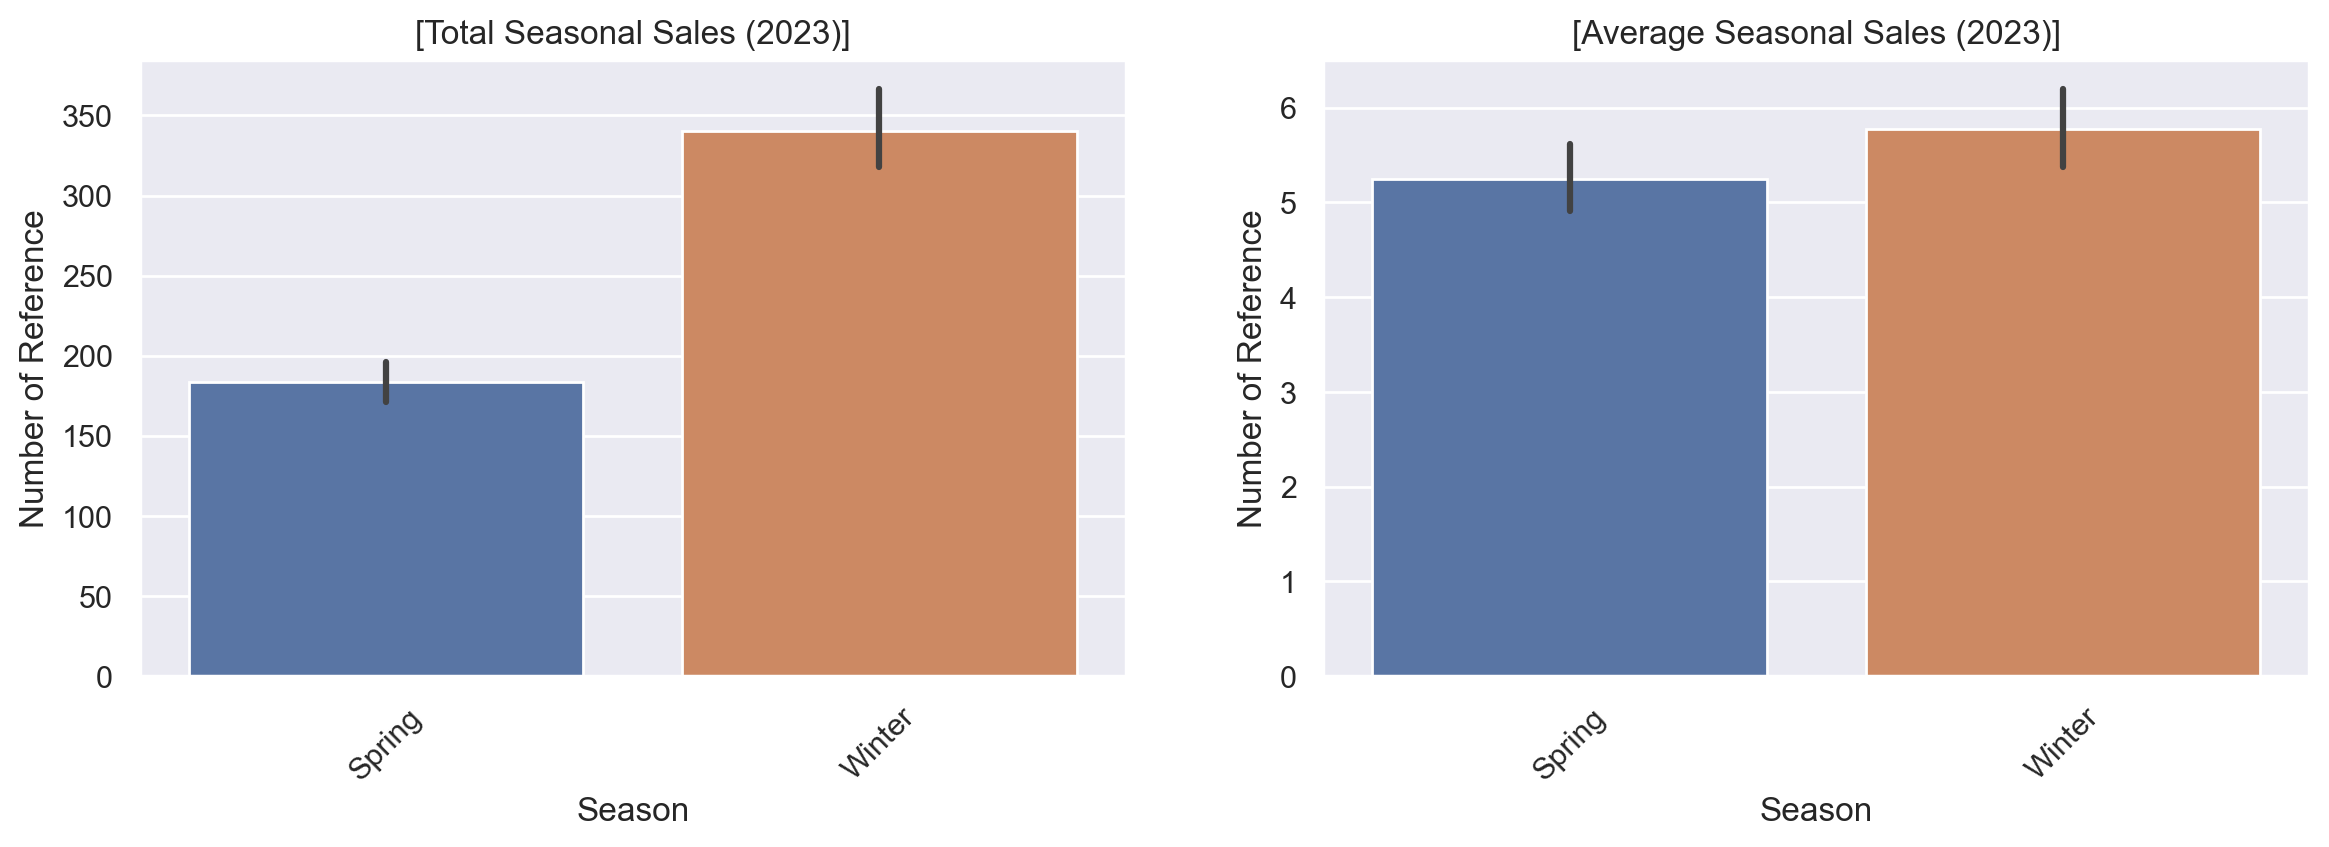

In [90]:
# 연도별(2023) vs. 계절별

df_brand_2023_seasons = df_brand_2023.copy()
df_brand_2023_seasons.columns = pd.to_datetime(df_brand_2023_seasons.columns)

df_brand_2023_seasons = df_brand_2023_seasons.rename(columns=lambda x: season(x.month))
seasonal_data_2023_sum = df_brand_2023_seasons.groupby(df_brand_2023_seasons.columns, axis=1).sum()
seasonal_data_2023_mean = df_brand_2023_seasons.groupby(df_brand_2023_seasons.columns, axis=1).mean()

f, ax = plt.subplots(1, 2, figsize = (14, 4))

sns.barplot(data = seasonal_data_2023_sum, ax = ax[0])
ax[0].set_title('[Total Seasonal Sales (2023)]')
ax[0].set_xlabel('Season')
ax[0].set_ylabel('Number of Reference')
ax[0].tick_params(axis = 'x', rotation = 45)

sns.barplot(data = seasonal_data_2023_mean, ax = ax[1])
ax[1].set_title('[Average Seasonal Sales (2023)]')
ax[1].set_xlabel('Season')
ax[1].set_ylabel('Number of Reference')
ax[1].tick_params(axis = 'x', rotation = 45)

- 2023년에는 1, 2월의 언급량이 압도적으로 많으므로 겨울의 언급량이 많음.

#### 연도별 데이터 vs. 요일별 데이터

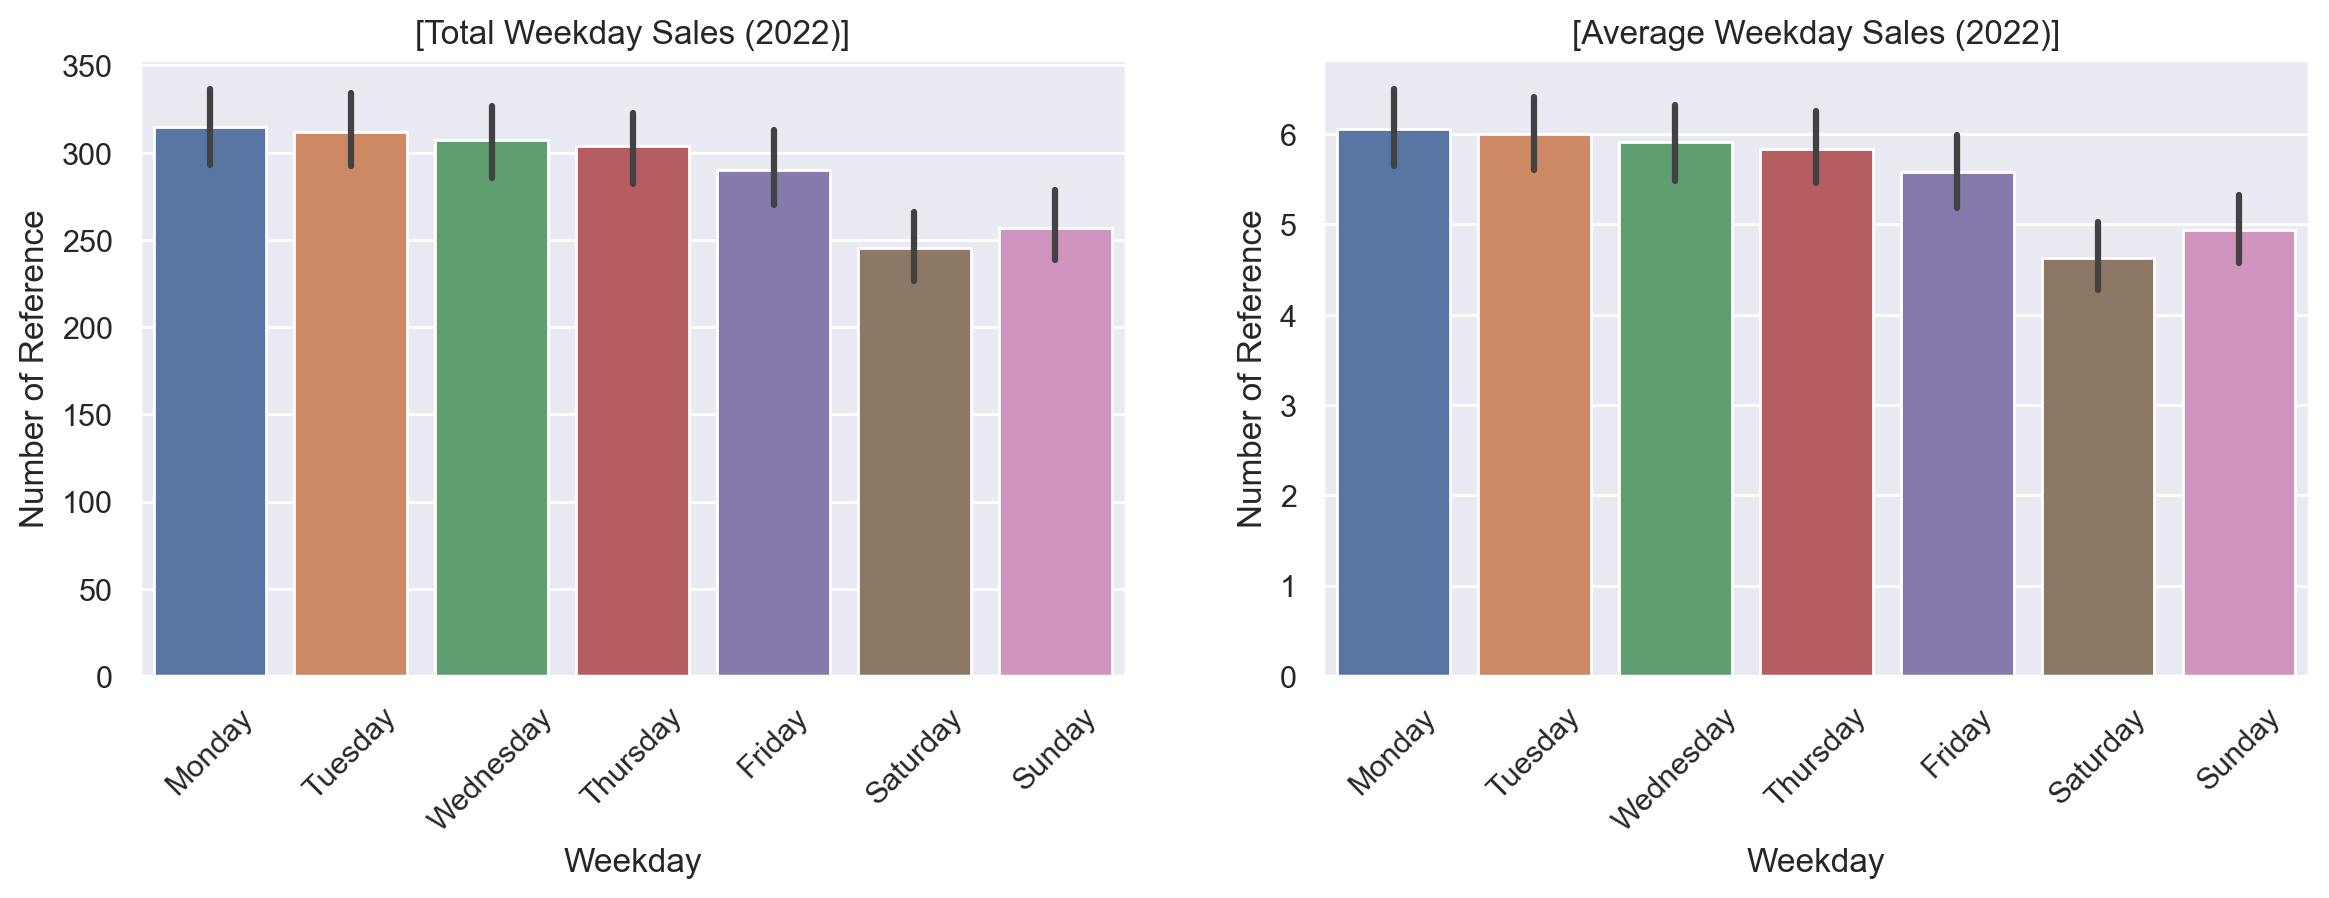

In [91]:
# 연도별(2022) vs. 요일별
df_brand_2022_weekdays = df_brand_2022.copy()
df_brand_2022_weekdays.columns = pd.to_datetime(df_brand_2022_weekdays.columns)

df_brand_2022_weekdays = df_brand_2022_weekdays.rename(columns=lambda x: x.weekday())
weekday_data_2022_sum = df_brand_2022_weekdays.groupby(df_brand_2022_weekdays.columns, axis=1).sum()
weekday_data_2022_mean = df_brand_2022_weekdays.groupby(df_brand_2022_weekdays.columns, axis=1).mean()

weekday_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
weekday_data_2022_sum.rename(columns=weekday_names, inplace=True)
weekday_data_2022_mean.rename(columns=weekday_names, inplace=True)

f, ax = plt.subplots(1, 2, figsize = (14, 4))

sns.barplot(data = weekday_data_2022_sum, ax = ax[0])
ax[0].set_title('[Total Weekday Sales (2022)]')
ax[0].set_xlabel('Weekday')
ax[0].set_ylabel('Number of Reference')
ax[0].tick_params(axis = 'x', rotation = 45)

sns.barplot(data = weekday_data_2022_mean, ax = ax[1])
ax[1].set_title('[Average Weekday Sales (2022)]')
ax[1].set_xlabel('Weekday')
ax[1].set_ylabel('Number of Reference')
ax[1].tick_params(axis = 'x', rotation = 45)

- 월 ~토까지 언급량이 순차적으로 감소하며, 일요일에 다시 증가

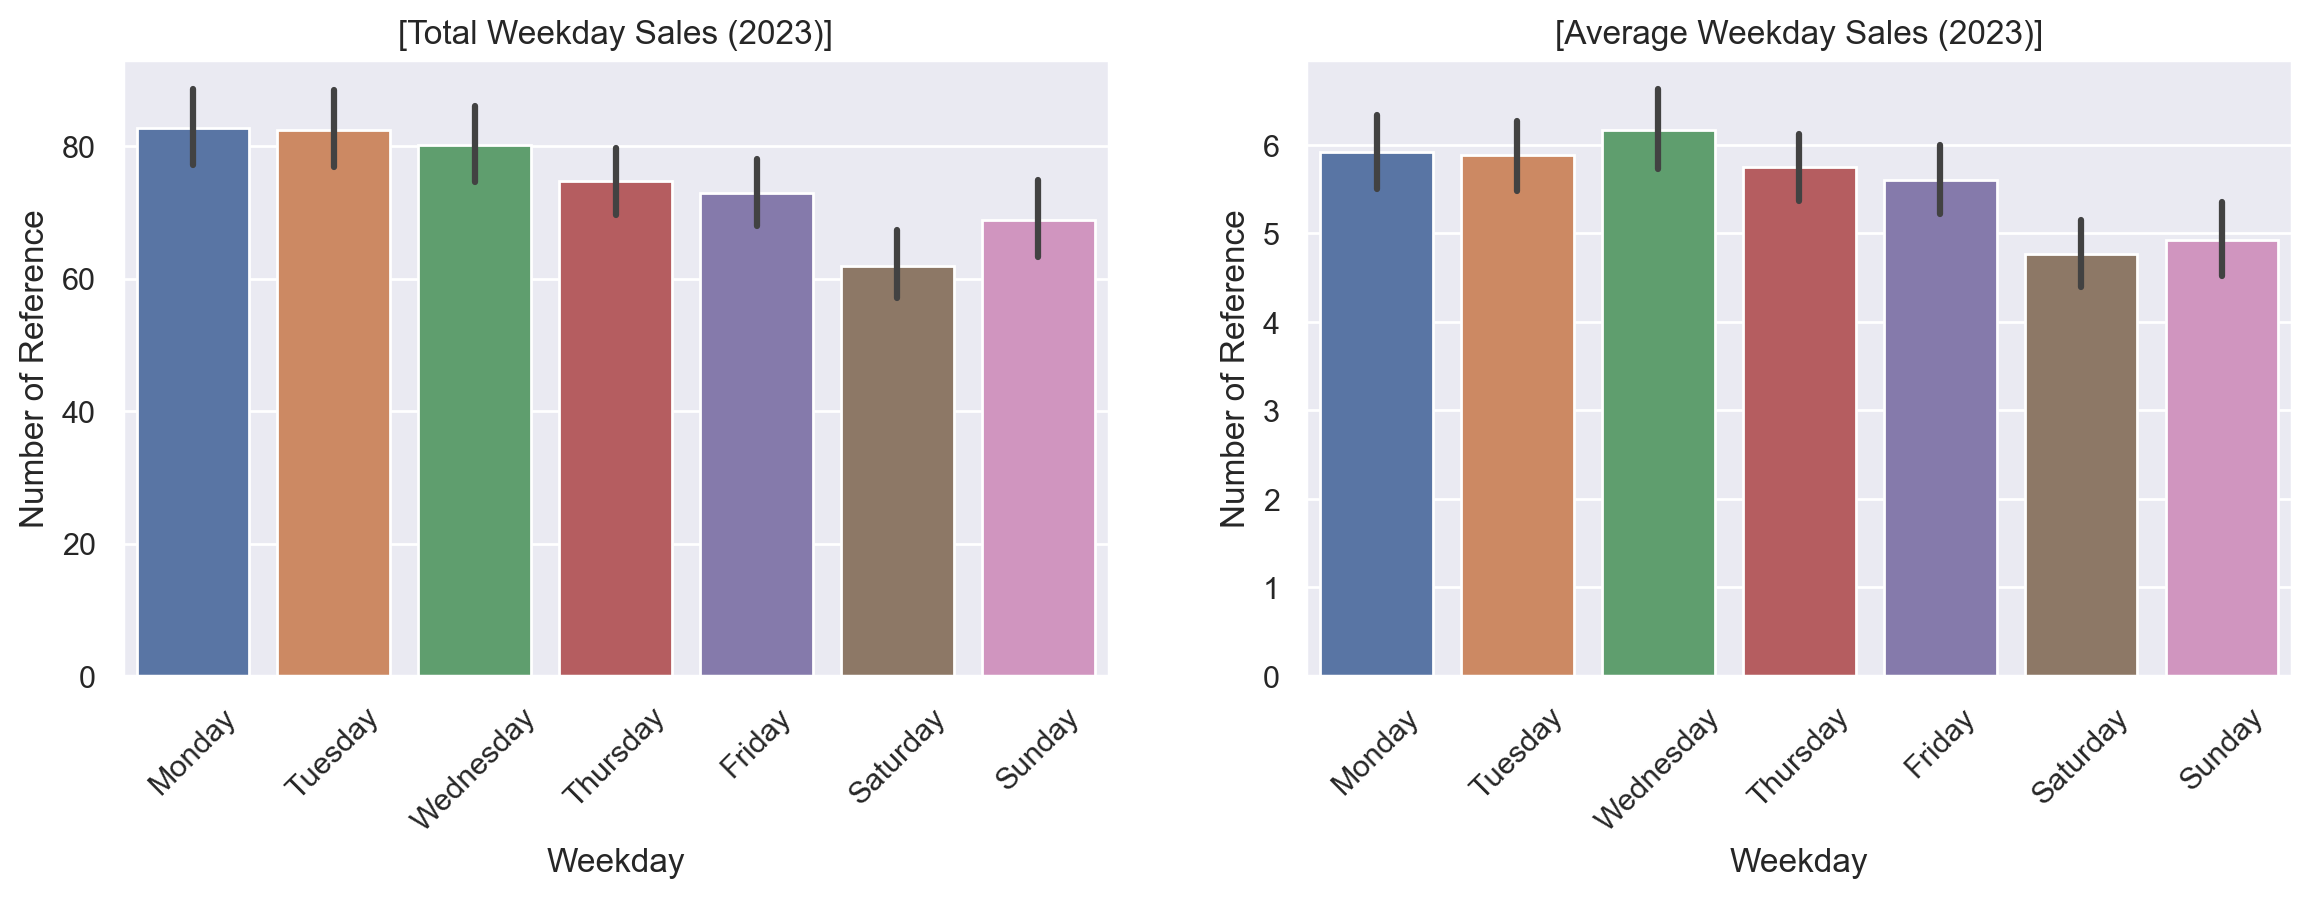

In [92]:
# 연도별(2023) vs. 요일별
df_brand_2023_weekdays = df_brand_2023.copy()
df_brand_2023_weekdays.columns = pd.to_datetime(df_brand_2023_weekdays.columns)

df_brand_2023_weekdays = df_brand_2023_weekdays.rename(columns=lambda x: x.weekday())
weekday_data_2023_sum = df_brand_2023_weekdays.groupby(df_brand_2023_weekdays.columns, axis=1).sum()
weekday_data_2023_mean = df_brand_2023_weekdays.groupby(df_brand_2023_weekdays.columns, axis=1).mean()

weekday_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
weekday_data_2023_sum.rename(columns=weekday_names, inplace=True)
weekday_data_2023_mean.rename(columns=weekday_names, inplace=True)

f, ax = plt.subplots(1, 2, figsize = (14, 4))

sns.barplot(data = weekday_data_2023_sum, ax = ax[0])
ax[0].set_title('[Total Weekday Sales (2023)]')
ax[0].set_xlabel('Weekday')
ax[0].set_ylabel('Number of Reference')
ax[0].tick_params(axis = 'x', rotation = 45)

sns.barplot(data = weekday_data_2023_mean, ax = ax[1])
ax[1].set_title('[Average Weekday Sales (2023)]')
ax[1].set_xlabel('Weekday')
ax[1].set_ylabel('Number of Reference')
ax[1].tick_params(axis = 'x', rotation = 45)

- 월 ~토까지 언급량이 순차적으로 감소하며, 일요일에 다시 증가 (2022년과 동일함)

#### __brand(numerical data) 분석 요약__
__[2022]__
- 9월까지는 전반적으로 언급량이 감소하다가 10월부터 다시 증가함.
- 겨울(10월부터 증가하는 언급량 반영), 봄, 여름, 가을(9월까지 감소하는 언급량 반영) 순으로 언급량이 감소함.
- 월 ~토까지 언급량이 순차적으로 감소하며, 일요일에 다시 증가

__[2023]__
- 겨울(1 ~3월)의 언급량이 높으며 3월에는 언급량이 급감하는데 이는 코로나 팬데믹 종식 선언과 관련된 것일 수 있다.
- 월 ~토까지 언급량이 순차적으로 감소하며, 일요일에 다시 증가

## Categorical data
(인선님)

# Machine learning

## Data preparation

앞서 sum 데이터와 mean 데이터를 분석하였는데, sum 데이터는 데이터의 개수가 불균형할 경우 데이터의 일관성에 영향을 미칠 수 있기 때문에 학습 데이터로는 mean 데이터를 사용할 것이다.

In [103]:
df_pre = pd.concat([train[['ID', '대분류', '중분류']],  # ID, 대분류, 중분류. (제품, 소분류는 항목수가 많으므로 제외)
                    df_train_yearly_mean, df_train_monthly_mean, df_train_seasonal_mean, df_train_weekday_mean,
                    df_sales_yearly_mean, df_sales_monthly_mean, df_sales_seasonal_mean, df_sales_weekday_mean,
                    df_brand_yearly_mean, df_brand_monthly_mean, df_brand_seasonal_mean, df_brand_weekday_mean],
                    axis = 1)

df_pre.head()

,ID,대분류,중분류,2022,2023,2022-01,2022-02,2022-03,2022-04,2022-05,...,Spring,Summer,Winter,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,0.0,B002-C001-0002,B002-C002-0007,0.547945,1.521277,0.000000,0.321429,0.096774,0.766667,1.032258,...,0.684945,0.606067,0.844325,0.791856,0.852955,0.843092,0.787749,0.693798,0.472738,0.529221
1,1.0,B002-C001-0003,B002-C002-0008,1.430137,0.702128,0.096774,0.000000,2.225806,4.633333,2.354839,...,9.882033,8.441330,16.594427,12.507578,12.131976,11.721893,11.484898,9.814995,10.665176,12.915266
2,2.0,B002-C001-0003,B002-C002-0008,2.789041,0.202128,0.000000,0.428571,3.096774,7.033333,3.870968,...,9.882033,8.441330,16.594427,12.507578,12.131976,11.721893,11.484898,9.814995,10.665176,12.915266
3,3.0,B002-C001-0003,B002-C002-0008,4.350685,0.000000,0.129032,8.750000,4.516129,13.800000,5.032258,...,9.882033,8.441330,16.594427,12.507578,12.131976,11.721893,11.484898,9.814995,10.665176,12.915266
4,4.0,B002-C001-0001,B002-C002-0001,2.964384,1.521277,0.193548,0.892857,5.451613,7.133333,0.064516,...,0.625668,0.584782,0.680093,0.637352,0.597352,1.278030,0.658762,0.981898,0.437794,0.550100


## Encoding

In [109]:
df_pre = pd.get_dummies(df_pre)
df_pre

,ID,2022,2023,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,...,중분류_B002-C002-0002,중분류_B002-C002-0003,중분류_B002-C002-0004,중분류_B002-C002-0005,중분류_B002-C002-0006,중분류_B002-C002-0007,중분류_B002-C002-0008,중분류_B002-C002-0009,중분류_B002-C002-0010,중분류_B002-C002-0011
0,0.0,0.547945,1.521277,0.000000,0.321429,0.096774,0.766667,1.032258,0.000000,0.000000,...,False,False,False,False,False,True,False,False,False,False
1,1.0,1.430137,0.702128,0.096774,0.000000,2.225806,4.633333,2.354839,3.166667,2.225806,...,False,False,False,False,False,False,True,False,False,False
2,2.0,2.789041,0.202128,0.000000,0.428571,3.096774,7.033333,3.870968,5.333333,5.032258,...,False,False,False,False,False,False,True,False,False,False
3,3.0,4.350685,0.000000,0.129032,8.750000,4.516129,13.800000,5.032258,7.066667,5.645161,...,False,False,False,False,False,False,True,False,False,False
4,4.0,2.964384,1.521277,0.193548,0.892857,5.451613,7.133333,0.064516,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15985,NaN,13.142466,11.414894,0.000000,0.000000,25.354839,9.166667,14.741935,4.100000,5.064516,...,False,False,False,False,False,False,False,False,False,False
15986,NaN,3.142466,10.063830,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000,10.483871,...,False,False,False,False,False,False,False,False,False,False
15987,NaN,4.871233,0.053191,0.709677,1.821429,13.225806,13.133333,8.290323,10.033333,5.193548,...,False,False,False,False,False,False,False,False,False,False
15988,NaN,2.739726,0.606383,0.000000,0.142857,0.000000,0.166667,3.483871,7.333333,6.548387,...,False,False,False,False,False,False,False,False,False,False
